# Prepare Data

## SRF Audio Description Data

In [2]:
from datareader import prepare_srfad_data
import sys
sys.path.append('..')

AUDIO_PATH = '../data_raw/SRF_AD/audio_full_ad'
TEXT_PATH = '../data_raw/SRF_AD/subtitles'
PREPARED_PATH = '../data_prepared/srf_ad'

In [2]:
manual_match = {
    '20200214_AuD_S11_F06.wav': '2020_AuD_S11_F06.srt',
    '20200214_AuD_S11_F05.wav': '2020_AuD_S11_F05.srt',
    '20200214_AuD_S11_F03.wav': '2020_AuD_S11_F03.srt',
    '20200214_AuD_S11_F04.wav': '2020_AuD_S11_F04.srt',
    '20200214_AuD_S11_F02.wav': '2020_AuD_S11_F02.srt',
    '20200214_AuD_S11_F07.wav': '2020_AuD_S11_F07.srt',
    '1G100_Augustspecial.wav': '1G100_August_Special.CHDE.srt',
    '1G100_401.wav': '1g100_401.CHDE.srt',
    '20200214_AuD_S11_F01.wav':'2020_AuD_S11_F01.srt',
    '1G100_361.wav': '1G100_362.CHDE.srt',
    '1G100_362.wav': '1G100_361.CHDE.srt',
    '1G100_403.wav': '1G100_404.CHDE.srt',
    '1G100_404.wav': '1G100_403.CHDE.srt',
}

prepare_srfad_data(AUDIO_PATH, TEXT_PATH, PREPARED_PATH, manual_match)



Processing files:   0%|          | 0/289 [00:00<?, ?it/s]

Processing 20191212_MM_Fahrlehrer_S04_F05_DOKS20190711_TM_0005_TSP_01...


Processing files:   0%|          | 1/289 [00:12<1:02:21, 12.99s/it]

$ D Mona zieht d Augebrauen ufe. --> D Mona zieht d Augebrauen ufe.
$ Er zeigt uf rächts. --> Er zeigt uf rächts.
$ De Beat im Kursruum. Er lauft ine Pauseruum zu sim Kolleg. --> De Beat im Kursruum. Er lauft ine Pauseruum zu sim Kolleg.
$$ E Blondi, d Manuela: --> E Blondi, d Manuela:
$$ S Auto gumpet. Zum Kamerama vorem Auto: --> S Auto gumpet. Zum Kamerama vorem Auto:
$ D Mona lächlet. --> D Mona lächlet.
$ D Mona stigt is Auto. --> D Mona stigt is Auto.
$ D Mona hebt d Autotüre uf. --> D Mona hebt d Autotüre uf.
$$ E VW-Bus fahrt ane. --> E VW-Bus fahrt ane.
$ Sie grift de Joystick. S Stürrad rucklet. --> Sie grift de Joystick. S Stürrad rucklet.
$ D Brigitta git am Herr Maifredi Papier. --> D Brigitta git am Herr Maifredi Papier.
Processing 1G100_509...


Processing files:   1%|          | 2/289 [00:14<28:54,  6.04s/it]  

D Gabi verlosst d Quizinsle und blibt vor dr Gegnerwand sto. Sie verschränkt d Händ uf dr Brust und verbeugt sich mit emne Knicks (richtig Gegnerwand.) --> D Gabi verlosst d Quizinsle und blibt vor dr Gegnerwand sto. Sie verschränkt d Händ uf dr Brust und verbeugt sich mit emne Knicks richtig Gegnerwand.
S Liecht hinter emne brunhörige Maa mitti 20 mit runder Brülle  lüchtet uf. Är het kurzi zruggscheelti Hoor und e Vollbart. --> S Liecht hinter emne brunhörige Maa mitti 20 mit runder Brülle lüchtet uf. Är het kurzi zruggscheelti Hoor und e Vollbart.
Processing 1G100_390...


Processing files:   1%|          | 3/289 [00:15<17:47,  3.73s/it]

Processing DOK_Blind_Runners...


Processing files:   1%|▏         | 4/289 [00:16<13:12,  2.78s/it]

E beläbti Strass. De Kurzhaarig wiicht enere Autotüre us, wo ufgaht.  E Frau am Handy stiigt us. --> E beläbti Strass. De Kurzhaarig wiicht enere Autotüre us, wo ufgaht. E Frau am Handy stiigt us.
Iibländer: Judith Aeschlimann (Vierundvierzig) --> Iibländer: Judith Aeschlimann Vierundvierzig
Am Arbeitsplatz leit de Justin en Braillezeile vor en Laptop und steckt s'Kabel ih.  Näb ihm sitzt en jungi Frau mit rot-gfärbte Hoor. --> Am Arbeitsplatz leit de Justin en Braillezeile vor en Laptop und steckt s'Kabel ih. Näb ihm sitzt en jungi Frau mit rot-gfärbte Hoor.
Text, wo ehre vorgläse werdid,  liest sie am Bildschirm mit. --> Text, wo ehre vorgläse werdid, liest sie am Bildschirm mit.
Dehei acho tastet er sich entlang de Wand.  Es gfleckets Büsi schlecket sich ab uf sim Bürostuhl. --> Dehei acho tastet er sich entlang de Wand. Es gfleckets Büsi schlecket sich ab uf sim Bürostuhl.
Emmerno i de Hocki, tastet sich vor,  bis sie zunere Beeri-Stude chunnt. --> Emmerno i de Hocki, tastet sich v

Processing files:   2%|▏         | 5/289 [00:17<10:17,  2.17s/it]

Processing Auf_und_davon_2024_F02...


Processing files:   2%|▏         | 6/289 [01:29<2:01:59, 25.87s/it]

$ I Grossbuechstabe: SRF DOK. * Am Meer. --> I Grossbuechstabe: SRF DOK. Am Meer.
$ De Otmar und de Gabor laufed uf Felse. --> De Otmar und de Gabor laufed uf Felse.
$ De Otmar hät s Hündli Ronaldo ade Leine. --> De Otmar hät s Hündli Ronaldo ade Leine.
$ De Gabor tuet so als wür er drigumpe. --> De Gabor tuet so als wür er drigumpe.
$ S Wasser isch türkisblau. --> S Wasser isch türkisblau.
$ Die zwei rote Hüser. --> Die zwei rote Hüser.
$ In Emmebrugg vorem Huus. --> In Emmebrugg vorem Huus.
$ E grieni Insle. --> E grieni Insle.
$ Im Resti "BRISAS DEL MAR". * Spöter zeigt d Corinna es Zimmer. --> Im Resti "BRISAS DEL MAR". Spöter zeigt d Corinna es Zimmer.
$ Er luegt ufs Handy. --> Er luegt ufs Handy.
$ Er telefoniert. --> Er telefoniert.
Bim Mobile Home. * De Mario treit d Öfeli ine. --> Bim Mobile Home. De Mario treit d Öfeli ine.
$ D Ruby schloht d Lily-Rose mitemne Gummi-Schläger. --> D Ruby schloht d Lily-Rose mitemne Gummi-Schläger.
$ S zylinderförmige Öfeli. --> S zylinderförmi

Processing files:   2%|▏         | 7/289 [02:25<2:47:33, 35.65s/it]

$ Uf eme Wägli chömed vier Fraue z laufe. --> Uf eme Wägli chömed vier Fraue z laufe.
Inere Chuchi singt e Langhaarigi Playback. * Uf eme Sitzplatz mached zwei Bruunhaarigi High Five. --> Inere Chuchi singt e Langhaarigi Playback. Uf eme Sitzplatz mached zwei Bruunhaarigi High Five.
Uf eme Sitzplatz. Di Bruunhaarige, d Fatima und d Judith, hänked e Chetti mit Schwizerfahne uuf. * Inere Stube, uf eme Sofa. --> Uf eme Sitzplatz. Di Bruunhaarige, d Fatima und d Judith, hänked e Chetti mit Schwizerfahne uuf. Inere Stube, uf eme Sofa.
$ (über "Also") D Judith zeigt uf e Schiefertafle mit em Menü druf. --> D Judith zeigt uf e Schiefertafle mit em Menü druf.
$$ Spöter. --> Spöter.
$ D Judith schiebt es Bläch in Ofe. --> D Judith schiebt es Bläch in Ofe.
(über restl. Vorstellen) Di Langhaarigi, d Eveline, zum Maa, em Rady: --> Di Langhaarigi, d Eveline, zum Maa, em Rady:
Ide Chuchi. D Fatima und d Judith schniided Gschwellti i Würfel. D Fatima treit es rots, d Judith es wisses T-Shirt. * Dusse

Processing files:   3%|▎         | 8/289 [02:26<1:55:06, 24.58s/it]

$ D Mona öffnet di schwarz Box. (über Klappern) --> D Mona öffnet di schwarz Box.
$$ Sie zücht en gäle Rollkoffer --> Sie zücht en gäle Rollkoffer
De Snowli nickt und faltet d Händ. (über also) --> De Snowli nickt und faltet d Händ.
De Alex ... (hallo) ... hebt en gäl-schwarze Holzpfoste. --> De Alex ... hallo ... hebt en gäl-schwarze Holzpfoste.
$ Schrift: Alex Erb. --> Schrift: Alex Erb.
$ E Wirtschaft mit Terasse und rote Tisch. De Alex und d Mona gönd zur Tür ine. D Pamela und en Grauhaarige hocked ame Tisch. --> E Wirtschaft mit Terasse und rote Tisch. De Alex und d Mona gönd zur Tür ine. D Pamela und en Grauhaarige hocked ame Tisch.
$$ Sie stiiged ab. --> Sie stiiged ab.
$$ Sie blast d Backe uf. --> Sie blast d Backe uf.
De Oskar peilt über de Duume. (über ah) --> De Oskar peilt über de Duume.
(De Oskar schmunzlet.) --> De Oskar schmunzlet.
$$ D Pamela ime rote Skiazug. --> D Pamela ime rote Skiazug.
$$ Es Chind düst verbi. --> Es Chind düst verbi.
D Mona streckt d Düme ue. * D S

Processing files:   3%|▎         | 9/289 [02:27<1:20:13, 17.19s/it]

dJudith luegt usdruckslos füre. * Dr Bruno het o graumelierti, chli lengeri Haar u o es schwarzes Hemmli an. Är het e Drütagebart. --> dJudith luegt usdruckslos füre. Dr Bruno het o graumelierti, chli lengeri Haar u o es schwarzes Hemmli an. Är het e Drütagebart.
Processing 1G100_351...


Processing files:   3%|▎         | 10/289 [02:28<56:39, 12.18s/it] 

$ Sie macht churz d'Auge zue und truckt d'Lippe ufenand. --> Sie macht churz d'Auge zue und truckt d'Lippe ufenand.
Processing Familiensache_F2...


Processing files:   4%|▍         | 11/289 [02:28<40:33,  8.75s/it]

$S Badetschers. D Chend chömet uf Rollerblades z fahre. --> S Badetschers. D Chend chömet uf Rollerblades z fahre.
$$D Eltere begrüessed Gescht. --> D Eltere begrüessed Gescht.
$Vorem Huus vo Stockers. --> Vorem Huus vo Stockers.
$Emene Schuelzemmer. E Frau mitere Handpuppe: --> Emene Schuelzemmer. E Frau mitere Handpuppe:
$D Familie vorem Huus. --> D Familie vorem Huus.
$S Hotel ide Morgedämmerig. Im Hindergrund: Bärge mit Schneefluum. --> S Hotel ide Morgedämmerig. Im Hindergrund: Bärge mit Schneefluum.
$Am Chaschte hanged en Laptop. --> Am Chaschte hanged en Laptop.
Die zwöi Fraue gönd es Huus (ine). Im Iigang stoht de Leon. --> Die zwöi Fraue gönd es Huus ine. Im Iigang stoht de Leon.
$D Laïda leid em Dominik e Wullechappe ah. --> D Laïda leid em Dominik e Wullechappe ah.
$Sie lauft anere Nachberi verbii, wo gärtneret. --> Sie lauft anere Nachberi verbii, wo gärtneret.
$$Schreft: --> Schreft:
$Sie nimmt e Fleischplatte vome Servierwage. --> Sie nimmt e Fleischplatte vome Servierwag

Processing files:   4%|▍         | 12/289 [02:30<29:47,  6.45s/it]

Ufere blaue Tafle am rächte Rand: Regie:  Andi Graf Produzentin B&B Endemol Shine: Nina Aeschbacher. Leitung B&B Endemol Shine: Tommy Sturzenegger. Leitung SRF: Marco Krämer. --> Ufere blaue Tafle am rächte Rand: Regie: Andi Graf Produzentin B&B Endemol Shine: Nina Aeschbacher. Leitung B&B Endemol Shine: Tommy Sturzenegger. Leitung SRF: Marco Krämer.
Processing 1G100_348...


Processing files:   4%|▍         | 13/289 [02:31<22:08,  4.81s/it]

Processing 1G100_524...


Processing files:   5%|▍         | 14/289 [02:31<16:19,  3.56s/it]

Processing 1G100_In Love...


Processing files:   5%|▌         | 15/289 [02:34<15:22,  3.37s/it]

Dr Jürg  treit e schwarze Azug miteme rosa Hemmli drunger. --> Dr Jürg treit e schwarze Azug miteme rosa Hemmli drunger.
Er  zuckt mit de n Ougebraue u schiebt churz dr Chopf chli füre. --> Er zuckt mit de n Ougebraue u schiebt churz dr Chopf chli füre.
Processing 1G100_392...


Processing files:   6%|▌         | 16/289 [02:36<12:29,  2.74s/it]

Processing 1G100_329...


Processing files:   6%|▌         | 17/289 [02:36<09:49,  2.17s/it]

Processing 1G100_377...


Processing files:   6%|▌         | 18/289 [02:37<08:14,  1.83s/it]

Processing 1G100_486...


Processing files:   7%|▋         | 19/289 [02:38<06:46,  1.50s/it]

$ Er runzlet d Stirn. --> Er runzlet d Stirn.
$ S Bild ohne schwarzi Balke. --> S Bild ohne schwarzi Balke.
($ E paar Händ.) --> E paar Händ.
$$ Es Bild mit Fahne. --> Es Bild mit Fahne.
Processing SRFbdL_Fitze_übernimmt_2024_F01...


Processing files:   7%|▋         | 20/289 [02:39<06:23,  1.42s/it]

Er  hievt de Rollchoffer ufLadefläche. --> Er hievt de Rollchoffer ufLadefläche.
$$ Er riist d Verpackig vode Schoss uf und leit si aa. --> Er riist d Verpackig vode Schoss uf und leit si aa.
De Jan bringt es Caquelon (Kaklooo) --> De Jan bringt es Caquelon Kaklooo
Er lachet. * Dusse lüüchtet d Sterne am Nachthimmel. --> Er lachet. Dusse lüüchtet d Sterne am Nachthimmel.
$$ Es Chind flitz d Pischte abe. --> Es Chind flitz d Pischte abe.
(Tafle: Fanclub. Am Pisterand zwei Fraue und en Maa miteme Chinderwage.) --> Tafle: Fanclub. Am Pisterand zwei Fraue und en Maa miteme Chinderwage.
Es paar Lüüt uf Ski. * De Jan ide Chuchi. --> Es paar Lüüt uf Ski. De Jan ide Chuchi.
Processing 1G100_358...


Processing files:   7%|▋         | 21/289 [02:41<06:02,  1.35s/it]

Processing Auf_und_davon_4_2019...


Processing files:   8%|▊         | 22/289 [02:55<22:54,  5.15s/it]

En SRF Dok-Film. * Z Mexiko redt de Stefano Navaretta mit sim Onkel Fernando. --> En SRF Dok-Film. Z Mexiko redt de Stefano Navaretta mit sim Onkel Fernando.
$ Di Drü gönd use. --> Di Drü gönd use.
"Das ist meine Frau! Nicht deine." * De Fernando und di Schlank gönd. --> "Das ist meine Frau! Nicht deine." De Fernando und di Schlank gönd.
$$ E Hebamme macht bi de Sylvia en Ultraschall. --> E Hebamme macht bi de Sylvia en Ultraschall.
$ Vor em Zweifamiliehuus i de Schwiiz. Es isch vome Baugrüst iigfasst. De Stefano Lotti rührt Möbelteili ine Mulde. --> Vor em Zweifamiliehuus i de Schwiiz. Es isch vome Baugrüst iigfasst. De Stefano Lotti rührt Möbelteili ine Mulde.
$ Er treit Hoodie und Chappe... --> Er treit Hoodie und Chappe...
$ ... dezue blaui Gummihändsche. --> ... dezue blaui Gummihändsche.
$ Inere Altstadt. Inere Gass isch de Stefano am Handy. --> Inere Altstadt. Inere Gass isch de Stefano am Handy.
$ Es Auto chunnt. --> Es Auto chunnt.
$ Zum Pascal: --> Zum Pascal:
$$ De Claudio s

Processing files:   8%|▊         | 23/289 [02:55<16:53,  3.81s/it]

srf punkt ch schrägstrich einer gegen hundert. (Alles am Stuck und Zahle als Ziffere.) --> srf punkt ch schrägstrich einer gegen hundert. Alles am Stuck und Zahle als Ziffere.
Processing 1G100_320...


Processing files:   8%|▊         | 24/289 [02:56<13:08,  2.98s/it]

D Katrin treit es orangsches Oberteili miteme grau-beige Cardigan drüber,  dunkli Hose u bruuni Haubschue. --> D Katrin treit es orangsches Oberteili miteme grau-beige Cardigan drüber, dunkli Hose u bruuni Haubschue.
Er zuckt mit de  Schoutere. --> Er zuckt mit de Schoutere.
Processing 1G100_308...


Processing files:   9%|▊         | 25/289 [02:58<10:42,  2.43s/it]

De Sämi het churzi, blond-graui Haar, es blaus Hemd, d Ärmel zruggrollet, en bruune Gurt (..."Hallo"...) und langi, dunkelblaui Hose. --> De Sämi het churzi, blond-graui Haar, es blaus Hemd, d Ärmel zruggrollet, en bruune Gurt ..."Hallo"... und langi, dunkelblaui Hose.
D Judith treit es schwarzes Jacket und drunder es Libli (..."d Theme"...) im Leopardemuster. --> D Judith treit es schwarzes Jacket und drunder es Libli ..."d Theme"... im Leopardemuster.
Antwort B) wird pink hinterleit. --> Antwort B wird pink hinterleit.
D Antwort c) wid pink hinterleit. --> D Antwort c wid pink hinterleit.
Scho über 10 Gegner (..."leck doch mier"...) sind uusgschiide. --> Scho über 10 Gegner ..."leck doch mier"... sind uusgschiide.
Es Bild vome schwarze ("süss ...") ... --> Es Bild vome schwarze "süss ..." ...
Processing SRFbdL_Heimweh_2024_F01...


Processing files:   9%|▉         | 26/289 [02:59<08:53,  2.03s/it]

Es Foti vode Jackie und em Tobiias. Si posiered vor eme Propäller-Flugzüg. Jackie isch öppe Vierzgi und hät blondi, schulterlangi Haar. * Ime Hangar. --> Es Foti vode Jackie und em Tobiias. Si posiered vor eme Propäller-Flugzüg. Jackie isch öppe Vierzgi und hät blondi, schulterlangi Haar. Ime Hangar.
Pfamilie wuslet ume Chochinsle. * S Eifamiliehuus vo usse. Es isch umgeh vo höche Bäum. En wisse SUV staat ide Iifahrt. --> Pfamilie wuslet ume Chochinsle. S Eifamiliehuus vo usse. Es isch umgeh vo höche Bäum. En wisse SUV staat ide Iifahrt.
E flachi, bewaldeti Landschaft vo obe. E mehrspurigi Strass füehrt stäckegrad dure. * Im SUV. D Judith fahrt, Kind hocked hine. --> E flachi, bewaldeti Landschaft vo obe. E mehrspurigi Strass füehrt stäckegrad dure. Im SUV. D Judith fahrt, Kind hocked hine.
Colette isch um di Sächzgi, hät rötlichi Haar und e roti Brülle. * Im rote Ruum: --> Colette isch um di Sächzgi, hät rötlichi Haar und e roti Brülle. Im rote Ruum:
Es Foti vode Jackie und em Tobiias

Processing files:   9%|▉         | 27/289 [03:00<07:42,  1.76s/it]

Processing 1G100_313...


Processing files:  10%|▉         | 28/289 [03:01<06:46,  1.56s/it]

En Gameboy mit eme schwarze Stürchrüz (..."Theme bitte"...) und zwei violette und zwei graue Chnöpf isch zeigt worde. --> En Gameboy mit eme schwarze Stürchrüz ..."Theme bitte"... und zwei violette und zwei graue Chnöpf isch zeigt worde.
Processing Pflegefachkräfte_02...


Processing files:  10%|█         | 29/289 [03:02<05:59,  1.38s/it]

(D Fanny:) --> D Fanny:
(D Fanny:) --> D Fanny:
$$ D Amélie zude Fanny: --> D Amélie zude Fanny:
D Amélie am Stür. * D Fanny: --> D Amélie am Stür. D Fanny:
Processing 1G100_363...


Processing files:  10%|█         | 30/289 [03:03<05:39,  1.31s/it]

Ufem Bild isch e Dame imne gäle Deuxpièce gsi, im (Bleistift-)Rock en tüüfe Falt. --> Ufem Bild isch e Dame imne gäle Deuxpièce gsi, im Bleistift-Rock en tüüfe Falt.
Processing 1G100_338...


Processing files:  11%|█         | 31/289 [03:04<05:22,  1.25s/it]

Processing 1G100_304...


Processing files:  11%|█         | 32/289 [03:05<05:13,  1.22s/it]

Dr  Remy presst d Lippe ufenang. --> Dr Remy presst d Lippe ufenang.
Er luegt  regigslos graduus. --> Er luegt regigslos graduus.
Dert sitzt e Dame mit churze blonde Haar und Brüue. Sie het sech beid Häng vor ds Muu u böigt sech gäg füre. Sie  lachet u chlatscht bim Nachber ab. --> Dert sitzt e Dame mit churze blonde Haar und Brüue. Sie het sech beid Häng vor ds Muu u böigt sech gäg füre. Sie lachet u chlatscht bim Nachber ab.
Processing 1G100_403...


Processing files:  11%|█▏        | 33/289 [03:06<05:01,  1.18s/it]

Processing AD_Mona-mittendrin_Ep2_DJBobo_final...


Processing files:  12%|█▏        | 34/289 [03:17<17:36,  4.14s/it]

$ In wiisser Schrift: "Erlaubt ist, was gelingt." Max Frisch. Z Züri, vor em Fernsehstudio. D Mona Vetsch luegt üs a. --> In wiisser Schrift: "Erlaubt ist, was gelingt." Max Frisch. Z Züri, vor em Fernsehstudio. D Mona Vetsch luegt üs a.
Us ere Schachtle... ("SO.") ... zieht si es Blatt. --> Us ere Schachtle... "SO." ... zieht si es Blatt.
$$ Druf: "No Smoking" ... --> Druf: "No Smoking" ...
$$ ... und "Tor drei". --> ... und "Tor drei".
$ Si schüttled de Chopf. --> Si schüttled de Chopf.
$$ En Blonde: ("DAS DÖRFEMER.") --> En Blonde: "DAS DÖRFEMER."
$ Dinne. Vonere Bühni winkt en schlanke Maa. --> Dinne. Vonere Bühni winkt en schlanke Maa.
$ Er umarmt d Mona. --> Er umarmt d Mona.
$ Er nickt. ("VOR PUBLIKUM.") --> Er nickt. "VOR PUBLIKUM."
$ Er gaat zume Grauhaarige. --> Er gaat zume Grauhaarige.
$ Binere grosse Gasfläsche. --> Binere grosse Gasfläsche.
$ I de Schniiderei. E Tänzeri richtet ihresTop. E blondi Frau zupft a ihrem Träger. --> I de Schniiderei. E Tänzeri richtet ihresTop.

Processing files:  12%|█▏        | 35/289 [03:19<13:51,  3.27s/it]

Hinger dr Christa ische  grossi Liinwand, wo grad ds Sändigslogo zeigt. --> Hinger dr Christa ische grossi Liinwand, wo grad ds Sändigslogo zeigt.
Es isch e blondi Frou ineme wisse Oberteili. Sie laht churz dr Chopf gheie  u lachet. Sie het e Hang vor z Muu. --> Es isch e blondi Frou ineme wisse Oberteili. Sie laht churz dr Chopf gheie u lachet. Sie het e Hang vor z Muu.
Dr Eugen  nickt ganz fiin. --> Dr Eugen nickt ganz fiin.
Processing 1G100_414...


Processing files:  12%|█▏        | 36/289 [03:20<10:57,  2.60s/it]

Processing 1G100_Winterspecial...


Processing files:  13%|█▎        | 37/289 [03:22<10:41,  2.54s/it]

Handy-URL: m.srf.ch/1gegen100 (zahle aus Ziffere). --> Handy-URL: m.srf.ch/1gegen100 zahle aus Ziffere.
Handy-URL: m.srf.ch/1gegen100 (Zahle aus Ziffere). --> Handy-URL: m.srf.ch/1gegen100 Zahle aus Ziffere.
Processing AD_MM_02_2020_Asyl...


Processing files:  13%|█▎        | 38/289 [03:23<08:32,  2.04s/it]

(teilw. über Rumpeln) $ D Mona schüttlet e Box. --> teilw. über Rumpeln D Mona schüttlet e Box.
(über Kette) $ E dicki Chetti. --> E dicki Chetti.
(teilw. über Musik) Bime Fäschtzält. D Mona und es paar anderi am schunkle. --> teilw. über Musik Bime Fäschtzält. D Mona und es paar anderi am schunkle.
(über "Aha! Uah!") $$ Er macht uuf. --> $$ Er macht uuf.
(über Dialog unverst.) $$ E Schwarzhaarigi macht uuf. --> $$ E Schwarzhaarigi macht uuf.
(teilw. über Kinderlachen) $ Es paar Chind uf eme Sitzkarussell. --> teilw. über Kinderlachen Es paar Chind uf eme Sitzkarussell.
Im Zimmer. Di Schwarzhaarig, d Sabeeha (SabEha), butzt Träne weg. D Mona streichlet iri Schultere. --> Im Zimmer. Di Schwarzhaarig, d Sabeeha SabEha, butzt Träne weg. D Mona streichlet iri Schultere.
$ Im Stägehuus chunnt ere en Maa entgäge. --> Im Stägehuus chunnt ere en Maa entgäge.
$ D Mona redt mit de sibejährige Muska. --> D Mona redt mit de sibejährige Muska.
$ De Vali (WAli) ime Maxi Cosi. --> De Vali WAli ime Ma

Processing files:  13%|█▎        | 39/289 [03:24<07:15,  1.74s/it]

Di rund Quizzlinsle isch öppe 1 m höch u het es inners unes üssers  Gländer , wo beidi wiss lüchte. --> Di rund Quizzlinsle isch öppe 1 m höch u het es inners unes üssers Gländer , wo beidi wiss lüchte.
D Susanne steit im üssere,  dr Zlatko im innere Gländerchreis. --> D Susanne steit im üssere, dr Zlatko im innere Gländerchreis.
Aui bis uf eis wisses lösche ab. Dert hockt e Frou mit  churze dunkle Haar. --> Aui bis uf eis wisses lösche ab. Dert hockt e Frou mit churze dunkle Haar.
Processing SRFbdL_Einfach_retour_S24F01...


Processing files:  14%|█▍        | 40/289 [03:25<06:27,  1.56s/it]

De Jan (Er) trait en grosse beige Rucksack. --> De Jan Er trait en grosse beige Rucksack.
Er lauft en schmale ... (uf) ... steile Pfad duruf. --> Er lauft en schmale ... uf ... steile Pfad duruf.
Es Kinderkarussell mit bunte Fahrzüüg. (...) De Jan gaht wiiter uf en Glacestand zue. Hinter em Trese staht en Maa mit graumelierte Haar. --> Es Kinderkarussell mit bunte Fahrzüüg. ... De Jan gaht wiiter uf en Glacestand zue. Hinter em Trese staht en Maa mit graumelierte Haar.
(De Maa stütz sich uf de Trese.) --> De Maa stütz sich uf de Trese.
De Jan staht mitem prallgfüllte Rucksack ufeme leere Platz und lueget ummenand. Schrift: Ifto. (Yvetot). --> De Jan staht mitem prallgfüllte Rucksack ufeme leere Platz und lueget ummenand. Schrift: Ifto. Yvetot.
(Er klappt d Zeltblache ufd Siite.) Dinne ligged s rote Mätteli und en knallgrüene Schlafsack. --> Er klappt d Zeltblache ufd Siite. Dinne ligged s rote Mätteli und en knallgrüene Schlafsack.
Er erschloht e Mucke, sie chlebt a siner Handfläche. *

Processing files:  14%|█▍        | 41/289 [03:26<06:03,  1.46s/it]

Processing AD_MM_Gehoerlose_redig...


Processing files:  15%|█▍        | 42/289 [03:38<18:07,  4.40s/it]

$$ D Mona schüttlet e Box. --> D Mona schüttlet e Box.
$ En Sarg wird in en Ofe gfahre. --> En Sarg wird in en Ofe gfahre.
$ Uf ere Strass. D Mona luegt ume. --> Uf ere Strass. D Mona luegt ume.
$ Zwei männlichi Teenager chömed. --> Zwei männlichi Teenager chömed.
(über "Ah!") D Mona zume junge Maa. --> D Mona zume junge Maa.
De Diogo schruubed es Rad anes Velo. * Imene Lade: De Ivan schibled Chäs. --> De Diogo schruubed es Rad anes Velo. Imene Lade: De Ivan schibled Chäs.
 D Mona voreme schlanke Maa. --> D Mona voreme schlanke Maa.
$ Ime Innehof. De Ivan staat näbed ere junge Bruunhaarige. --> Ime Innehof. De Ivan staat näbed ere junge Bruunhaarige.
$$ D Mona chunnt. --> D Mona chunnt.
 Si git em d Hand. --> Si git em d Hand.
$ De Ivan hebt d Händ mit gspreizte Finger parallel zum Bode und bewegt si vo sich weg. --> De Ivan hebt d Händ mit gspreizte Finger parallel zum Bode und bewegt si vo sich weg.
$ Mit de Händ formt si es Rächtegg. --> Mit de Händ formt si es Rächtegg.
$$  Er nick

Processing files:  15%|█▍        | 43/289 [03:39<14:13,  3.47s/it]

Processing 1G100_383...


Processing files:  15%|█▌        | 44/289 [03:40<11:21,  2.78s/it]

Processing Tod_in_der_Lochmatt...


Processing files:  16%|█▌        | 45/289 [03:43<11:12,  2.76s/it]

Ufnere rote Vespa chunt e Dunkelblondi (!), d Bettina, z fahre. Si treit e hällblaui Bluse, wo im Wind flatteret. --> Ufnere rote Vespa chunt e Dunkelblondi !, d Bettina, z fahre. Si treit e hällblaui Bluse, wo im Wind flatteret.
Imne Badzimmer. E öppe Vierzigjöhrigi, d Käthi, hockt ufem WC-Deckel. Ihri blonde Locke hät si zumne Rossschwanz (zäme)bunde. --> Imne Badzimmer. E öppe Vierzigjöhrigi, d Käthi, hockt ufem WC-Deckel. Ihri blonde Locke hät si zumne Rossschwanz zämebunde.
(über Schritt) En aschblonde Mittvierzger, der Sämi, zum Gottfried: --> En aschblonde Mittvierzger, der Sämi, zum Gottfried:
$ De Sämi stellt e Schüssle zum Brunne. --> De Sämi stellt e Schüssle zum Brunne.
$$ Är hänkt de Chüngel (drüber) uf. --> Är hänkt de Chüngel drüber uf.
$ De Sämi lauft hin und här. En Knecht (wie OT) lauft dure. --> De Sämi lauft hin und här. En Knecht wie OT lauft dure.
$ (über Gemurmel) De Sämi schnidet de Chüngel uf. De Gottfried luegt de Sämi a. --> De Sämi schnidet de Chüngel uf. De

Processing files:  16%|█▌        | 46/289 [03:44<09:37,  2.38s/it]

De Murat hät churzi graui Hoor  und en churztrimmte Bart, d'Susanne hät en blonde Bob und e randlosi Brille, d'Daiänn en grau-blonde Bob und e schwarzumrandeti Brille. --> De Murat hät churzi graui Hoor und en churztrimmte Bart, d'Susanne hät en blonde Bob und e randlosi Brille, d'Daiänn en grau-blonde Bob und e schwarzumrandeti Brille.
D'Daiänn truckt d'Lippe zämä und luegt uf de Tribüni hin  und her. --> D'Daiänn truckt d'Lippe zämä und luegt uf de Tribüni hin und her.
Processing Jimmie...


Processing files:  16%|█▋        | 47/289 [05:40<2:27:09, 36.49s/it]

Si geit es Stägli uf zumne überdachte Igang mit (massiver) Holztür. De macht sie dr Schirm zue. --> Si geit es Stägli uf zumne überdachte Igang mit massiver Holztür. De macht sie dr Schirm zue.
Si luege usem Fänschter. (Schritte) De gö si zum Tisch. --> Si luege usem Fänschter. Schritte De gö si zum Tisch.
$ Dr Grauhaarig, der (Herr) Stettler, telefoniert. --> Dr Grauhaarig, der Herr Stettler, telefoniert.
Der (Herr) Stettler nimmt es Dossier füre. --> Der Herr Stettler nimmt es Dossier füre.
$ Si zeigt uf ds Telefon. * Ime Zimmer: Drü Manne im Azug. --> Si zeigt uf ds Telefon. Ime Zimmer: Drü Manne im Azug.
Blick usem Fänschter. Die Churzhaarigi, d Frau Casanova, hout dr Jimmie ine. * D Kathy dräit sich zum Stettler. --> Blick usem Fänschter. Die Churzhaarigi, d Frau Casanova, hout dr Jimmie ine. D Kathy dräit sich zum Stettler.
Dä lächlet liecht und luegt gäg abe. * Vorem Igang. --> Dä lächlet liecht und luegt gäg abe. Vorem Igang.
$ Dr Michael geit hingerdsi zum Outo. --> Dr Michael

Processing files:  17%|█▋        | 48/289 [05:42<1:44:22, 25.98s/it]

Processing 1G100_373...


Processing files:  17%|█▋        | 49/289 [05:43<1:14:29, 18.62s/it]

Processing AuD_2023_F5...


Processing files:  17%|█▋        | 50/289 [05:45<53:39, 13.47s/it]  

$$ Grüeni Schrift uf wiissem Hindergrund: SRF DOK. * Z Kanada. --> Grüeni Schrift uf wiissem Hindergrund: SRF DOK. Z Kanada.
$ D Barbara und de Thomas ide Chuchi. --> D Barbara und de Thomas ide Chuchi.
$ Er git ere e Rolle. --> Er git ere e Rolle.
$$ Es improvisierts Zimmer. --> Es improvisierts Zimmer.
$ D Barbara telefoniert. --> D Barbara telefoniert.
$$ Abbruch-Arbete. --> Abbruch-Arbete.
$ Im Sanitärhuus verlegesi d Stromleitige. --> Im Sanitärhuus verlegesi d Stromleitige.
$$ D Fiona serviert. --> D Fiona serviert.
$ D Fiona ligt ufem Sofa. --> D Fiona ligt ufem Sofa.
$ D Sabrina hebt en rosarote Rucksack. --> D Sabrina hebt en rosarote Rucksack.
$ Iibländer: Jonas Rotzler. --> Iibländer: Jonas Rotzler.
$ Mit de Äscht uf em Aahänger fahreds weg. --> Mit de Äscht uf em Aahänger fahreds weg.
$ De Jonas chunnt mit ere Spielzüg-Chöttesagi. --> De Jonas chunnt mit ere Spielzüg-Chöttesagi.
$ De Kian zieht anere Schnur. --> De Kian zieht anere Schnur.
$ Si laufed los. --> Si laufed los

Processing files:  18%|█▊        | 51/289 [05:46<39:00,  9.84s/it]

De Schnägg gseht us wie es (dicks) Salatblatt mit blaue Pünktli (druff). --> De Schnägg gseht us wie es dicks Salatblatt mit blaue Pünktli druff.
Processing AD_MM_02_2020_Kinderspital...


Processing files:  18%|█▊        | 52/289 [06:03<47:51, 12.12s/it]

$ Vorem Fernsehstudio liit e schwarzi Box. --> Vorem Fernsehstudio liit e schwarzi Box.
$ D Mona am (Zucchetti) ernte. --> D Mona am Zucchetti ernte.
$$ Si luegt ines Büro. --> Si luegt ines Büro.
Si leit en Uniform (?) / Oberteil a. --> Si leit en Uniform ? / Oberteil a.
De Mattia (MAttia): --> De Mattia MAttia:
$ Di ganz Familie (mit de Mona) am Tisch. D Muetter: --> Di ganz Familie mit de Mona am Tisch. D Muetter:
D Mona isch 45, hät bruuni Haar und stahlblaui Auge. * Si lauft ire gääle Daunejagge durch dNacht. --> D Mona isch 45, hät bruuni Haar und stahlblaui Auge. Si lauft ire gääle Daunejagge durch dNacht.
$ De Finn macht uuf. Er hät bruuni Haar, sini Auge sind liecht mandelförmig. Hinder em, sin grosse Brüeder und sini Muetter. --> De Finn macht uuf. Er hät bruuni Haar, sini Auge sind liecht mandelförmig. Hinder em, sin grosse Brüeder und sini Muetter.
D Mona und d Pflägerin, d Marina, legged Schutz-Chittel, Mundschutz (und Gummihändsche) aa. --> D Mona und d Pflägerin, d Marin

Processing files:  18%|█▊        | 53/289 [06:04<34:24,  8.75s/it]

$ D Wappe näbenand. De einti Bär hät kei Gmächt. --> D Wappe näbenand. De einti Bär hät kei Gmächt.
Processing 1G100_406...


Processing files:  19%|█▊        | 54/289 [06:06<25:51,  6.60s/it]

Processing 1G100_299...


Processing files:  19%|█▉        | 55/289 [06:07<19:43,  5.06s/it]

D Brigitte stützt sich mit de Ärm ... ("hmm") ... ufs Gländer vo de Spielinsle. --> D Brigitte stützt sich mit de Ärm ... "hmm" ... ufs Gländer vo de Spielinsle.
D Susanne und d Brigitte schüttlet sich d Hand, denn verlaht d Brigitte d Spielinsle... ("Danke") ...Sie hüpft wie wild vor de Gegnertribüne uf und ab und verbügt sich. --> D Susanne und d Brigitte schüttlet sich d Hand, denn verlaht d Brigitte d Spielinsle... "Danke" ...Sie hüpft wie wild vor de Gegnertribüne uf und ab und verbügt sich.
D Jasmin staht i de Mitti vo de Spielinsle, rund um di rundi Insle...  ("Theme") ...verlauft es wysses Gländer. --> D Jasmin staht i de Mitti vo de Spielinsle, rund um di rundi Insle... "Theme" ...verlauft es wysses Gländer.
Es Bild vo Gabione ... ("Züg...") mit Boim im Hintergrund. --> Es Bild vo Gabione ... "Züg..." mit Boim im Hintergrund.
Processing SRFbdL_Familiensache_S24F02...


Processing files:  19%|█▉        | 56/289 [06:08<14:40,  3.78s/it]

(En Maa git de Miriam Turte.) --> En Maa git de Miriam Turte.
$ Bis Häckis. --> Bis Häckis.
Processing SRFbdL_Landfrauenküche_S24F02...


Processing files:  20%|█▉        | 57/289 [07:07<1:18:21, 20.26s/it]

Processing Wir_bekommen_ein_Baby_EP2...


Processing files:  20%|██        | 58/289 [07:08<55:46, 14.49s/it]  

$ D Larissa lit verschwitzt ime Bett. --> D Larissa lit verschwitzt ime Bett.
$ Züri vo obe. In Grossbuechstabe: WIR BEKOMMEN EIN BABY. GEBURT IM STADTSPITAL. --> Züri vo obe. In Grossbuechstabe: WIR BEKOMMEN EIN BABY. GEBURT IM STADTSPITAL.
Si rollts Bettli usem Zimmer. * Bide Larissa und em Fabian deheim. --> Si rollts Bettli usem Zimmer. Bide Larissa und em Fabian deheim.
$$ D Natalia und e Kollegin desinfiziered sich Händ und Ärm. --> D Natalia und e Kollegin desinfiziered sich Händ und Ärm.
(Ide Wohnig.) --> Ide Wohnig.
$ E Frau mit Brülle macht em d Tür uuf. --> E Frau mit Brülle macht em d Tür uuf.
$ D Caroline füehrt de Fabian ume. --> D Caroline füehrt de Fabian ume.
E Serie vo Bilder: Ufere Brügg fahrt en S-Bahn. Es Restaurant mit de Ufschrift WESTHIVE. * Imene Sitzigszimmer. --> E Serie vo Bilder: Ufere Brügg fahrt en S-Bahn. Es Restaurant mit de Ufschrift WESTHIVE. Imene Sitzigszimmer.
* Mitem Handy filmt d Larissa ihri Füess, wi si e Naturstäge duruflauft. --> Mitem Handy 

Processing files:  20%|██        | 59/289 [07:09<40:16, 10.51s/it]

Processing 1G100_289...


Processing files:  21%|██        | 60/289 [07:25<46:22, 12.15s/it]

D Steffi isch blond u het wisses Jäggli a. D Cecile het bruuni  Locke une Brüue, u dr Patrick treit es Houzfäuerhemmli, het dunkli Haar, Bart, une Brüue. --> D Steffi isch blond u het wisses Jäggli a. D Cecile het bruuni Locke une Brüue, u dr Patrick treit es Houzfäuerhemmli, het dunkli Haar, Bart, une Brüue.
Uf dr  Linwand zeigt d Zau 1 imene blaue Füfegg uf d Zau 3 imene graue Chäschtli. --> Uf dr Linwand zeigt d Zau 1 imene blaue Füfegg uf d Zau 3 imene graue Chäschtli.
Processing 1G100_397...


Processing files:  21%|██        | 61/289 [07:26<33:44,  8.88s/it]

Processing AuD_2023_F4_Final_Fabio...


Processing files:  21%|██        | 61/289 [07:28<27:54,  7.34s/it]


ValueError: Timestamp out of bounds: ../data_raw/SRF_AD/audio_full_ad/AuD_2023_F4_Final_Fabio.wav

In [2]:
manual_match = {
    '20200214_AuD_S11_F06.wav': '2020_AuD_S11_F06.srt',
    '20200214_AuD_S11_F05.wav': '2020_AuD_S11_F05.srt',
    '20200214_AuD_S11_F03.wav': '2020_AuD_S11_F03.srt',
    '20200214_AuD_S11_F04.wav': '2020_AuD_S11_F04.srt',
    '20200214_AuD_S11_F02.wav': '2020_AuD_S11_F02.srt',
    '20200214_AuD_S11_F07.wav': '2020_AuD_S11_F07.srt',
    '1G100_Augustspecial.wav': '1G100_August_Special.CHDE.srt',
    '1G100_401.wav': '1g100_401.CHDE.srt',
    '20200214_AuD_S11_F01.wav':'2020_AuD_S11_F01.srt',
    '1G100_361.wav': '1G100_362.CHDE.srt',
    '1G100_362.wav': '1G100_361.CHDE.srt',
    '1G100_403.wav': '1G100_404.CHDE.srt',
    '1G100_404.wav': '1G100_403.CHDE.srt',
}

prepare_srfad_data(AUDIO_PATH, TEXT_PATH, PREPARED_PATH, manual_match)



Processing files:   0%|          | 0/288 [00:00<?, ?it/s]

Processing files:   2%|▏         | 5/288 [00:00<00:06, 45.85it/s]

Processing 20191212_MM_Fahrlehrer_S04_F05_DOKS20190711_TM_0005_TSP_01...
Files for 20191212_MM_Fahrlehrer_S04_F05_DOKS20190711_TM_0005_TSP_01 already extracted.
Processing 1G100_509...
Files for 1G100_509 already extracted.
Processing 1G100_390...
Files for 1G100_390 already extracted.
Processing DOK_Blind_Runners...
Files for DOK_Blind_Runners already extracted.
Processing 1G100_344...
Files for 1G100_344 already extracted.
Processing Auf_und_davon_2024_F02...
Files for Auf_und_davon_2024_F02 already extracted.
Processing MCDC_Sommerspecial_S24F04...
Files for MCDC_Sommerspecial_S24F04 already extracted.
Processing Mona Mittendrin_Im_Skigebiet_AD_final...
Files for Mona Mittendrin_Im_Skigebiet_AD_final already extracted.
Processing 1G100_374...
Files for 1G100_374 already extracted.
Processing 1G100_351...


Processing files:   5%|▌         | 15/288 [00:00<00:05, 47.31it/s]

Files for 1G100_351 already extracted.
Processing Familiensache_F2...
Files for Familiensache_F2 already extracted.
Processing 1G100_322...
Files for 1G100_322 already extracted.
Processing 1G100_348...
Files for 1G100_348 already extracted.
Processing 1G100_524...
Files for 1G100_524 already extracted.
Processing 1G100_In Love...
Files for 1G100_In Love already extracted.
Processing 1G100_392...
Files for 1G100_392 already extracted.
Processing 1G100_329...
Files for 1G100_329 already extracted.
Processing 1G100_377...
Files for 1G100_377 already extracted.
Processing 1G100_486...
Files for 1G100_486 already extracted.
Processing SRFbdL_Fitze_übernimmt_2024_F01...


Processing files:   9%|▊         | 25/288 [00:00<00:05, 46.68it/s]

Files for SRFbdL_Fitze_übernimmt_2024_F01 already extracted.
Processing 1G100_358...
Files for 1G100_358 already extracted.
Processing Auf_und_davon_4_2019...
Files for Auf_und_davon_4_2019 already extracted.
Processing 1g100_520...
Files for 1g100_520 already extracted.
Processing 1G100_320...
Files for 1G100_320 already extracted.
Processing 1G100_308...
Files for 1G100_308 already extracted.
Processing SRFbdL_Heimweh_2024_F01...
Files for SRFbdL_Heimweh_2024_F01 already extracted.
Processing 1G100_360...
Files for 1G100_360 already extracted.
Processing 1G100_313...
Files for 1G100_313 already extracted.
Processing Pflegefachkräfte_02...
Files for Pflegefachkräfte_02 already extracted.
Processing 1G100_363...
Files for 1G100_363 already extracted.
Processing 1G100_338...


Processing files:  13%|█▎        | 37/288 [00:00<00:04, 51.17it/s]

Files for 1G100_338 already extracted.
Processing 1G100_304...
Files for 1G100_304 already extracted.
Processing 1G100_403...
Files for 1G100_403 already extracted.
Processing AD_Mona-mittendrin_Ep2_DJBobo_final...
Files for AD_Mona-mittendrin_Ep2_DJBobo_final already extracted.
Processing 1G100_305...
Files for 1G100_305 already extracted.
Processing 1G100_414...
Files for 1G100_414 already extracted.
Processing 1G100_Winterspecial...
Files for 1G100_Winterspecial already extracted.
Processing AD_MM_02_2020_Asyl...
Files for AD_MM_02_2020_Asyl already extracted.
Processing 1G100_301...
Files for 1G100_301 already extracted.
Processing SRFbdL_Einfach_retour_S24F01...
Files for SRFbdL_Einfach_retour_S24F01 already extracted.
Processing 1G100_415...
Files for 1G100_415 already extracted.
Processing AD_MM_Gehoerlose_redig...
Files for AD_MM_Gehoerlose_redig already extracted.
Processing 1G100_317...


Processing files:  17%|█▋        | 49/288 [00:00<00:04, 51.31it/s]

Files for 1G100_317 already extracted.
Processing 1G100_383...
Files for 1G100_383 already extracted.
Processing Tod_in_der_Lochmatt...
Files for Tod_in_der_Lochmatt already extracted.
Processing 1G100_326...
Files for 1G100_326 already extracted.
Processing Jimmie...
Files for Jimmie already extracted.
Processing 1G100_413...
Files for 1G100_413 already extracted.
Processing 1G100_373...
Files for 1G100_373 already extracted.
Processing AuD_2023_F5...
Files for AuD_2023_F5 already extracted.
Processing 1G100_384...
Files for 1G100_384 already extracted.
Processing AD_MM_02_2020_Kinderspital...
Files for AD_MM_02_2020_Kinderspital already extracted.
Processing 1g100_512...


Processing files:  21%|██        | 61/288 [00:01<00:04, 49.02it/s]

Files for 1g100_512 already extracted.
Processing 1G100_406...
Files for 1G100_406 already extracted.
Processing 1G100_299...
Files for 1G100_299 already extracted.
Processing SRFbdL_Familiensache_S24F02...
Files for SRFbdL_Familiensache_S24F02 already extracted.
Processing SRFbdL_Landfrauenküche_S24F02...
Files for SRFbdL_Landfrauenküche_S24F02 already extracted.
Processing Wir_bekommen_ein_Baby_EP2...
Files for Wir_bekommen_ein_Baby_EP2 already extracted.
Processing 1G100_316...
Files for 1G100_316 already extracted.
Processing 1G100_289...
Files for 1G100_289 already extracted.
Processing 1G100_397...
Files for 1G100_397 already extracted.
Processing 1G100_370...
(Si zuckt mit de Schultere.) --> Si zuckt mit de Schultere.
Processing 1G100_410...
Processing 1G100_387...
Processing SRFbdL_Fitze_1_Hüttengeschichten...
$$ Zwei wiiteri Männer. --> Zwei wiiteri Männer.
$$ De Jan hackt Holz. --> De Jan hackt Holz.
$ De Jan uf eme Fäldwäg. Er hät e liechti Jagge, churzi Hose und Wanderschue

Processing files:  23%|██▎       | 66/288 [00:07<01:17,  2.87it/s]

Under anderem en Füürwehrmaa, en Förster, en Maa und e Frau hinderemne Buffet und es Meitli mit Ballön ide Hand. * Z Ventanija (Ventanilla). --> Under anderem en Füürwehrmaa, en Förster, en Maa und e Frau hinderemne Buffet und es Meitli mit Ballön ide Hand. Z Ventanija Ventanilla.
$ Si stelled Tier-Figürli und Schoggi ufemne Gländer uf. --> Si stelled Tier-Figürli und Schoggi ufemne Gländer uf.
(über "und") Schrift: Claire Kühni-Tschirky. --> Schrift: Claire Kühni-Tschirky.
$ De Maël hebt es Kue-Figürli ... --> De Maël hebt es Kue-Figürli ...
$ D Claire fiettered de Maël. --> D Claire fiettered de Maël.
(teilw. über Kind) $ Si macht e Videocall. --> teilw. über Kind Si macht e Videocall.
$ D Miriam zeigt s Handy ume. --> D Miriam zeigt s Handy ume.
$ D Miriam streichlet en. --> D Miriam streichlet en.
(teilw. über "stosse") Si stossed en i die richtig Position. --> teilw. über "stosse" Si stossed en i die richtig Position.
$ Eine nimmt e Holzschiene wäg. --> Eine nimmt e Holzschiene wä

Processing files:  23%|██▎       | 67/288 [00:22<05:15,  1.43s/it]

Processing Auf_und_davon_6_2019...


Processing files:  24%|██▎       | 68/288 [00:38<10:01,  2.74s/it]

$ S Buobs uf ihrem Hof. D Sylvia isch schlank und treit ihri Haar imene Dutt. De Markus hät churzi Haar. Er häd d Juna uf em Arm. --> S Buobs uf ihrem Hof. D Sylvia isch schlank und treit ihri Haar imene Dutt. De Markus hät churzi Haar. Er häd d Juna uf em Arm.
$ Di beide Stefanos ame Strand mit Palme. De Navarretta hät schwarzi Haar, de Lotti dunkelblondi. Beid händ en Bart. --> Di beide Stefanos ame Strand mit Palme. De Navarretta hät schwarzi Haar, de Lotti dunkelblondi. Beid händ en Bart.
$ D Familie Tokay vor de Lodge. De Tibor hät grau-melierti Haar und en Bart, d Doris blondi Locke. --> D Familie Tokay vor de Lodge. De Tibor hät grau-melierti Haar und en Bart, d Doris blondi Locke.
En SRF Dok-Film. * Z Schwede. Im Chinderzimmer wicklet d Sylvia d Juna. --> En SRF Dok-Film. Z Schwede. Im Chinderzimmer wicklet d Sylvia d Juna.
$ Si nimmt s Baby uf de Arm. --> Si nimmt s Baby uf de Arm.
$ De Tibor bi de Gästezimmer: --> De Tibor bi de Gästezimmer:
$ "Gibson, du bist nicht auf der M

Processing files:  24%|██▍       | 69/288 [00:39<09:26,  2.58s/it]

Processing Mona_Mittendrin_Abfallberg...


Processing files:  24%|██▍       | 70/288 [00:52<14:34,  4.01s/it]

$ D Mona vorem Studio z Züri. --> D Mona vorem Studio z Züri.
$$ Ufem Bode: e Box. --> Ufem Bode: e Box.
($ Si zeigt de Zettel:) --> Si zeigt de Zettel:
$ Si stiiged is Auto. --> Si stiiged is Auto.
$ Es isch dunkel, d Strasse sind fasch leer. --> Es isch dunkel, d Strasse sind fasch leer.
$ D Mona – jetzt i orange Arbeitschleider – voreme städtische Güselchübel. --> D Mona – jetzt i orange Arbeitschleider – voreme städtische Güselchübel.
Mitem Vierkantschlüssel bschlüsst si de Chübel uuf und nimmt de grüen Güselsack drin us ere Halterig. (über OT) --> Mitem Vierkantschlüssel bschlüsst si de Chübel uuf und nimmt de grüen Güselsack drin us ere Halterig.
$ Näbed eme Bänkli ligged Zigistummel. --> Näbed eme Bänkli ligged Zigistummel.
$$ Mit de Zange lupft er e Gsichtsmaske ue. --> Mit de Zange lupft er e Gsichtsmaske ue.
$ Es dämmeret. Si fahred im Lieferwage devo. --> Es dämmeret. Si fahred im Lieferwage devo.
De Vito haltet ufeme Trottwar (Trottoir). --> De Vito haltet ufeme Trottwar Tr

Processing files:  25%|██▍       | 71/288 [00:53<12:50,  3.55s/it]

$$ Schrift: SRF bi de Lüt. * De Michael, d Olivia, d Lia und d Elin. --> Schrift: SRF bi de Lüt. De Michael, d Olivia, d Lia und d Elin.
$ En Kombi fahrt en Hügel uf. --> En Kombi fahrt en Hügel uf.
$$ Si träget e Tischplatte. --> Si träget e Tischplatte.
$ Es (3-stöckigs) Chalet näbeme Hotel. --> Es 3-stöckigs Chalet näbeme Hotel.
$$ Am Hotel gönd Lüchtchette a. --> Am Hotel gönd Lüchtchette a.
$$ Im Restaurant ame Tisch sitzed 20 Lüt. --> Im Restaurant ame Tisch sitzed 20 Lüt.
$$ Schrift: Familiensache. --> Schrift: Familiensache.
E hügeligi Landschaft mit Wälder und Wise. Es Dorf mit rote Gibeldächer. * De Roland und d Laida chömed is Huus. --> E hügeligi Landschaft mit Wälder und Wise. Es Dorf mit rote Gibeldächer. De Roland und d Laida chömed is Huus.
$ D Laida nimmt zwöi Böckli. --> D Laida nimmt zwöi Böckli.
$$ De Roland nimmt d Tischplatte. Si gö zume Lastwägeli. --> De Roland nimmt d Tischplatte. Si gö zume Lastwägeli.
$$ Uf de Ladeflächi. --> Uf de Ladeflächi.
De Roli leit d 

Processing files:  25%|██▌       | 73/288 [00:57<10:59,  3.07s/it]

Dr Peter het  obe ufem Chopf e gäg hingere frisierti Tolle, u uf de Siitä si d Haar ganz churz rasiert. Er treit es schwarzes längermligs Liibli. --> Dr Peter het obe ufem Chopf e gäg hingere frisierti Tolle, u uf de Siitä si d Haar ganz churz rasiert. Er treit es schwarzes längermligs Liibli.
Processing 1G100_394...
Processing 1G100_354...


Processing files:  26%|██▌       | 75/288 [01:00<08:55,  2.52s/it]

Processing 1G100_324...


Processing files:  26%|██▋       | 76/288 [01:01<08:05,  2.29s/it]

Dr Remo striichtsech (mit rächts) über dMuuegge. --> Dr Remo striichtsech mit rächts über dMuuegge.
Dr Daniel (isch feschter), het schütters Haar, treit e dickrandigi Brüue u e zwirblete Schnouz. --> Dr Daniel isch feschter, het schütters Haar, treit e dickrandigi Brüue u e zwirblete Schnouz.
$Är vrziet zGsicht. --> Är vrziet zGsicht.
Bi Antwort  A ziet dr Alex dOugsbraue zäme, bi B und C lüpfter dOugsbraue. --> Bi Antwort A ziet dr Alex dOugsbraue zäme, bi B und C lüpfter dOugsbraue.
Processing 2022_AuD_Folge_4...


Processing files:  27%|██▋       | 77/288 [01:03<07:27,  2.12s/it]

$$ De Sandro und d Aleksandra sitzed ime Büro. --> De Sandro und d Aleksandra sitzed ime Büro.
$$ Öpper stämpflet es Papier ab. --> Öpper stämpflet es Papier ab.
$$ Im Auto. --> Im Auto.
Uf em Hof "Les Obiee" (Les Aubiers). De Gian triibt e Chueherde richtig Weid. --> Uf em Hof "Les Obiee" Les Aubiers. De Gian triibt e Chueherde richtig Weid.
$ De Gian fräst mit ere Landmaschine zum Stall. --> De Gian fräst mit ere Landmaschine zum Stall.
$ De Gian fahrt hinderschi use. --> De Gian fahrt hinderschi use.
$ De Sandro luegt zum Gian ... ("Er macht das guet.") ... und zwinkert em zue. --> De Sandro luegt zum Gian ... "Er macht das guet." ... und zwinkert em zue.
$ De Globus rotiert und chunnt nöcher. D Charte vo Amerika. --> De Globus rotiert und chunnt nöcher. D Charte vo Amerika.
$$ Im Südoschte vode USA markiert en wiisse Punkt Tämpa (Tampa). --> Im Südoschte vode USA markiert en wiisse Punkt Tämpa Tampa.
$ Im Waffel-Lokal. --> Im Waffel-Lokal.
$$ Si schniided es rots Band dure. --> Si 

Processing files:  27%|██▋       | 78/288 [01:03<06:20,  1.81s/it]

$ De Serge wippt hin und her. --> De Serge wippt hin und her.
$ De Serge rollt d Schultere geg hinde und richtet sich uf. --> De Serge rollt d Schultere geg hinde und richtet sich uf.
$ Es Auto mitemne noch hinde abfallende Dach. --> Es Auto mitemne noch hinde abfallende Dach.
Processing 1G100_514...


Processing files:  27%|██▋       | 79/288 [01:04<05:27,  1.57s/it]

Processing 1g100_518...


Processing files:  28%|██▊       | 80/288 [01:05<04:46,  1.38s/it]

Är wirft  in dr Freud d früst in d luft und goot mit schnälle schritt an dr gegnerwand verbi. --> Är wirft in dr Freud d früst in d luft und goot mit schnälle schritt an dr gegnerwand verbi.
Zwei Männer - eine mitti 50  im holzfällerhemmli  und eine mitti 20 mit brülle. --> Zwei Männer - eine mitti 50 im holzfällerhemmli und eine mitti 20 mit brülle.
$Ufere blaue Tafele: Regie: Andi Graf  Produzent B&B Endemol Shine: Stefan Kurt Leitung B&B Endemol Shine: Tommy Sturzenegger Produzentin SRF: Carmen Camenisch. Leitung SRF: Marco Krämer. Audiodeskription vo SWISS TXT. --> Ufere blaue Tafele: Regie: Andi Graf Produzent B&B Endemol Shine: Stefan Kurt Leitung B&B Endemol Shine: Tommy Sturzenegger Produzentin SRF: Carmen Camenisch. Leitung SRF: Marco Krämer. Audiodeskription vo SWISS TXT.
Processing 1G100_388...


Processing files:  28%|██▊       | 81/288 [01:07<04:51,  1.41s/it]

Dr Stefan stützt sech (mit de Ungerärm) ufem Gländer ab. --> Dr Stefan stützt sech mit de Ungerärm ufem Gländer ab.
Processing AuD_F6_Final...


Processing files:  28%|██▊       | 82/288 [01:08<04:40,  1.36s/it]

$$ D Fiona und es paar Chind. --> D Fiona und es paar Chind.
$ Ide Gaststube hebt de Jonas en Holzski ad Wand. --> Ide Gaststube hebt de Jonas en Holzski ad Wand.
$ Z Kanada. D Sunne schiint. --> Z Kanada. D Sunne schiint.
$$ De Thomas ... ("Warum") ... putzt d Fänschter. (weglassen?) --> De Thomas ... "Warum" ... putzt d Fänschter. weglassen?
$$ Binere Ferie-Aalag. --> Binere Ferie-Aalag.
Es grüens Kamäleon hebt sich ame Ascht. * I wiisser Schrift: Auf und davon. --> Es grüens Kamäleon hebt sich ame Ascht. I wiisser Schrift: Auf und davon.
Scoolschögarden (Skalsjögarden) ide Dämmerig. S Haupthuus isch total iigschneit. --> Scoolschögarden Skalsjögarden ide Dämmerig. S Haupthuus isch total iigschneit.
$$ D Sabrina mit em Kian. --> D Sabrina mit em Kian.
$ D Liana riibt sich d Auge. --> D Liana riibt sich d Auge.
$$ D Sabrina ... (Stöhnen) ... lupft d Liana. --> D Sabrina ... Stöhnen ... lupft d Liana.
$$ Si gönd. --> Si gönd.
$$ Im Wald. De Jonas stiigt mit ere Chettesägi abem Schneemo

Processing files:  29%|██▉       | 83/288 [01:09<04:38,  1.36s/it]

$ D Anita zeigt ufe Hügelchetti. --> D Anita zeigt ufe Hügelchetti.
$ Öppe 30 cm Neuschnee. --> Öppe 30 cm Neuschnee.
$ Er bricht en Teil vode Wand use. --> Er bricht en Teil vode Wand use.
$ Füüf Männer schlepped e Fensterfront und hieved sie id Wandöffnig. --> Füüf Männer schlepped e Fensterfront und hieved sie id Wandöffnig.
$ Uf de Charte vo Schwede isch Bollnäs markiert. --> Uf de Charte vo Schwede isch Bollnäs markiert.
Sie gönd (30) inen Supermarkt. --> Sie gönd 30 inen Supermarkt.
$ Ide Ferie-Aalag. De Jonas treit Stühel durd Gaststube. --> Ide Ferie-Aalag. De Jonas treit Stühel durd Gaststube.
$ Ide Restaurant-Chuchi holt d Sabrina es iimachglas useme Chaschte. --> Ide Restaurant-Chuchi holt d Sabrina es iimachglas useme Chaschte.
$ Si stellt d Silberzwieble uf d Ablag. --> Si stellt d Silberzwieble uf d Ablag.
$ Er macht en Chüelschrank uuf. --> Er macht en Chüelschrank uuf.
Dusse schiebet d Männer en Ahänger. (über straight) --> Dusse schiebet d Männer en Ahänger.
$ Bime Sch

Processing files:  29%|██▉       | 84/288 [01:10<04:21,  1.28s/it]

$ De Yves redt ines Funkgrät ade Jagge. --> De Yves redt ines Funkgrät ade Jagge.
$ D Jana lächled. --> D Jana lächled.
$ I wiisser Schrift: "Blaulicht-Geschichten. Unterwegs mit der Polizei. Folge 4." --> I wiisser Schrift: "Blaulicht-Geschichten. Unterwegs mit der Polizei. Folge 4."
$ De Yves sitzt im Polizeiauto uf em Biifahrersitz und telefoniert. --> De Yves sitzt im Polizeiauto uf em Biifahrersitz und telefoniert.
$$ En Kolleg näbed ihm. --> En Kolleg näbed ihm.
$ De Yves schüttlet de Chopf. --> De Yves schüttlet de Chopf.
$ E rothaarigi Frau stellt en Koffer vor s Zält. --> E rothaarigi Frau stellt en Koffer vor s Zält.
$ Er funkt. --> Er funkt.
$ Ime Schueligszimmer sitzed de Nando und d Jana mit anderne um en grosse Tisch. En Instruktor staat vor ere Liinwand. All händ Maske a. --> Ime Schueligszimmer sitzed de Nando und d Jana mit anderne um en grosse Tisch. En Instruktor staat vor ere Liinwand. All händ Maske a.
$$ De Instruktor liest vor. --> De Instruktor liest vor.
$ De I

Processing files:  30%|██▉       | 85/288 [01:12<04:27,  1.32s/it]

Processing AuD_2021_F01...


Processing files:  30%|██▉       | 86/288 [01:13<04:30,  1.34s/it]

$ Die Blondi und de älter Ma laufet devo. --> Die Blondi und de älter Ma laufet devo.
$ Är fuchtlet mit de Händ. Sie stönd amene Schalter a. E Gruppe vo 6 winkt ihne zue. --> Är fuchtlet mit de Händ. Sie stönd amene Schalter a. E Gruppe vo 6 winkt ihne zue.
$$ En Strand. Die beide laufet Hand in Hand. --> En Strand. Die beide laufet Hand in Hand.
$ E schwarzi Frau imene Fitnesstudio. --> E schwarzi Frau imene Fitnesstudio.
$ Näbedra e wiisse Ma. --> Näbedra e wiisse Ma.
$ In wiisse Grossbuechstabe: "SRF DOK. AUF UND DAVON." --> In wiisse Grossbuechstabe: "SRF DOK. AUF UND DAVON."
$ Im Stägehuus mit verschnörkletem Gländer. --> Im Stägehuus mit verschnörkletem Gländer.
$$ CAboussats stiiged wiiter ufe und stönd voreme riisige Gebilde us Stahlplatte. --> CAboussats stiiged wiiter ufe und stönd voreme riisige Gebilde us Stahlplatte.
$ D Innewänd vom Tank sind rostig. --> D Innewänd vom Tank sind rostig.
$$ Blick über Cuxhaven. --> Blick über Cuxhaven.
$$ De Ralf goht zume Trese. --> De Ra

Processing files:  30%|███       | 87/288 [01:25<15:21,  4.58s/it]

$ Si nimmt en Zettel use. Druf staat: "König". Denn en Zuegangs-Chip: --> Si nimmt en Zettel use. Druf staat: "König". Denn en Zuegangs-Chip:
$ D Mona ladt ihren Koffer ines Auto. --> D Mona ladt ihren Koffer ines Auto.
$ D Mona riisst d Auge uf. Si fahrt ame Schild verbii. Druf: "Universitäre Psychiatrische Dienste Bern". --> D Mona riisst d Auge uf. Si fahrt ame Schild verbii. Druf: "Universitäre Psychiatrische Dienste Bern".
$ ... isch mit Unschärfi anonymisiert. --> ... isch mit Unschärfi anonymisiert.
Di  beide Pflegerinne büüged sich über am Christian sin Arm. --> Di beide Pflegerinne büüged sich über am Christian sin Arm.
$ Im Stationszimmer. D Samsam und d Mona ame Tisch. --> Im Stationszimmer. D Samsam und d Mona ame Tisch.
$ Di beide sitzed anen Tisch. --> Di beide sitzed anen Tisch.
$ D Mona schüttled d Händ. --> D Mona schüttled d Händ.
$ Si füehrt in es Stägehuus. Mit ere Schüssle i de Hand gaat d Mona use. --> Si füehrt in es Stägehuus. Mit ere Schüssle i de Hand gaat d M

Processing files:  31%|███       | 88/288 [01:27<12:10,  3.65s/it]

De Ruedi fahrt ufem Radlader Richtig Wohncontainer, d Susanne  lauft hinedri. De Blick schwänkt über de Schuppe, d Container und d Fundamänt. --> De Ruedi fahrt ufem Radlader Richtig Wohncontainer, d Susanne lauft hinedri. De Blick schwänkt über de Schuppe, d Container und d Fundamänt.
Processing 1G100_402...


Processing files:  31%|███       | 89/288 [01:28<09:57,  3.00s/it]

Processing AD_Platzspitzbaby_20191029_final...


Processing files:  31%|███▏      | 90/288 [01:32<10:24,  3.16s/it]

D Sandrine git de Mia en Kuss. * Im baufällige Huus. --> D Sandrine git de Mia en Kuss. Im baufällige Huus.
Ufere Strass  in Züri. --> Ufere Strass in Züri.
D Mia gaht langsam uf die dunkli Bühni. En Schiiwerfer flammt uf  und lüchtet si a. --> D Mia gaht langsam uf die dunkli Bühni. En Schiiwerfer flammt uf und lüchtet si a.
In wiss: "Mia: Luna Mwezi." (mwEzsi) --> In wiss: "Mia: Luna Mwezi." mwEzsi
"Sandrine: Sarah Spale." (wie geschrieben) --> "Sandrine: Sarah Spale." wie geschrieben
"Kamera: Darran Bragg." (englisch) --> "Kamera: Darran Bragg." englisch
"Szenenbild: Georg Bringolf." (wie geschrieben) --> "Szenenbild: Georg Bringolf." wie geschrieben
Processing 1G100_296...


Processing files:  32%|███▏      | 91/288 [01:33<08:46,  2.67s/it]

Uf dr chreisrunde Insle hets es inners unes üssers (hüfthöchs) Gländer , wo wiss lüchte. Dr Thomas steit im innere Chreis, d Susanne im üssere. --> Uf dr chreisrunde Insle hets es inners unes üssers hüfthöchs Gländer , wo wiss lüchte. Dr Thomas steit im innere Chreis, d Susanne im üssere.
Obe rächts ade Antworte si d Joker ibländet,  wo d Kandidate no hei. Dr Thomas het no zwe normali u ei Doppujoker. --> Obe rächts ade Antworte si d Joker ibländet, wo d Kandidate no hei. Dr Thomas het no zwe normali u ei Doppujoker.
Churz im Bild: Üsi  Zähnernote. --> Churz im Bild: Üsi Zähnernote.
Processing 1G100_331...


Processing files:  32%|███▏      | 92/288 [01:35<07:35,  2.32s/it]

Processing SRFbdL_Fitze_übernimmt_2024_F02...


Processing files:  32%|███▏      | 93/288 [01:37<06:54,  2.12s/it]

$ Bim Studio: --> Bim Studio:
$ Zu de Chüe. --> Zu de Chüe.
$ Im Stall. --> Im Stall.
$ Bim Üüter. --> Bim Üüter.
De Jan hät es Älplerhämp a und sitzt imene chliine Stadtauto. Ufem Biifahrersitz sind zwei Milchchanne.  E Texttafle zeigt ufs Auto: "Milchtanklastwagen". --> De Jan hät es Älplerhämp a und sitzt imene chliine Stadtauto. Ufem Biifahrersitz sind zwei Milchchanne. E Texttafle zeigt ufs Auto: "Milchtanklastwagen".
Immer no im Älplerhämp, schlüft de Jan is Bett.  D Texttafle "Sonntaghemd" taucht uf und wird duregstriche. Neu staht: "Nachthemd". --> Immer no im Älplerhämp, schlüft de Jan is Bett. D Texttafle "Sonntaghemd" taucht uf und wird duregstriche. Neu staht: "Nachthemd".
Im Näberuum. De Jan läärt Milch ine Channe. * Dusse isch es hell. De Jan gaht id Hütte. --> Im Näberuum. De Jan läärt Milch ine Channe. Dusse isch es hell. De Jan gaht id Hütte.
"Guetä Morgä". * De Jan stigt is Auto. --> "Guetä Morgä". De Jan stigt is Auto.
$ Zum Michael: --> Zum Michael:
Processing 1G100

Processing files:  33%|███▎      | 94/288 [01:38<06:15,  1.94s/it]

Processing 1G100_342...


Processing files:  33%|███▎      | 95/288 [01:39<05:38,  1.76s/it]

Processing 1G100_292...


Processing files:  33%|███▎      | 96/288 [01:41<05:29,  1.72s/it]

Processing 1G100_311...


Processing files:  34%|███▎      | 97/288 [01:42<05:10,  1.63s/it]

D Susanne chunnt e Stäge abe, wo zwüsche de Zueschouer  ufd Studioflächi fühert. Sie treit e rote Bleser, roti Hose u schwarzi Pumps. --> D Susanne chunnt e Stäge abe, wo zwüsche de Zueschouer ufd Studioflächi fühert. Sie treit e rote Bleser, roti Hose u schwarzi Pumps.
Blick ufd d Tribüne: Ir Mitti  hets e chlini Liinwand, wo dr Roman druf projiziert isch. --> Blick ufd d Tribüne: Ir Mitti hets e chlini Liinwand, wo dr Roman druf projiziert isch.
Dr Manuel  lächlet. --> Dr Manuel lächlet.
Aui bis uf eis wisses lösche n ab. Dert sitzt e Maa mit schwarzem Tiischi u  brune Haar. Er luegt umä, luegt hinger sech ufd Liecht u risst de e Fuscht id Luft; drbi gseht me si Bizeps. Er lachet. --> Aui bis uf eis wisses lösche n ab. Dert sitzt e Maa mit schwarzem Tiischi u brune Haar. Er luegt umä, luegt hinger sech ufd Liecht u risst de e Fuscht id Luft; drbi gseht me si Bizeps. Er lachet.
Dr Michael ((Maikell)) treit roti Hose u dunkli Turnschueh. --> Dr Michael treit roti Hose u dunkli Turnschu

Processing files:  34%|███▍      | 98/288 [01:44<04:56,  1.56s/it]

Processing Auf_und_davon_2024_F01...


Processing files:  34%|███▍      | 99/288 [02:48<1:04:21, 20.43s/it]

$ I Grossbuechstabe: SRF DOK. --> I Grossbuechstabe: SRF DOK.
$ Ufem Boot e Frau und zwei Meitli, en Ma am Stüür und en Hund. --> Ufem Boot e Frau und zwei Meitli, en Ma am Stüür und en Hund.
Si fahred uf e Küste zue. * Dänn: Es Städtli umgeh vo Berge. --> Si fahred uf e Küste zue. Dänn: Es Städtli umgeh vo Berge.
$ De Küste-Abschnitt vo obe. En Teil isch grodet. * Inere Wohnig. Am Bode liit e toti Kakerlake. --> De Küste-Abschnitt vo obe. En Teil isch grodet. Inere Wohnig. Am Bode liit e toti Kakerlake.
$ Im Bad. De Vater Tscharner risst e Wandverchleidig abe --> Im Bad. De Vater Tscharner risst e Wandverchleidig abe
$$ Si küssed sich. --> Si küssed sich.
$$ De Steff ufme Bagger, denn am Compi. --> De Steff ufme Bagger, denn am Compi.
$ Im Issebereich vom Resti. De Gabor, schliift en Balke. --> Im Issebereich vom Resti. De Gabor, schliift en Balke.
$ De Otmar bedient Gäst. --> De Otmar bedient Gäst.
Ame Strand. S Tscharners spaziertmit eme hellbrune Pitbull. * Im Rhiintal: --> Ame Str

Processing files:  35%|███▍      | 100/288 [03:46<1:39:02, 31.61s/it]

De Dia-Projäkter projeziert d Foti vode Familie Förgesten (Forgoston) ad Liinwand. --> De Dia-Projäkter projeziert d Foti vode Familie Förgesten Forgoston ad Liinwand.
D Joy sitzt näbeme Klassegspöndli mit bruune Haar. Beidi schriibed öppis uuf. * D Joy: --> D Joy sitzt näbeme Klassegspöndli mit bruune Haar. Beidi schriibed öppis uuf. D Joy:
E Foti vom Paul und de Colette mit zwei junge Manne. Eine hät blondi, de ander hät bruuni Haar. * Inere moderne Wohnig. --> E Foti vom Paul und de Colette mit zwei junge Manne. Eine hät blondi, de ander hät bruuni Haar. Inere moderne Wohnig.
Si laufed los. * Spöter. D Reporterin macht sich im Laufe Notize. --> Si laufed los. Spöter. D Reporterin macht sich im Laufe Notize.
Es Selfie vom Tobias und de Jackie näb em rot-wisse Propällerflugi. Si strahled. * Im Loft. --> Es Selfie vom Tobias und de Jackie näb em rot-wisse Propällerflugi. Si strahled. Im Loft.
De Matthias isch öppe Vierzgi und hät en Bürschteschnitt. Sini Frau isch öppe glich alt wie er

Processing files:  35%|███▌      | 101/288 [03:48<1:10:23, 22.59s/it]

De Lars häd bruni Haar und es dunkelblaus Hämp aa. De Ünal (?) häd schwarzi Haar und häd es schwarzes Shirt a. De Andres häd hellbruni Haar. Er häd es Jeanshämp a. --> De Lars häd bruni Haar und es dunkelblaus Hämp aa. De Ünal ? häd schwarzi Haar und häd es schwarzes Shirt a. De Andres häd hellbruni Haar. Er häd es Jeanshämp a.
Processing 1g100_511...


Processing files:  35%|███▌      | 102/288 [03:48<49:49, 16.07s/it]  

Er macht e chreisendi bewegig met em (Zeig)finger. --> Er macht e chreisendi bewegig met em Zeigfinger.
Es 'Foto vomene (grauhörige alte) Maa mit Brille --> Es 'Foto vomene grauhörige alte Maa mit Brille
Rechts ibländet: Regie: Mathes Schaller, Produzentin B&B Endemol Shine: Dila Deveci. Leitung B&B Endemol Shine: Nina Aeschbacher.  Produzentin SRF: Carmen Camenisch. Leitung SRF: Marco Krämer. --> Rechts ibländet: Regie: Mathes Schaller, Produzentin B&B Endemol Shine: Dila Deveci. Leitung B&B Endemol Shine: Nina Aeschbacher. Produzentin SRF: Carmen Camenisch. Leitung SRF: Marco Krämer.
Processing 1G100_412...


Processing files:  36%|███▌      | 103/288 [03:50<36:02, 11.69s/it]

Processing 1G100_404...


Processing files:  36%|███▌      | 104/288 [03:52<27:06,  8.84s/it]

De Onschelik ihri schwarze Haar sind hinderebunde. Si hät en goldig glitzernde Blazer a, wo miteme schwarze Stoffgürtel zuebunde isch, drunder es schwarzes Top, dezue schwarzi Lagghose (Leder?) und schwarzi Pumps. --> De Onschelik ihri schwarze Haar sind hinderebunde. Si hät en goldig glitzernde Blazer a, wo miteme schwarze Stoffgürtel zuebunde isch, drunder es schwarzes Top, dezue schwarzi Lagghose Leder? und schwarzi Pumps.
Skulpture vomene Nashorn inere Ufhängig und eme blaue Vogel. (Evtl löschen, weil übersprochen, aber ich finde Angéliques Ansage weniger wichtig als die Beschreibung.) --> Skulpture vomene Nashorn inere Ufhängig und eme blaue Vogel. Evtl löschen, weil übersprochen, aber ich finde Angéliques Ansage weniger wichtig als die Beschreibung.
Processing Wir_bekommen_ein_Baby_EP4...


Processing files:  36%|███▌      | 104/288 [03:53<06:53,  2.25s/it]


ValueError: Timestamp out of bounds: ../data_raw/SRF_AD/audio_full_ad/Wir_bekommen_ein_Baby_EP4.wav

In [3]:
manual_match = {
    '20200214_AuD_S11_F06.wav': '2020_AuD_S11_F06.srt',
    '20200214_AuD_S11_F05.wav': '2020_AuD_S11_F05.srt',
    '20200214_AuD_S11_F03.wav': '2020_AuD_S11_F03.srt',
    '20200214_AuD_S11_F04.wav': '2020_AuD_S11_F04.srt',
    '20200214_AuD_S11_F02.wav': '2020_AuD_S11_F02.srt',
    '20200214_AuD_S11_F07.wav': '2020_AuD_S11_F07.srt',
    '1G100_Augustspecial.wav': '1G100_August_Special.CHDE.srt',
    '1G100_401.wav': '1g100_401.CHDE.srt',
    '20200214_AuD_S11_F01.wav':'2020_AuD_S11_F01.srt',
    '1G100_361.wav': '1G100_362.CHDE.srt',
    '1G100_362.wav': '1G100_361.CHDE.srt',
    '1G100_403.wav': '1G100_404.CHDE.srt',
    '1G100_404.wav': '1G100_403.CHDE.srt',
}

prepare_srfad_data(AUDIO_PATH, TEXT_PATH, PREPARED_PATH, manual_match)



Processing files:   2%|▏         | 6/286 [00:00<00:09, 29.27it/s]

Processing 20191212_MM_Fahrlehrer_S04_F05_DOKS20190711_TM_0005_TSP_01...
Files for 20191212_MM_Fahrlehrer_S04_F05_DOKS20190711_TM_0005_TSP_01 already extracted.
Processing 1G100_509...
Files for 1G100_509 already extracted.
Processing 1G100_390...
Files for 1G100_390 already extracted.
Processing DOK_Blind_Runners...
Files for DOK_Blind_Runners already extracted.
Processing 1G100_344...
Files for 1G100_344 already extracted.
Processing Auf_und_davon_2024_F02...
Files for Auf_und_davon_2024_F02 already extracted.


Processing files:   3%|▎         | 9/286 [00:00<00:09, 29.19it/s]

Processing MCDC_Sommerspecial_S24F04...
Files for MCDC_Sommerspecial_S24F04 already extracted.
Processing Mona Mittendrin_Im_Skigebiet_AD_final...
Files for Mona Mittendrin_Im_Skigebiet_AD_final already extracted.
Processing 1G100_374...
Files for 1G100_374 already extracted.
Processing 1G100_351...
Files for 1G100_351 already extracted.
Processing Familiensache_F2...
Files for Familiensache_F2 already extracted.
Processing 1G100_322...


Processing files:   5%|▌         | 15/286 [00:00<00:09, 27.71it/s]

Files for 1G100_322 already extracted.
Processing 1G100_348...
Files for 1G100_348 already extracted.
Processing 1G100_524...
Files for 1G100_524 already extracted.
Processing 1G100_In Love...
Files for 1G100_In Love already extracted.
Processing 1G100_392...
Files for 1G100_392 already extracted.
Processing 1G100_329...
Files for 1G100_329 already extracted.
Processing 1G100_377...


Processing files:   7%|▋         | 21/286 [00:00<00:09, 27.74it/s]

Files for 1G100_377 already extracted.
Processing 1G100_486...
Files for 1G100_486 already extracted.
Processing SRFbdL_Fitze_übernimmt_2024_F01...
Files for SRFbdL_Fitze_übernimmt_2024_F01 already extracted.
Processing 1G100_358...
Files for 1G100_358 already extracted.
Processing Auf_und_davon_4_2019...
Files for Auf_und_davon_4_2019 already extracted.
Processing 1g100_520...
Files for 1g100_520 already extracted.
Processing 1G100_320...
Files for 1G100_320 already extracted.
Processing 1G100_308...


Processing files:  10%|█         | 29/286 [00:01<00:08, 28.58it/s]

Files for 1G100_308 already extracted.
Processing SRFbdL_Heimweh_2024_F01...
Files for SRFbdL_Heimweh_2024_F01 already extracted.
Processing 1G100_360...
Files for 1G100_360 already extracted.
Processing 1G100_313...
Files for 1G100_313 already extracted.
Processing Pflegefachkräfte_02...
Files for Pflegefachkräfte_02 already extracted.
Processing 1G100_363...
Files for 1G100_363 already extracted.
Processing 1G100_338...


Processing files:  12%|█▏        | 35/286 [00:01<00:08, 28.56it/s]

Files for 1G100_338 already extracted.
Processing 1G100_304...
Files for 1G100_304 already extracted.
Processing 1G100_403...
Files for 1G100_403 already extracted.
Processing AD_Mona-mittendrin_Ep2_DJBobo_final...
Files for AD_Mona-mittendrin_Ep2_DJBobo_final already extracted.
Processing 1G100_305...
Files for 1G100_305 already extracted.
Processing 1G100_414...
Files for 1G100_414 already extracted.
Processing 1G100_Winterspecial...


Processing files:  15%|█▌        | 43/286 [00:01<00:07, 30.71it/s]

Files for 1G100_Winterspecial already extracted.
Processing AD_MM_02_2020_Asyl...
Files for AD_MM_02_2020_Asyl already extracted.
Processing 1G100_301...
Files for 1G100_301 already extracted.
Processing SRFbdL_Einfach_retour_S24F01...
Files for SRFbdL_Einfach_retour_S24F01 already extracted.
Processing 1G100_415...
Files for 1G100_415 already extracted.
Processing AD_MM_Gehoerlose_redig...
Files for AD_MM_Gehoerlose_redig already extracted.
Processing 1G100_317...
Files for 1G100_317 already extracted.
Processing 1G100_383...


Processing files:  16%|█▋        | 47/286 [00:01<00:07, 30.25it/s]

Files for 1G100_383 already extracted.
Processing Tod_in_der_Lochmatt...
Files for Tod_in_der_Lochmatt already extracted.
Processing 1G100_326...
Files for 1G100_326 already extracted.
Processing Jimmie...
Files for Jimmie already extracted.
Processing 1G100_413...
Files for 1G100_413 already extracted.
Processing 1G100_373...
Files for 1G100_373 already extracted.
Processing 1G100_384...


Processing files:  19%|█▉        | 54/286 [00:01<00:07, 29.35it/s]

Files for 1G100_384 already extracted.
Processing AD_MM_02_2020_Kinderspital...
Files for AD_MM_02_2020_Kinderspital already extracted.
Processing 1g100_512...
Files for 1g100_512 already extracted.
Processing 1G100_406...
Files for 1G100_406 already extracted.
Processing 1G100_299...
Files for 1G100_299 already extracted.
Processing SRFbdL_Familiensache_S24F02...
Files for SRFbdL_Familiensache_S24F02 already extracted.
Processing SRFbdL_Landfrauenküche_S24F02...


Processing files:  21%|██▏       | 61/286 [00:02<00:07, 29.34it/s]

Files for SRFbdL_Landfrauenküche_S24F02 already extracted.
Processing Wir_bekommen_ein_Baby_EP2...
Files for Wir_bekommen_ein_Baby_EP2 already extracted.
Processing 1G100_316...
Files for 1G100_316 already extracted.
Processing 1G100_289...
Files for 1G100_289 already extracted.
Processing 1G100_397...
Files for 1G100_397 already extracted.
Processing 1G100_370...
Files for 1G100_370 already extracted.
Processing 1G100_410...
Files for 1G100_410 already extracted.
Processing 1G100_387...


Processing files:  24%|██▍       | 68/286 [00:02<00:07, 28.24it/s]

Files for 1G100_387 already extracted.
Processing SRFbdL_Fitze_1_Hüttengeschichten...
Files for SRFbdL_Fitze_1_Hüttengeschichten already extracted.
Processing SRFbdL_Familiensache_2024_F03...
Files for SRFbdL_Familiensache_2024_F03 already extracted.
Processing 20200214_AuD_S11_F06...
Files for 20200214_AuD_S11_F06 already extracted.
Processing Auf_und_davon_6_2019...
Files for Auf_und_davon_6_2019 already extracted.
Processing 1G100_379...
Files for 1G100_379 already extracted.
Processing Mona_Mittendrin_Abfallberg...


Processing files:  26%|██▌       | 74/286 [00:02<00:07, 27.56it/s]

Files for Mona_Mittendrin_Abfallberg already extracted.
Processing Familiensache_F4...
Files for Familiensache_F4 already extracted.
Processing 221003_DOK_Polizeischule...
Files for 221003_DOK_Polizeischule already extracted.
Processing 1G100_298...
Files for 1G100_298 already extracted.
Processing 1G100_394...
Files for 1G100_394 already extracted.
Processing 1G100_354...
Files for 1G100_354 already extracted.
Processing 1G100_324...


Processing files:  28%|██▊       | 81/286 [00:02<00:07, 29.01it/s]

Files for 1G100_324 already extracted.
Processing 2022_AuD_Folge_4...
Files for 2022_AuD_Folge_4 already extracted.
Processing 1G100_489...
Files for 1G100_489 already extracted.
Processing 1G100_514...
Files for 1G100_514 already extracted.
Processing 1g100_518...
Files for 1g100_518 already extracted.
Processing 1G100_388...
Files for 1G100_388 already extracted.
Processing AuD_F6_Final...
Files for AuD_F6_Final already extracted.
Processing AuD_2023_F3_Fabio...


Processing files:  31%|███       | 88/286 [00:03<00:06, 29.20it/s]

Files for AuD_2023_F3_Fabio already extracted.
Processing Blaulichtgeschichten_04...
Files for Blaulichtgeschichten_04 already extracted.
Processing 1G100_347...
Files for 1G100_347 already extracted.
Processing AuD_2021_F01...
Files for AuD_2021_F01 already extracted.
Processing AD_Mona-mittendrin_Ep1_Psych_final...
Files for AD_Mona-mittendrin_Ep1_Psych_final already extracted.
Processing 20200214_AuD_S11_F05...
Files for 20200214_AuD_S11_F05 already extracted.
Processing 1G100_402...
Files for 1G100_402 already extracted.
Processing AD_Platzspitzbaby_20191029_final...


Processing files:  33%|███▎      | 95/286 [00:03<00:06, 29.13it/s]

Files for AD_Platzspitzbaby_20191029_final already extracted.
Processing 1G100_296...
Files for 1G100_296 already extracted.
Processing 1G100_331...
Files for 1G100_331 already extracted.
Processing SRFbdL_Fitze_übernimmt_2024_F02...
Files for SRFbdL_Fitze_übernimmt_2024_F02 already extracted.
Processing 1G100_372...
Files for 1G100_372 already extracted.
Processing 1G100_342...
Files for 1G100_342 already extracted.
Processing 1G100_292...
Files for 1G100_292 already extracted.
Processing 1G100_311...


Processing files:  36%|███▌      | 103/286 [00:03<00:05, 31.97it/s]

Files for 1G100_311 already extracted.
Processing 1G100_368...
Files for 1G100_368 already extracted.
Processing Auf_und_davon_2024_F01...
Files for Auf_und_davon_2024_F01 already extracted.
Processing SRFbdL_Heimweh_2024_F04...
Files for SRFbdL_Heimweh_2024_F04 already extracted.
Processing 1G100_300...
Files for 1G100_300 already extracted.
Processing 1g100_511...
Files for 1g100_511 already extracted.
Processing 1G100_412...
Files for 1G100_412 already extracted.
Processing 1G100_404...
Files for 1G100_404 already extracted.
Processing 1G100_341...
Processing 1G100_332...
Processing Mona mittendrin_S2019F1_Berufsfeuerwehr_DOKS20190711_TM_0002_TSP_02...
$(In Basel.) Sie goht uf zwei Securitas zue. --> In Basel. Sie goht uf zwei Securitas zue.
$$ und goht ine. --> und goht ine.
$$ De Patrick het e Glatze. --> De Patrick het e Glatze.
$ Er macht d Tür uf, hinedra e Stange. Ibländeti Schrift: Chris Humphries, Berufsfeuerwehrmann. --> Er macht d Tür uf, hinedra e Stange. Ibländeti Schrif

Processing files:  37%|███▋      | 107/286 [00:19<03:42,  1.24s/it]

Di chreisrund Quizzlinsle steit ufemene Socku u het es inners unes üssers hüfthöchs Gländer , wo wiss lüchte. D Susanne steit im üssere,  d Nicole im innere Gländerchreis. --> Di chreisrund Quizzlinsle steit ufemene Socku u het es inners unes üssers hüfthöchs Gländer , wo wiss lüchte. D Susanne steit im üssere, d Nicole im innere Gländerchreis.
Processing 1G100_343...


Processing files:  38%|███▊      | 108/286 [00:20<03:41,  1.25s/it]

Processing 1G100_307...


Processing files:  38%|███▊      | 108/286 [00:21<00:35,  5.00it/s]


ValueError: Timestamp out of bounds: ../data_raw/SRF_AD/audio_full_ad/1G100_307.wav

In [4]:
manual_match = {
    '20200214_AuD_S11_F06.wav': '2020_AuD_S11_F06.srt',
    '20200214_AuD_S11_F05.wav': '2020_AuD_S11_F05.srt',
    '20200214_AuD_S11_F03.wav': '2020_AuD_S11_F03.srt',
    '20200214_AuD_S11_F04.wav': '2020_AuD_S11_F04.srt',
    '20200214_AuD_S11_F02.wav': '2020_AuD_S11_F02.srt',
    '20200214_AuD_S11_F07.wav': '2020_AuD_S11_F07.srt',
    '1G100_Augustspecial.wav': '1G100_August_Special.CHDE.srt',
    '1G100_401.wav': '1g100_401.CHDE.srt',
    '20200214_AuD_S11_F01.wav':'2020_AuD_S11_F01.srt',
    '1G100_361.wav': '1G100_362.CHDE.srt',
    '1G100_362.wav': '1G100_361.CHDE.srt',
    '1G100_403.wav': '1G100_404.CHDE.srt',
    '1G100_404.wav': '1G100_403.CHDE.srt',
    '1G100_305.wav': '1G100_308.CHDE.srt',
    '1G100_306.wav': '1G100_309.CHDE.srt',
    '1G100_307.wav': '1G100_305.CHDE.srt',
    '1G100_308.wav': '1G100_306.CHDE.srt',
    '1G100_309.wav': '1G100_307.CHDE.srt',
}

prepare_srfad_data(AUDIO_PATH, TEXT_PATH, PREPARED_PATH, manual_match)



Processing files:   1%|          | 3/286 [00:00<00:10, 27.42it/s]

Processing 20191212_MM_Fahrlehrer_S04_F05_DOKS20190711_TM_0005_TSP_01...
Files for 20191212_MM_Fahrlehrer_S04_F05_DOKS20190711_TM_0005_TSP_01 already extracted.
Processing 1G100_509...
Files for 1G100_509 already extracted.
Processing 1G100_390...
Files for 1G100_390 already extracted.
Processing DOK_Blind_Runners...
Files for DOK_Blind_Runners already extracted.
Processing 1G100_344...
Files for 1G100_344 already extracted.
Processing Auf_und_davon_2024_F02...


Processing files:   3%|▎         | 9/286 [00:00<00:11, 23.40it/s]

Files for Auf_und_davon_2024_F02 already extracted.
Processing MCDC_Sommerspecial_S24F04...
Files for MCDC_Sommerspecial_S24F04 already extracted.
Processing Mona Mittendrin_Im_Skigebiet_AD_final...
Files for Mona Mittendrin_Im_Skigebiet_AD_final already extracted.
Processing 1G100_374...
Files for 1G100_374 already extracted.
Processing 1G100_351...
Files for 1G100_351 already extracted.
Processing Familiensache_F2...


Processing files:   5%|▌         | 15/286 [00:00<00:10, 24.66it/s]

Files for Familiensache_F2 already extracted.
Processing 1G100_322...
Files for 1G100_322 already extracted.
Processing 1G100_348...
Files for 1G100_348 already extracted.
Processing 1G100_524...
Files for 1G100_524 already extracted.
Processing 1G100_In Love...
Files for 1G100_In Love already extracted.
Processing 1G100_392...
Files for 1G100_392 already extracted.
Processing 1G100_329...


Processing files:   7%|▋         | 21/286 [00:00<00:09, 26.56it/s]

Files for 1G100_329 already extracted.
Processing 1G100_377...
Files for 1G100_377 already extracted.
Processing 1G100_486...
Files for 1G100_486 already extracted.
Processing SRFbdL_Fitze_übernimmt_2024_F01...
Files for SRFbdL_Fitze_übernimmt_2024_F01 already extracted.
Processing 1G100_358...
Files for 1G100_358 already extracted.
Processing Auf_und_davon_4_2019...
Files for Auf_und_davon_4_2019 already extracted.
Processing 1g100_520...


Processing files:   8%|▊         | 24/286 [00:00<00:09, 27.26it/s]

Files for 1g100_520 already extracted.
Processing 1G100_320...
Files for 1G100_320 already extracted.
Processing 1G100_308...


Processing files:  10%|█         | 30/286 [00:02<00:34,  7.39it/s]

Di rundi Quizzlinsle isch öppe 1 m höch u het es inners unes üssers (hüfthöchs) Gländer, wo beidi wiss lüchte. --> Di rundi Quizzlinsle isch öppe 1 m höch u het es inners unes üssers hüfthöchs Gländer, wo beidi wiss lüchte.
Aui bis uf eis wisses lösche n ab. Dert sitzt e Frou imene wiirote Pulli. Sie luegt ume, verschreckt, hebt d Hang vor z Muu  u lachet när. --> Aui bis uf eis wisses lösche n ab. Dert sitzt e Frou imene wiirote Pulli. Sie luegt ume, verschreckt, hebt d Hang vor z Muu u lachet när.
Sie isch öppe  e Chopf grösser aus d Susanne. --> Sie isch öppe e Chopf grösser aus d Susanne.
Processing SRFbdL_Heimweh_2024_F01...
Files for SRFbdL_Heimweh_2024_F01 already extracted.
Processing 1G100_360...
Files for 1G100_360 already extracted.
Processing 1G100_313...
Files for 1G100_313 already extracted.
Processing Pflegefachkräfte_02...
Files for Pflegefachkräfte_02 already extracted.
Processing 1G100_363...
Files for 1G100_363 already extracted.
Processing 1G100_338...


Processing files:  12%|█▏        | 33/286 [00:02<00:26,  9.51it/s]

Files for 1G100_338 already extracted.
Processing 1G100_304...
Files for 1G100_304 already extracted.
Processing 1G100_403...
Files for 1G100_403 already extracted.
Processing AD_Mona-mittendrin_Ep2_DJBobo_final...
Files for AD_Mona-mittendrin_Ep2_DJBobo_final already extracted.
Processing 1G100_305...


Processing files:  14%|█▎        | 39/286 [00:04<00:43,  5.70it/s]

De Sämi het churzi, blond-graui Haar, es blaus Hemd, d Ärmel zruggrollet, en bruune Gurt (..."Hallo"...) und langi, dunkelblaui Hose. --> De Sämi het churzi, blond-graui Haar, es blaus Hemd, d Ärmel zruggrollet, en bruune Gurt ..."Hallo"... und langi, dunkelblaui Hose.
D Judith treit es schwarzes Jacket und drunder es Libli (..."d Theme"...) im Leopardemuster. --> D Judith treit es schwarzes Jacket und drunder es Libli ..."d Theme"... im Leopardemuster.
Antwort B) wird pink hinterleit. --> Antwort B wird pink hinterleit.
D Antwort c) wid pink hinterleit. --> D Antwort c wid pink hinterleit.
Scho über 10 Gegner (..."leck doch mier"...) sind uusgschiide. --> Scho über 10 Gegner ..."leck doch mier"... sind uusgschiide.
Es Bild vome schwarze ("süss ...") ... --> Es Bild vome schwarze "süss ..." ...
Processing 1G100_414...
Files for 1G100_414 already extracted.
Processing 1G100_Winterspecial...
Files for 1G100_Winterspecial already extracted.
Processing AD_MM_02_2020_Asyl...
Files for AD_MM

Processing files:  16%|█▌        | 45/286 [00:04<00:25,  9.58it/s]

Files for 1G100_415 already extracted.
Processing AD_MM_Gehoerlose_redig...
Files for AD_MM_Gehoerlose_redig already extracted.
Processing 1G100_317...
Files for 1G100_317 already extracted.
Processing 1G100_383...
Files for 1G100_383 already extracted.
Processing Tod_in_der_Lochmatt...
Files for Tod_in_der_Lochmatt already extracted.
Processing 1G100_326...
Files for 1G100_326 already extracted.
Processing Jimmie...


Processing files:  18%|█▊        | 51/286 [00:04<00:16, 14.42it/s]

Files for Jimmie already extracted.
Processing 1G100_413...
Files for 1G100_413 already extracted.
Processing 1G100_373...
Files for 1G100_373 already extracted.
Processing 1G100_384...
Files for 1G100_384 already extracted.
Processing AD_MM_02_2020_Kinderspital...
Files for AD_MM_02_2020_Kinderspital already extracted.
Processing 1g100_512...
Files for 1g100_512 already extracted.
Processing 1G100_406...


Processing files:  20%|█▉        | 57/286 [00:05<00:12, 18.47it/s]

Files for 1G100_406 already extracted.
Processing 1G100_299...
Files for 1G100_299 already extracted.
Processing SRFbdL_Familiensache_S24F02...
Files for SRFbdL_Familiensache_S24F02 already extracted.
Processing SRFbdL_Landfrauenküche_S24F02...
Files for SRFbdL_Landfrauenküche_S24F02 already extracted.
Processing Wir_bekommen_ein_Baby_EP2...
Files for Wir_bekommen_ein_Baby_EP2 already extracted.
Processing 1G100_316...
Files for 1G100_316 already extracted.
Processing 1G100_289...


Processing files:  22%|██▏       | 63/286 [00:05<00:09, 22.56it/s]

Files for 1G100_289 already extracted.
Processing 1G100_397...
Files for 1G100_397 already extracted.
Processing 1G100_370...
Files for 1G100_370 already extracted.
Processing 1G100_410...
Files for 1G100_410 already extracted.
Processing 1G100_387...
Files for 1G100_387 already extracted.
Processing SRFbdL_Fitze_1_Hüttengeschichten...
Files for SRFbdL_Fitze_1_Hüttengeschichten already extracted.
Processing SRFbdL_Familiensache_2024_F03...


Processing files:  24%|██▍       | 69/286 [00:05<00:09, 23.57it/s]

Files for SRFbdL_Familiensache_2024_F03 already extracted.
Processing 20200214_AuD_S11_F06...
Files for 20200214_AuD_S11_F06 already extracted.
Processing Auf_und_davon_6_2019...
Files for Auf_und_davon_6_2019 already extracted.
Processing 1G100_379...
Files for 1G100_379 already extracted.
Processing Mona_Mittendrin_Abfallberg...
Files for Mona_Mittendrin_Abfallberg already extracted.
Processing Familiensache_F4...


Processing files:  25%|██▌       | 72/286 [00:05<00:09, 22.50it/s]

Files for Familiensache_F4 already extracted.
Processing 221003_DOK_Polizeischule...
Files for 221003_DOK_Polizeischule already extracted.
Processing 1G100_298...
Files for 1G100_298 already extracted.
Processing 1G100_394...
Files for 1G100_394 already extracted.
Processing 1G100_354...
Files for 1G100_354 already extracted.
Processing 1G100_324...


Processing files:  27%|██▋       | 78/286 [00:05<00:09, 21.86it/s]

Files for 1G100_324 already extracted.
Processing 2022_AuD_Folge_4...
Files for 2022_AuD_Folge_4 already extracted.
Processing 1G100_489...
Files for 1G100_489 already extracted.
Processing 1G100_514...
Files for 1G100_514 already extracted.
Processing 1g100_518...
Files for 1g100_518 already extracted.
Processing 1G100_388...


Processing files:  29%|██▉       | 84/286 [00:06<00:08, 23.95it/s]

Files for 1G100_388 already extracted.
Processing AuD_F6_Final...
Files for AuD_F6_Final already extracted.
Processing AuD_2023_F3_Fabio...
Files for AuD_2023_F3_Fabio already extracted.
Processing Blaulichtgeschichten_04...
Files for Blaulichtgeschichten_04 already extracted.
Processing 1G100_347...
Files for 1G100_347 already extracted.
Processing AuD_2021_F01...
Files for AuD_2021_F01 already extracted.
Processing AD_Mona-mittendrin_Ep1_Psych_final...


Processing files:  31%|███▏      | 90/286 [00:06<00:08, 23.15it/s]

Files for AD_Mona-mittendrin_Ep1_Psych_final already extracted.
Processing 20200214_AuD_S11_F05...
Files for 20200214_AuD_S11_F05 already extracted.
Processing 1G100_402...
Files for 1G100_402 already extracted.
Processing AD_Platzspitzbaby_20191029_final...
Files for AD_Platzspitzbaby_20191029_final already extracted.
Processing 1G100_296...
Files for 1G100_296 already extracted.
Processing 1G100_331...


Processing files:  33%|███▎      | 93/286 [00:06<00:08, 22.58it/s]

Files for 1G100_331 already extracted.
Processing SRFbdL_Fitze_übernimmt_2024_F02...
Files for SRFbdL_Fitze_übernimmt_2024_F02 already extracted.
Processing 1G100_372...
Files for 1G100_372 already extracted.
Processing 1G100_342...
Files for 1G100_342 already extracted.
Processing 1G100_292...
Files for 1G100_292 already extracted.
Processing 1G100_311...


Processing files:  35%|███▍      | 99/286 [00:06<00:08, 22.36it/s]

Files for 1G100_311 already extracted.
Processing 1G100_368...
Files for 1G100_368 already extracted.
Processing Auf_und_davon_2024_F01...
Files for Auf_und_davon_2024_F01 already extracted.
Processing SRFbdL_Heimweh_2024_F04...
Files for SRFbdL_Heimweh_2024_F04 already extracted.
Processing 1G100_300...
Files for 1G100_300 already extracted.
Processing 1g100_511...
Files for 1g100_511 already extracted.
Processing 1G100_412...


Processing files:  37%|███▋      | 105/286 [00:07<00:07, 24.64it/s]

Files for 1G100_412 already extracted.
Processing 1G100_404...
Files for 1G100_404 already extracted.
Processing 1G100_341...
Files for 1G100_341 already extracted.
Processing 1G100_332...
Files for 1G100_332 already extracted.
Processing Mona mittendrin_S2019F1_Berufsfeuerwehr_DOKS20190711_TM_0002_TSP_02...
Files for Mona mittendrin_S2019F1_Berufsfeuerwehr_DOKS20190711_TM_0002_TSP_02 already extracted.
Processing 1G100_291...
Files for 1G100_291 already extracted.
Processing 1G100_343...


Processing files:  38%|███▊      | 108/286 [00:07<00:07, 24.79it/s]

Files for 1G100_343 already extracted.
Processing 1G100_307...
Hinger dr Christa ische  grossi Liinwand, wo grad ds Sändigslogo zeigt. --> Hinger dr Christa ische grossi Liinwand, wo grad ds Sändigslogo zeigt.
Es isch e blondi Frou ineme wisse Oberteili. Sie laht churz dr Chopf gheie  u lachet. Sie het e Hang vor z Muu. --> Es isch e blondi Frou ineme wisse Oberteili. Sie laht churz dr Chopf gheie u lachet. Sie het e Hang vor z Muu.
Dr Eugen  nickt ganz fiin. --> Dr Eugen nickt ganz fiin.
Processing 1G100_405...
Processing 1G100_355...


Processing files:  38%|███▊      | 110/286 [00:11<00:18,  9.53it/s]


ValueError: Timestamp out of bounds: ../data_raw/SRF_AD/audio_full_ad/1G100_355.wav

In [5]:
manual_match = {
    '20200214_AuD_S11_F06.wav': '2020_AuD_S11_F06.srt',
    '20200214_AuD_S11_F05.wav': '2020_AuD_S11_F05.srt',
    '20200214_AuD_S11_F03.wav': '2020_AuD_S11_F03.srt',
    '20200214_AuD_S11_F04.wav': '2020_AuD_S11_F04.srt',
    '20200214_AuD_S11_F02.wav': '2020_AuD_S11_F02.srt',
    '20200214_AuD_S11_F07.wav': '2020_AuD_S11_F07.srt',
    '1G100_Augustspecial.wav': '1G100_August_Special.CHDE.srt',
    '1G100_401.wav': '1g100_401.CHDE.srt',
    '20200214_AuD_S11_F01.wav':'2020_AuD_S11_F01.srt',
    '1G100_361.wav': '1G100_362.CHDE.srt',
    '1G100_362.wav': '1G100_361.CHDE.srt',
    '1G100_403.wav': '1G100_404.CHDE.srt',
    '1G100_404.wav': '1G100_403.CHDE.srt',
    '1G100_305.wav': '1G100_308.CHDE.srt',
    '1G100_306.wav': '1G100_309.CHDE.srt',
    '1G100_307.wav': '1G100_305.CHDE.srt',
    '1G100_308.wav': '1G100_306.CHDE.srt',
    '1G100_309.wav': '1G100_307.CHDE.srt',
    '1G100_354.wav': '1G100_355.CHDE.srt',
    '1G100_355.wav': '1G100_354.CHDE.srt',
}

prepare_srfad_data(AUDIO_PATH, TEXT_PATH, PREPARED_PATH, manual_match)



Processing files:   1%|          | 3/286 [00:00<00:11, 24.89it/s]

Processing 20191212_MM_Fahrlehrer_S04_F05_DOKS20190711_TM_0005_TSP_01...
Files for 20191212_MM_Fahrlehrer_S04_F05_DOKS20190711_TM_0005_TSP_01 already extracted.
Processing 1G100_509...
Files for 1G100_509 already extracted.
Processing 1G100_390...
Files for 1G100_390 already extracted.
Processing DOK_Blind_Runners...
Files for DOK_Blind_Runners already extracted.
Processing 1G100_344...


Processing files:   3%|▎         | 9/286 [00:00<00:11, 24.49it/s]

Files for 1G100_344 already extracted.
Processing Auf_und_davon_2024_F02...
Files for Auf_und_davon_2024_F02 already extracted.
Processing MCDC_Sommerspecial_S24F04...
Files for MCDC_Sommerspecial_S24F04 already extracted.
Processing Mona Mittendrin_Im_Skigebiet_AD_final...
Files for Mona Mittendrin_Im_Skigebiet_AD_final already extracted.
Processing 1G100_374...
Files for 1G100_374 already extracted.
Processing 1G100_351...
Files for 1G100_351 already extracted.
Processing Familiensache_F2...


Processing files:   5%|▌         | 15/286 [00:00<00:11, 24.20it/s]

Files for Familiensache_F2 already extracted.
Processing 1G100_322...
Files for 1G100_322 already extracted.
Processing 1G100_348...
Files for 1G100_348 already extracted.
Processing 1G100_524...
Files for 1G100_524 already extracted.
Processing 1G100_In Love...
Files for 1G100_In Love already extracted.
Processing 1G100_392...


Processing files:   6%|▋         | 18/286 [00:00<00:11, 23.96it/s]

Files for 1G100_392 already extracted.
Processing 1G100_329...
Files for 1G100_329 already extracted.
Processing 1G100_377...
Files for 1G100_377 already extracted.
Processing 1G100_486...
Files for 1G100_486 already extracted.
Processing SRFbdL_Fitze_übernimmt_2024_F01...
Files for SRFbdL_Fitze_übernimmt_2024_F01 already extracted.
Processing 1G100_358...


Processing files:   8%|▊         | 24/286 [00:00<00:10, 25.14it/s]

Files for 1G100_358 already extracted.
Processing Auf_und_davon_4_2019...
Files for Auf_und_davon_4_2019 already extracted.
Processing 1g100_520...
Files for 1g100_520 already extracted.
Processing 1G100_320...
Files for 1G100_320 already extracted.
Processing 1G100_308...
Files for 1G100_308 already extracted.
Processing SRFbdL_Heimweh_2024_F01...
Files for SRFbdL_Heimweh_2024_F01 already extracted.
Processing 1G100_360...


Processing files:  10%|█         | 30/286 [00:01<00:10, 25.18it/s]

Files for 1G100_360 already extracted.
Processing 1G100_313...
Files for 1G100_313 already extracted.
Processing Pflegefachkräfte_02...
Files for Pflegefachkräfte_02 already extracted.
Processing 1G100_363...
Files for 1G100_363 already extracted.
Processing 1G100_338...
Files for 1G100_338 already extracted.
Processing 1G100_304...
Files for 1G100_304 already extracted.
Processing 1G100_403...


Processing files:  13%|█▎        | 36/286 [00:01<00:10, 23.02it/s]

Files for 1G100_403 already extracted.
Processing AD_Mona-mittendrin_Ep2_DJBobo_final...
Files for AD_Mona-mittendrin_Ep2_DJBobo_final already extracted.
Processing 1G100_305...
Files for 1G100_305 already extracted.
Processing 1G100_414...
Files for 1G100_414 already extracted.
Processing 1G100_Winterspecial...
Files for 1G100_Winterspecial already extracted.
Processing AD_MM_02_2020_Asyl...


Processing files:  15%|█▍        | 42/286 [00:01<00:09, 24.42it/s]

Files for AD_MM_02_2020_Asyl already extracted.
Processing 1G100_301...
Files for 1G100_301 already extracted.
Processing SRFbdL_Einfach_retour_S24F01...
Files for SRFbdL_Einfach_retour_S24F01 already extracted.
Processing 1G100_415...
Files for 1G100_415 already extracted.
Processing AD_MM_Gehoerlose_redig...
Files for AD_MM_Gehoerlose_redig already extracted.
Processing 1G100_317...
Files for 1G100_317 already extracted.
Processing 1G100_383...


Processing files:  17%|█▋        | 48/286 [00:01<00:09, 24.68it/s]

Files for 1G100_383 already extracted.
Processing Tod_in_der_Lochmatt...
Files for Tod_in_der_Lochmatt already extracted.
Processing 1G100_326...
Files for 1G100_326 already extracted.
Processing Jimmie...
Files for Jimmie already extracted.
Processing 1G100_413...
Files for 1G100_413 already extracted.
Processing 1G100_373...
Files for 1G100_373 already extracted.
Processing 1G100_384...


Processing files:  19%|█▉        | 54/286 [00:02<00:08, 26.78it/s]

Files for 1G100_384 already extracted.
Processing AD_MM_02_2020_Kinderspital...
Files for AD_MM_02_2020_Kinderspital already extracted.
Processing 1g100_512...
Files for 1g100_512 already extracted.
Processing 1G100_406...
Files for 1G100_406 already extracted.
Processing 1G100_299...
Files for 1G100_299 already extracted.
Processing SRFbdL_Familiensache_S24F02...
Files for SRFbdL_Familiensache_S24F02 already extracted.
Processing SRFbdL_Landfrauenküche_S24F02...
Files for SRFbdL_Landfrauenküche_S24F02 already extracted.
Processing Wir_bekommen_ein_Baby_EP2...


Processing files:  21%|██        | 60/286 [00:02<00:08, 27.87it/s]

Files for Wir_bekommen_ein_Baby_EP2 already extracted.
Processing 1G100_316...
Files for 1G100_316 already extracted.
Processing 1G100_289...
Files for 1G100_289 already extracted.
Processing 1G100_397...
Files for 1G100_397 already extracted.
Processing 1G100_370...
Files for 1G100_370 already extracted.
Processing 1G100_410...
Files for 1G100_410 already extracted.
Processing 1G100_387...
Files for 1G100_387 already extracted.
Processing SRFbdL_Fitze_1_Hüttengeschichten...


Processing files:  23%|██▎       | 67/286 [00:02<00:07, 28.56it/s]

Files for SRFbdL_Fitze_1_Hüttengeschichten already extracted.
Processing SRFbdL_Familiensache_2024_F03...
Files for SRFbdL_Familiensache_2024_F03 already extracted.
Processing 20200214_AuD_S11_F06...
Files for 20200214_AuD_S11_F06 already extracted.
Processing Auf_und_davon_6_2019...
Files for Auf_und_davon_6_2019 already extracted.
Processing 1G100_379...
Files for 1G100_379 already extracted.
Processing Mona_Mittendrin_Abfallberg...
Files for Mona_Mittendrin_Abfallberg already extracted.
Processing Familiensache_F4...


Processing files:  26%|██▌       | 73/286 [00:02<00:07, 28.13it/s]

Files for Familiensache_F4 already extracted.
Processing 221003_DOK_Polizeischule...
Files for 221003_DOK_Polizeischule already extracted.
Processing 1G100_298...
Files for 1G100_298 already extracted.
Processing 1G100_394...
Files for 1G100_394 already extracted.
Processing 1G100_354...


Processing files:  28%|██▊       | 79/286 [00:04<00:26,  7.73it/s]

Processing 1G100_324...
Files for 1G100_324 already extracted.
Processing 2022_AuD_Folge_4...
Files for 2022_AuD_Folge_4 already extracted.
Processing 1G100_489...
Files for 1G100_489 already extracted.
Processing 1G100_514...
Files for 1G100_514 already extracted.
Processing 1g100_518...
Files for 1g100_518 already extracted.
Processing 1G100_388...


Processing files:  30%|██▉       | 85/286 [00:04<00:16, 12.17it/s]

Files for 1G100_388 already extracted.
Processing AuD_F6_Final...
Files for AuD_F6_Final already extracted.
Processing AuD_2023_F3_Fabio...
Files for AuD_2023_F3_Fabio already extracted.
Processing Blaulichtgeschichten_04...
Files for Blaulichtgeschichten_04 already extracted.
Processing 1G100_347...
Files for 1G100_347 already extracted.
Processing AuD_2021_F01...
Files for AuD_2021_F01 already extracted.
Processing AD_Mona-mittendrin_Ep1_Psych_final...


Processing files:  32%|███▏      | 91/286 [00:04<00:11, 16.81it/s]

Files for AD_Mona-mittendrin_Ep1_Psych_final already extracted.
Processing 20200214_AuD_S11_F05...
Files for 20200214_AuD_S11_F05 already extracted.
Processing 1G100_402...
Files for 1G100_402 already extracted.
Processing AD_Platzspitzbaby_20191029_final...
Files for AD_Platzspitzbaby_20191029_final already extracted.
Processing 1G100_296...
Files for 1G100_296 already extracted.
Processing 1G100_331...
Files for 1G100_331 already extracted.
Processing SRFbdL_Fitze_übernimmt_2024_F02...


Processing files:  34%|███▍      | 97/286 [00:05<00:08, 21.40it/s]

Files for SRFbdL_Fitze_übernimmt_2024_F02 already extracted.
Processing 1G100_372...
Files for 1G100_372 already extracted.
Processing 1G100_342...
Files for 1G100_342 already extracted.
Processing 1G100_292...
Files for 1G100_292 already extracted.
Processing 1G100_311...
Files for 1G100_311 already extracted.
Processing 1G100_368...
Files for 1G100_368 already extracted.
Processing Auf_und_davon_2024_F01...


Processing files:  36%|███▌      | 103/286 [00:05<00:07, 24.58it/s]

Files for Auf_und_davon_2024_F01 already extracted.
Processing SRFbdL_Heimweh_2024_F04...
Files for SRFbdL_Heimweh_2024_F04 already extracted.
Processing 1G100_300...
Files for 1G100_300 already extracted.
Processing 1g100_511...
Files for 1g100_511 already extracted.
Processing 1G100_412...
Files for 1G100_412 already extracted.
Processing 1G100_404...
Files for 1G100_404 already extracted.
Processing 1G100_341...


Processing files:  38%|███▊      | 109/286 [00:05<00:06, 26.67it/s]

Files for 1G100_341 already extracted.
Processing 1G100_332...
Files for 1G100_332 already extracted.
Processing Mona mittendrin_S2019F1_Berufsfeuerwehr_DOKS20190711_TM_0002_TSP_02...
Files for Mona mittendrin_S2019F1_Berufsfeuerwehr_DOKS20190711_TM_0002_TSP_02 already extracted.
Processing 1G100_291...
Files for 1G100_291 already extracted.
Processing 1G100_343...
Files for 1G100_343 already extracted.
Processing 1G100_307...
Files for 1G100_307 already extracted.
Processing 1G100_405...
Files for 1G100_405 already extracted.
Processing 1G100_355...
Processing 1G100_376...


Processing files:  39%|███▉      | 112/286 [00:07<00:48,  3.60it/s]

Processing 1g100_515...


Processing files:  40%|███▉      | 113/286 [01:31<30:47, 10.68s/it]

$ Foti: Heidi Klum und Yannik Zamboni. --> Foti: Heidi Klum und Yannik Zamboni.
$ Foti: Chatz mit mehrfarbigem Fäll --> Foti: Chatz mit mehrfarbigem Fäll
$ Er dreht sich lachend zur Angelique. --> Er dreht sich lachend zur Angelique.
$ Bettina lauft zur Insle. --> Bettina lauft zur Insle.
$ De Chorzhorig lauft zur Insle. --> De Chorzhorig lauft zur Insle.
Ufere blaue Tafele am rächte Rand:  Regie: Myriam von Necker, Produzentin B&B Endemol Shine: Dila Deveci.  Leitung B&B Endemol Shine: Stefan Kurt. --> Ufere blaue Tafele am rächte Rand: Regie: Myriam von Necker, Produzentin B&B Endemol Shine: Dila Deveci. Leitung B&B Endemol Shine: Stefan Kurt.
Processing 1G100_288...


Processing files:  40%|███▉      | 114/286 [01:52<35:08, 12.26s/it]

Unter em rote Jacket treit d Corinne e wysses Oberteil mit schwarze Spitze drüber. Sie het blaui Jeans und roti Schue mit  Absätz a. --> Unter em rote Jacket treit d Corinne e wysses Oberteil mit schwarze Spitze drüber. Sie het blaui Jeans und roti Schue mit Absätz a.
D Corinne fahrt sich dur d Haar. Ufere Tafle werdet wieder wyss uf rot d Azahl falschi _Antworte ... ("ui") ...unter de Gegner mitzählt. --> D Corinne fahrt sich dur d Haar. Ufere Tafle werdet wieder wyss uf rot d Azahl falschi _Antworte ... "ui" ...unter de Gegner mitzählt.
De Wulligi Schneeball isch e  Pflanze mit villne wysse Chnospe. --> De Wulligi Schneeball isch e Pflanze mit villne wysse Chnospe.
D Corinne luegt churz an Bode abe ... ("ähm") ... und denn schnell wieder ufe... --> D Corinne luegt churz an Bode abe ... "ähm" ... und denn schnell wieder ufe...
D Ann-Sophie ... ("chunnt füre") ... nickt. --> D Ann-Sophie ... "chunnt füre" ... nickt.
D Ann-Sophie verzieht  kei Miene. --> D Ann-Sophie verzieht kei Miene.

Processing files:  40%|████      | 115/286 [01:54<29:30, 10.35s/it]

Processing 20200214_AuD_S11_F03...


Processing files:  41%|████      | 116/286 [02:54<58:12, 20.54s/it]

$ Di rothaarig Beatrice und de schwarzhaarig Josef Almeida küssed sich. --> Di rothaarig Beatrice und de schwarzhaarig Josef Almeida küssed sich.
$$ Wiissi Schrift: SRF DOK. --> Wiissi Schrift: SRF DOK.
De Bus-Chauffeur tippt sich an sin Tächlihuet (?). --> De Bus-Chauffeur tippt sich an sin Tächlihuet ?.
* E dicht bebauti Stadt amene vo Palme gsäumte Strand. Ufem Wasser fahret Lüüt imene Schluchboot und ei Person miteme Jetski. Am Strand spazieret Lüüt. --> E dicht bebauti Stadt amene vo Palme gsäumte Strand. Ufem Wasser fahret Lüüt imene Schluchboot und ei Person miteme Jetski. Am Strand spazieret Lüüt.
* Ufere Strass rollet Bauarbeiter en lange Schluuch uf. --> Ufere Strass rollet Bauarbeiter en lange Schluuch uf.
$ Sie laufed über en Parkplatz und fahred denn miteme wyyrote Auto devo. Am Stüür hocket d Alex, di Blond. --> Sie laufed über en Parkplatz und fahred denn miteme wyyrote Auto devo. Am Stüür hocket d Alex, di Blond.
$$ D Alex parkiert am Strasserand vonere Allee. Alli stii

Processing files:  41%|████      | 117/286 [02:56<46:11, 16.40s/it]

$ Si zuckt mit de Schultere. --> Si zuckt mit de Schultere.
$ Im wisse Büssli. --> Im wisse Büssli.
$ (teilw. über Lachen) De Jan fahrt und hebt e Dütschland-Fahne usem Fänschter. Er fahrt zude Viola. --> teilw. über Lachen De Jan fahrt und hebt e Dütschland-Fahne usem Fänschter. Er fahrt zude Viola.
$ D Viola isch um di Vierzig, bruunhoorig und schlank. Si treit en hellblaue Daunemantel und luggi Jeans. --> D Viola isch um di Vierzig, bruunhoorig und schlank. Si treit en hellblaue Daunemantel und luggi Jeans.
D Viola ... (Knall) ... macht de Kofferruum zue. * Wächselndi Bilder: Es turm-förmigs Gebäude, e grasüberwachsenes Huus, e Loft. --> D Viola ... Knall ... macht de Kofferruum zue. Wächselndi Bilder: Es turm-förmigs Gebäude, e grasüberwachsenes Huus, e Loft.
$ En Glatzköpfige macht e verspiegleti Tür uuf. * Imne Zug. D Viola und de Jan sitzed vor emne junge Rothoorige. --> En Glatzköpfige macht e verspiegleti Tür uuf. Imne Zug. D Viola und de Jan sitzed vor emne junge Rothoorige.


Processing files:  42%|████▏     | 119/286 [03:01<30:12, 10.86s/it]

Processing AuD_2021_F03...


Processing files:  42%|████▏     | 120/286 [03:15<32:21, 11.69s/it]

D Teenager Nicola (Nicolas) u Yannis hei Jeans u graui Kapuzepullis a. --> D Teenager Nicola Nicolas u Yannis hei Jeans u graui Kapuzepullis a.
$ D Mirabelle verteilt Läbchueche. --> D Mirabelle verteilt Läbchueche.
$ Er geit chli zrügg (gut, gut, okay) --> Er geit chli zrügg gut, gut, okay
$ u betrachtet sis Wärk. --> u betrachtet sis Wärk.
Dr Baukon mit Ussicht über d Stadt. * Im Wohnrum hets e Marmorbode u häui Houzmöbu. --> Dr Baukon mit Ussicht über d Stadt. Im Wohnrum hets e Marmorbode u häui Houzmöbu.
$ (Er setzt dr Bohrer a.) --> Er setzt dr Bohrer a.
$ Si steues ufe Vorplatz. --> Si steues ufe Vorplatz.
Im (Strand)Hotel. --> Im StrandHotel.
Er macht d Zitigstäsche zue. * Im Zitraffer wirds dunkeu überem Strand. --> Er macht d Zitigstäsche zue. Im Zitraffer wirds dunkeu überem Strand.
Är biegt ab (ja, wir ...) --> Är biegt ab ja, wir ...
Di ungeri Heufti vor Trapezblächfassade isch rot (gstriche), die oberi wiss. D Wäng ir Bar si mit Bambusstange verziert. --> Di ungeri Heufti 

Processing files:  42%|████▏     | 121/286 [03:17<25:31,  9.28s/it]

$$ Er filmt sich. (vor OT raus) --> Er filmt sich. vor OT raus
Ame Flughafe. Alli umarmed sich. De Deiwid (David) wüscht sich e Träne wäg. --> Ame Flughafe. Alli umarmed sich. De Deiwid David wüscht sich e Träne wäg.
$ Er filmt sich mitem Handy. --> Er filmt sich mitem Handy.
$ Über sim Rucksack heter en rote Rägeschutz. De Kari treit e roti Hunde-Satteltäsche (in Folge 1 so genannt). --> Über sim Rucksack heter en rote Rägeschutz. De Kari treit e roti Hunde-Satteltäsche in Folge 1 so genannt.
$ De Paul streichlet en. --> De Paul streichlet en.
$ Im Restaurant. --> Im Restaurant.
$ En Feschte chunt ine. --> En Feschte chunt ine.
$ Er streichlet de Kari. --> Er streichlet de Kari.
$ Amene Huusigang. --> Amene Huusigang.
$ Inere Stube. --> Inere Stube.
$ De Kari gaht. --> De Kari gaht.
(über OT) $$ De Dani sitzt ane Tisch. --> $$ De Dani sitzt ane Tisch.
Er zuckt mit de Schultere. ("wil jo") $$ Er sitzt ufeme Bänkli. --> Er zuckt mit de Schultere. "wil jo" $$ Er sitzt ufeme Bänkli.
$ De 

Processing files:  43%|████▎     | 122/286 [03:18<19:32,  7.15s/it]

$De Fabio schlüpft i Schueh. De Patrick mit Brülle: --> De Fabio schlüpft i Schueh. De Patrick mit Brülle:
Er hebt e Schueh under en chline Wasserfall.(Pause) Im See baded d Fraue. Sie wäsched ihri Shirts em Wasser. --> Er hebt e Schueh under en chline Wasserfall.Pause Im See baded d Fraue. Sie wäsched ihri Shirts em Wasser.
$D Angelina und de Lian met Hölzli ... --> D Angelina und de Lian met Hölzli ...
$Gegenüber grinst de Michael. --> Gegenüber grinst de Michael.
$E Burehof: --> E Burehof:
$De Michael ufere Weid. --> De Michael ufere Weid.
$De Silvan bimene Güllewage: Gülle sprützt ihm is Gsicht. --> De Silvan bimene Güllewage: Gülle sprützt ihm is Gsicht.
$De Michael lährt e Chübl. --> De Michael lährt e Chübl.
$De Papi und d Chind ufeme Chieswäg. --> De Papi und d Chind ufeme Chieswäg.
$D Familie lauft über de Chieswäg zwüsched Wiese düre. --> D Familie lauft über de Chieswäg zwüsched Wiese düre.
$De Pius zieht ihre s Chäppli ab. --> De Pius zieht ihre s Chäppli ab.
$De Pius tauch

Processing files:  43%|████▎     | 123/286 [03:19<15:12,  5.60s/it]

Ufere Tafele wird wiis uf rot  zeut, wie viu Gägner fausch gantwortet hei. --> Ufere Tafele wird wiis uf rot zeut, wie viu Gägner fausch gantwortet hei.
Dr Christian git er Susanne d Hang u verlaat d Insle über die hinger Stäge. Er risst beid Arme id Luft  u macht Füscht, när chlattscht er i Richtig Tribüne. Ds Studio isch i goudigs Liecht toucht. --> Dr Christian git er Susanne d Hang u verlaat d Insle über die hinger Stäge. Er risst beid Arme id Luft u macht Füscht, när chlattscht er i Richtig Tribüne. Ds Studio isch i goudigs Liecht toucht.
Processing Mona_mittendrin_Brocki...


Processing files:  43%|████▎     | 124/286 [03:20<11:44,  4.35s/it]

$ E schwarzi Box. --> E schwarzi Box.
$ De Hobel isch verpackt. --> De Hobel isch verpackt.
$ Si stellt de Sattel tüüfer. --> Si stellt de Sattel tüüfer.
$ Im Lade. --> Im Lade.
Si geit a voue Chleiderständer verbi zur Tür us. Dusse stöh d Sandra u der Geri (Gerry). --> Si geit a voue Chleiderständer verbi zur Tür us. Dusse stöh d Sandra u der Geri Gerry.
$ Der Adi prüeft Monas Bizeps. --> Der Adi prüeft Monas Bizeps.
Processing 1G100_327...


Processing files:  44%|████▎     | 125/286 [03:22<09:23,  3.50s/it]

Processing 20200214_AuD_S11_F04...


Processing files:  44%|████▍     | 126/286 [03:23<07:35,  2.85s/it]

D Beatrice am Herd. (E Stichflamme) --> D Beatrice am Herd. E Stichflamme
Es  dämmeret. Sunnestrahle bräched dur d Wulche. De Köri liht inere Transportbox uf de Susanne ihrem Schoss. --> Es dämmeret. Sunnestrahle bräched dur d Wulche. De Köri liht inere Transportbox uf de Susanne ihrem Schoss.
Processing SRFbdL_Landfrauenküche_S24F03...


Processing files:  44%|████▍     | 127/286 [03:24<06:24,  2.42s/it]

D'Familiemetgleder stöhnd uf und träged s'Gschirr is Hus. De HundRoli zottlet ihne (hinde) noche. --> D'Familiemetgleder stöhnd uf und träged s'Gschirr is Hus. De HundRoli zottlet ihne hinde noche.
Vor ere Wand: De Urban hebt es (grahmts) Bild ane. --> Vor ere Wand: De Urban hebt es grahmts Bild ane.
Processing SRFbdL_Landfrauenküche_S24F04...


Processing files:  45%|████▍     | 128/286 [03:26<05:36,  2.13s/it]

Und machts wieder  zue. --> Und machts wieder zue.
Processing 1G100_335...


Processing files:  45%|████▌     | 129/286 [03:27<04:59,  1.91s/it]

Processing 1G100_395...


Processing files:  45%|████▌     | 130/286 [03:28<04:31,  1.74s/it]

Ufere Tafele: Jetzt gewinnen! m.srf./1gegen100 (zahle aus Ziffere) --> Ufere Tafele: Jetzt gewinnen! m.srf./1gegen100 zahle aus Ziffere
Processing 1G100_369...


Processing files:  46%|████▌     | 131/286 [03:30<04:16,  1.66s/it]

Processing 200715_Blindflug_lang...


Processing files:  46%|████▌     | 132/286 [03:33<05:12,  2.03s/it]

$ De Jonas stigt über eng parkierti Auto. --> De Jonas stigt über eng parkierti Auto.
De Jonas und de Yves gönd über d Strass. ("NEI!") --> De Jonas und de Yves gönd über d Strass. "NEI!"
$ Di beide stönd anere Bushaltstell. --> Di beide stönd anere Bushaltstell.
$$ Si stiiged uus. --> Si stiiged uus.
Vorem Bus warte Lüt uf zIistige. * Im Wohnzimmer: --> Vorem Bus warte Lüt uf zIistige. Im Wohnzimmer:
$ Vor eme Quartierlädeli. --> Vor eme Quartierlädeli.
$ Im Museum. E Frau führt di Beide inen Ruum mit Statue. --> Im Museum. E Frau führt di Beide inen Ruum mit Statue.
$ D Fassade besteit us rechteckige Steiblöck. --> D Fassade besteit us rechteckige Steiblöck.
Si stiiged ii. * S Taxi fahrt uf ere breite Strass. Si führt ame chliine Park mit Palme und andere Bäum verbii. --> Si stiiged ii. S Taxi fahrt uf ere breite Strass. Si führt ame chliine Park mit Palme und andere Bäum verbii.
Jetzt sind beid Gsichter druf, dehinder ganz vil Himmel. * Uf eme Weg bim jüdische Friedhof. Di beide lau

Processing files:  47%|████▋     | 133/286 [03:34<04:56,  1.94s/it]

Ds Haar vor Anquelique isch zu Braids gflochte. * Dr Marc bewegt si Chopf langsam ufe und abe. --> Ds Haar vor Anquelique isch zu Braids gflochte. Dr Marc bewegt si Chopf langsam ufe und abe.
Ibländer: Instagram @angeeve (buchstabiert) Kandidat:in werden auf srf.ch-Schrägstrich-Einer-gegen-100. Aus zäme und Zahle aus Ziffere gschribe. Audiodeskription vo SWISS TXT. --> Ibländer: Instagram @angeeve buchstabiert Kandidat:in werden auf srf.ch-Schrägstrich-Einer-gegen-100. Aus zäme und Zahle aus Ziffere gschribe. Audiodeskription vo SWISS TXT.
Processing MCDC_Sommerspecial_S24F01...


Processing files:  47%|████▋     | 134/286 [03:36<04:43,  1.87s/it]

$$ Sächs useputzti Kandidatinne. --> Sächs useputzti Kandidatinne.
$ (über "Ja") Si stossed aa. --> Si stossed aa.
$ D Andrina staat hinder ihre. --> D Andrina staat hinder ihre.
D Pia grinst. * Spöter. --> D Pia grinst. Spöter.
D Pia ufeme Balkon. * Dune. --> D Pia ufeme Balkon. Dune.
D Andrina hantiert mit ere Salad-Schlüdere. * Dusse, d Laura: --> D Andrina hantiert mit ere Salad-Schlüdere. Dusse, d Laura:
(über Lacher) Und d Pia treit etz en orangi Bluse. --> Und d Pia treit etz en orangi Bluse.
D Pia träuflet d Sauce über de Salat. Dänn mischt si en. * Spöter siibt si d Rosmarin-Zitrone-Sauce ab. --> D Pia träuflet d Sauce über de Salat. Dänn mischt si en. Spöter siibt si d Rosmarin-Zitrone-Sauce ab.
Ufem Balkon. D Fraue sitzed am Tisch. * Ide Chuchi schniidt d Pia de Brate i Schiibe. --> Ufem Balkon. D Fraue sitzed am Tisch. Ide Chuchi schniidt d Pia de Brate i Schiibe.
Ufem Balkon, es isch Abig. D Fraue sitzed im flackernde Cherzeliecht. * Bi Tag: Blick uf e Stadt. --> Ufem Balk

Processing files:  47%|████▋     | 135/286 [03:40<06:05,  2.42s/it]

Si treit es Dö-Piäs (Deux-Pièce) mit Huet und Handtäschli und hät en liechte Buggel. Chind ränned eme gäle Bölle naa. --> Si treit es Dö-Piäs Deux-Pièce mit Huet und Handtäschli und hät en liechte Buggel. Chind ränned eme gäle Bölle naa.
Di beide bliibed staa und lueged hindere. * Inere Wohnig, binere Garderobe. --> Di beide bliibed staa und lueged hindere. Inere Wohnig, binere Garderobe.
I wisser Schrift uf schwarzem Hindergrund: Lovely Louise. * Inere Chuchi. D Dame, d Louise, staat am Herd. De Brunhaarig chunnt mit Post ine. --> I wisser Schrift uf schwarzem Hindergrund: Lovely Louise. Inere Chuchi. D Dame, d Louise, staat am Herd. De Brunhaarig chunnt mit Post ine.
De Bruunhaarig hebt ere drü Nelke ane. D Louise luegt ghüslet. * Vor ere edle Confiserie. S Taxi fahrt weg. --> De Bruunhaarig hebt ere drü Nelke ane. D Louise luegt ghüslet. Vor ere edle Confiserie. S Taxi fahrt weg.
D Louise stibitzt es Zucker-Büteli, wo ligge blibe isch, und steckts is Handtäschli. * Vor de Confiserie

Processing files:  48%|████▊     | 136/286 [03:42<05:28,  2.19s/it]

(En Maa git de Miriam Turte.) --> En Maa git de Miriam Turte.
$ Bis Häckis. --> Bis Häckis.
Processing Mona_Mittendrin_im_Kloster_AD_final...


Processing files:  48%|████▊     | 137/286 [03:43<04:37,  1.86s/it]

$ Sie nimmt e Zettu unes Seckli miteme Goldring use. --> Sie nimmt e Zettu unes Seckli miteme Goldring use.
$ Sie gö dürd Pforte ids Chloster. --> Sie gö dürd Pforte ids Chloster.
$$ D Mona zieht der Chopf ii. --> D Mona zieht der Chopf ii.
$ E dritti Schwöschter une Maa chnöile derzue. D Mona hockt ufem abeklappte Sitz. --> E dritti Schwöschter une Maa chnöile derzue. D Mona hockt ufem abeklappte Sitz.
$ Ar Mona ihre Sitz klappt abe. --> Ar Mona ihre Sitz klappt abe.
$ Vorder Türe isch e Nonne mit wiisse churze Stirnfranse. --> Vorder Türe isch e Nonne mit wiisse churze Stirnfranse.
$ Sie göh düre Garte. --> Sie göh düre Garte.
$ E Chatz lauft uf d Rut-Maria und d Francesca zue. --> E Chatz lauft uf d Rut-Maria und d Francesca zue.
$$ Der Felix schnuppered a Francescas Hang. --> Der Felix schnuppered a Francescas Hang.
$ Si git ne z Frässe us eme Becki. --> Si git ne z Frässe us eme Becki.
$ Imne Zimmer stöh nume es Bett unes Nachttischli. Ar wisse Wang hanget es Chrüz. --> Imne Zimme

Processing files:  48%|████▊     | 138/286 [03:44<04:13,  1.71s/it]

D Susanne treit e grüene Jumpsuit us Samet miteme rote Isatz ir Taille und ade Söim vo Ermu u Hose. Drzue het sie roti  Pumps ah. Ihi  Haar treit sie hinger offe, u vorne sie si zure Tolle uftuppiert. --> D Susanne treit e grüene Jumpsuit us Samet miteme rote Isatz ir Taille und ade Söim vo Ermu u Hose. Drzue het sie roti Pumps ah. Ihi Haar treit sie hinger offe, u vorne sie si zure Tolle uftuppiert.
Ir Mitti vor Tribüne het s Liinwand, wo  d Evelin druf projiziert isch. --> Ir Mitti vor Tribüne het s Liinwand, wo d Evelin druf projiziert isch.
Processing Pflegefachkräfte_3...


Processing files:  49%|████▊     | 139/286 [03:45<03:50,  1.57s/it]

$ Grüeni Schrift uf wiissem Hindergrund: SRF DOK. * Ime Spital. --> Grüeni Schrift uf wiissem Hindergrund: SRF DOK. Ime Spital.
$ D Fanny und d Amelie stiiged in en Ambulanz. --> D Fanny und d Amelie stiiged in en Ambulanz.
$$ En alte Maa hockt ufem WC. --> En alte Maa hockt ufem WC.
$ D Amélie macht en quadratische Rucksack uuf. --> D Amélie macht en quadratische Rucksack uuf.
$ Si nimmt e Manschette use. --> Si nimmt e Manschette use.
$ Es Grät blinkt. --> Es Grät blinkt.
$ Sini Händ zitteret. --> Sini Händ zitteret.
$ D Josiane hebt d Infusion. --> D Josiane hebt d Infusion.
$ Er macht kän Wank. --> Er macht kän Wank.
$ D Josiane lacht. --> D Josiane lacht.
$ Si laded d Bahre id Ambulanz. --> Si laded d Bahre id Ambulanz.
$ Am Uni-Spital Gänf. D Rebecca sitzt mit de Emilie und ere andere Kollegin im Pauseruum. --> Am Uni-Spital Gänf. D Rebecca sitzt mit de Emilie und ere andere Kollegin im Pauseruum.
$ Ime Patientezimmer. --> Ime Patientezimmer.
$ Sie macht sin Verband uuf. --> Sie 

Processing files:  49%|████▉     | 140/286 [03:47<03:35,  1.48s/it]

Processing 2022_AuD_Folge_6...


Processing files:  49%|████▉     | 141/286 [03:48<03:27,  1.43s/it]

$ En Maa miteme lilafarbige Strickpulli mit wiisse Wulche druff verziert e Turte. --> En Maa miteme lilafarbige Strickpulli mit wiisse Wulche druff verziert e Turte.
$$ Im Waffelrestaurant. --> Im Waffelrestaurant.
$$ Es Chalb zwickt si. --> Es Chalb zwickt si.
De Mike chunnt mit de Tschuna (Djuna) ade Leine us em Huus. --> De Mike chunnt mit de Tschuna Djuna ade Leine us em Huus.
$ Si laufed los. --> Si laufed los.
$ Si spaziered ime chline Park. --> Si spaziered ime chline Park.
$$ Er luegt d Djuna aa. --> Er luegt d Djuna aa.
$ S Auto staat ide Iifahrt. --> S Auto staat ide Iifahrt.
D Marina und de Mike hievet de Korpus in Kofferruum. * Uf ere vierspurige Strass, dänn imene Ladelokal ide Mall. --> D Marina und de Mike hievet de Korpus in Kofferruum. Uf ere vierspurige Strass, dänn imene Ladelokal ide Mall.
$ Si gönd ine. --> Si gönd ine.
$ Er chnület ufem Bode. --> Er chnület ufem Bode.
$$ ... baut e Liegi zäme. --> ... baut e Liegi zäme.
$ Zypresse stönd ufgreiht voreme terracottaf

Processing files:  50%|████▉     | 142/286 [03:49<03:18,  1.38s/it]

$ I grüener Schrift: SRF DOK. * Vor ere Strandvilla. Eine mit Chrusle gaat is Meer. --> I grüener Schrift: SRF DOK. Vor ere Strandvilla. Eine mit Chrusle gaat is Meer.
$ De Bruunhaarig, de Alain, staht ide Ruine. --> De Bruunhaarig, de Alain, staht ide Ruine.
$ E jungi Familie mit drü Chind stiigt uf en Quad. --> E jungi Familie mit drü Chind stiigt uf en Quad.
$ En Bärtige chunnt useme Schopf. (über hach) --> En Bärtige chunnt useme Schopf.
$ E Biig alti Matratze. --> E Biig alti Matratze.
$ Es Meitli treit en Täller use. --> Es Meitli treit en Täller use.
$$ En grosse Schlanke und e Molligi am Strand. --> En grosse Schlanke und e Molligi am Strand.
$ ... ime Rollstuehl. --> ... ime Rollstuehl.
(über "Isch guet" geflüstert) De Bärtig, de Jonas, sitzt am Stüür. --> De Bärtig, de Jonas, sitzt am Stüür.
$ Er zeigt use. --> Er zeigt use.
De Jonas rüehrt de Fiona en Schneeball aa. (über Lachen) --> De Jonas rüehrt de Fiona en Schneeball aa.
$ Z Schwede, ime Huus. S Rotzlers und e Maklerin.

Processing files:  50%|█████     | 143/286 [04:45<42:22, 17.78s/it]

$ Am Flughafe Züri: En Maa mitere rota Jacke umarmet en junge Maa, denn e Frau. --> Am Flughafe Züri: En Maa mitere rota Jacke umarmet en junge Maa, denn e Frau.
D Frau hebt es verchruglets Nastüechli (ide Hand). --> D Frau hebt es verchruglets Nastüechli ide Hand.
*En Strand. --> En Strand.
*Schneebedeckti Bärge, im Tal isches grüen. Es beschaulichs Buredorf: --> Schneebedeckti Bärge, im Tal isches grüen. Es beschaulichs Buredorf:
$$ Er staht imene Türrahme und raucht. --> Er staht imene Türrahme und raucht.
Es (grosses) Holzhuus. --> Es grosses Holzhuus.
$ De Ruedi packt Schruube in e Holzchischte. --> De Ruedi packt Schruube in e Holzchischte.
Grüeni Schrift: Ruedi Althaus (über die hei mer) --> Grüeni Schrift: Ruedi Althaus
$$ Grüeni Schrift: Susanne Althaus. --> Grüeni Schrift: Susanne Althaus.
$ D Susanne lächlet. --> D Susanne lächlet.
$ D Susanne trait e Schale mit Herdöpfel zum Tisch. De Ruedi chunnt inne miteme Täller voll Bratwürst und Spareribs. Drü Jungs hocked am Tisch, e

Processing files:  50%|█████     | 144/286 [04:46<30:23, 12.84s/it]

$ Grüeni Grossbuechstabe uf wiissem Hindergrund: SRF DOK. --> Grüeni Grossbuechstabe uf wiissem Hindergrund: SRF DOK.
$ Ime Stall. E Frau um di Drissgi triibt Chüe use. --> Ime Stall. E Frau um di Drissgi triibt Chüe use.
$ Si hät en blonde Zopf. Ire Babybuuch spannt under eme änge Top. --> Si hät en blonde Zopf. Ire Babybuuch spannt under eme änge Top.
$$ Inere Stube. Di Schwangeri und en Maa um di Drissgi sitzed uf eme Sofa. --> Inere Stube. Di Schwangeri und en Maa um di Drissgi sitzed uf eme Sofa.
$$ SI runzlet d Stirn. --> SI runzlet d Stirn.
$ Ime Bad. Di schwangeri Frau sitzt uf em WC und schnuuft tüüf dure. --> Ime Bad. Di schwangeri Frau sitzt uf em WC und schnuuft tüüf dure.
$ Si verziehts Gsicht. * De Maa chnület vor ire. --> Si verziehts Gsicht. De Maa chnület vor ire.
$$ I wiisser Schrift: WIR BEKOMMEN EIN BABY. DAS GEBURTSHAUS AUF DEM LAND. --> I wiisser Schrift: WIR BEKOMMEN EIN BABY. DAS GEBURTSHAUS AUF DEM LAND.
$ Ame Hang. --> Ame Hang.
$$ D Elian sitzt am Stüür vome 

Processing files:  51%|█████     | 145/286 [05:01<31:07, 13.24s/it]

(ÜBER DIALOG UNVERST.) D Doris mit me Liintuech: --> ÜBER DIALOG UNVERST. D Doris mit me Liintuech:
$ Si henked s Tuech vores Feischter. --> Si henked s Tuech vores Feischter.
D Chind ligged im Bett, s Liecht gaat uus. * I de Chuchi. --> D Chind ligged im Bett, s Liecht gaat uus. I de Chuchi.
Zwei hälli Zimmer, eis mit (beigem) Sofa, eis mit Bett. --> Zwei hälli Zimmer, eis mit beigem Sofa, eis mit Bett.
En Globus trüllt sich, Schwede wird vergrösseret, de Ort "Snokebo" (Snukebo) isch markiert. --> En Globus trüllt sich, Schwede wird vergrösseret, de Ort "Snokebo" Snukebo isch markiert.
D Sylvia leit e Quittig ime Ordner ab. * Im See staat de Markus hüfttüüf im Wasser. --> D Sylvia leit e Quittig ime Ordner ab. Im See staat de Markus hüfttüüf im Wasser.
Beid träged es wiisses Polo-Shirt mit eme blaue Logo. Si gönd ines Kafi und zume Grauhaarige (im gliiche Shirt). --> Beid träged es wiisses Polo-Shirt mit eme blaue Logo. Si gönd ines Kafi und zume Grauhaarige im gliiche Shirt.
(üBER DI

Processing files:  51%|█████     | 146/286 [05:02<22:41,  9.72s/it]

D Antwort A) und s ganze Studio lüchtet grüen uf. --> D Antwort A und s ganze Studio lüchtet grüen uf.
Processing SRFbdl_Tierhelden_1...


Processing files:  51%|█████▏    | 147/286 [05:03<16:40,  7.20s/it]

$$ E schlanki mit bruuni, zämebundene Haar, d Caroline, chunnt ussere Türe. --> E schlanki mit bruuni, zämebundene Haar, d Caroline, chunnt ussere Türe.
Si schniidt eme schwarze Büsi d Kralle. (über Maunzlen) --> Si schniidt eme schwarze Büsi d Kralle.
E Blondi ufeme Segelschiff. (über Miau) --> E Blondi ufeme Segelschiff.
D Caroline rasiert am Mörfi (Murphy) es Stuck Fell am Rugge. --> D Caroline rasiert am Mörfi Murphy es Stuck Fell am Rugge.
Sie biist vome Schoggicornet ab. (über OT) --> Sie biist vome Schoggicornet ab.
(Sie hebt es Säckli.) --> Sie hebt es Säckli.
$$ Dinne gaht sie d Stege ufe. --> Dinne gaht sie d Stege ufe.
$$ D Carolin wäscht d Näpf ab. --> D Carolin wäscht d Näpf ab.
$$ Ide Stall-Aalag förbt e Frau, d Hanna, Mischt und Stroh zumene Huufe. --> Ide Stall-Aalag förbt e Frau, d Hanna, Mischt und Stroh zumene Huufe.
$$ En Maa, de Viktor, verteilt Stroh inere Box. --> En Maa, de Viktor, verteilt Stroh inere Box.
$$ D Hanna gaht zunere Stalltör. --> D Hanna gaht zuner

Processing files:  52%|█████▏    | 148/286 [05:05<12:24,  5.40s/it]

$ Schrift: SRF bi de Lüt. * S Badetschers vorem Seminarzentrum. --> Schrift: SRF bi de Lüt. S Badetschers vorem Seminarzentrum.
$ Im Hotel Hannigalp. De Noah ruumt de Gschirrspüeler i. --> Im Hotel Hannigalp. De Noah ruumt de Gschirrspüeler i.
$ S Personal und d Familie hebet Schampusgläser. Schrift: "Familiensache". --> S Personal und d Familie hebet Schampusgläser. Schrift: "Familiensache".
$ Badertschers stiget i ihre Kombi i. --> Badertschers stiget i ihre Kombi i.
$ De Michael fahrt. --> De Michael fahrt.
$ De Michael treit e vollpackti Gmües-Chischte, d Lia e lääri. --> De Michael treit e vollpackti Gmües-Chischte, d Lia e lääri.
$ Voreme Gebäude mit Glasfassade. --> Voreme Gebäude mit Glasfassade.
$ D Laïda schüümt mehr Milch uf. Debi luegt si konzentriert. --> D Laïda schüümt mehr Milch uf. Debi luegt si konzentriert.
$ Zrügg ade Theke. --> Zrügg ade Theke.
$ D Laïda (luegt uf und) lächlet. Zwöi jungi Manne stönd ade Theke. --> D Laïda luegt uf und lächlet. Zwöi jungi Manne stö

Processing files:  52%|█████▏    | 148/286 [05:16<04:55,  2.14s/it]


ValueError: Timestamp out of bounds: ../data_raw/SRF_AD/audio_full_ad/20191221_MM_Demenzkranke_S04_F02.wav

In [6]:
manual_match = {
    '20200214_AuD_S11_F06.wav': '2020_AuD_S11_F06.srt',
    '20200214_AuD_S11_F05.wav': '2020_AuD_S11_F05.srt',
    '20200214_AuD_S11_F03.wav': '2020_AuD_S11_F03.srt',
    '20200214_AuD_S11_F04.wav': '2020_AuD_S11_F04.srt',
    '20200214_AuD_S11_F02.wav': '2020_AuD_S11_F02.srt',
    '20200214_AuD_S11_F07.wav': '2020_AuD_S11_F07.srt',
    '1G100_Augustspecial.wav': '1G100_August_Special.CHDE.srt',
    '1G100_401.wav': '1g100_401.CHDE.srt',
    '20200214_AuD_S11_F01.wav':'2020_AuD_S11_F01.srt',
    '1G100_361.wav': '1G100_362.CHDE.srt',
    '1G100_362.wav': '1G100_361.CHDE.srt',
    '1G100_403.wav': '1G100_404.CHDE.srt',
    '1G100_404.wav': '1G100_403.CHDE.srt',
    '1G100_305.wav': '1G100_308.CHDE.srt',
    '1G100_306.wav': '1G100_309.CHDE.srt',
    '1G100_307.wav': '1G100_305.CHDE.srt',
    '1G100_308.wav': '1G100_306.CHDE.srt',
    '1G100_309.wav': '1G100_307.CHDE.srt',
    '1G100_354.wav': '1G100_355.CHDE.srt',
    '1G100_355.wav': '1G100_354.CHDE.srt',
}

prepare_srfad_data(AUDIO_PATH, TEXT_PATH, PREPARED_PATH, manual_match)



Processing files:   1%|          | 2/286 [00:00<00:15, 18.75it/s]

Processing 20191212_MM_Fahrlehrer_S04_F05_DOKS20190711_TM_0005_TSP_01...
Files for 20191212_MM_Fahrlehrer_S04_F05_DOKS20190711_TM_0005_TSP_01 already extracted.
Processing 1G100_509...
Files for 1G100_509 already extracted.
Processing 1G100_390...
Files for 1G100_390 already extracted.
Processing DOK_Blind_Runners...
Files for DOK_Blind_Runners already extracted.
Processing 1G100_344...


Processing files:   2%|▏         | 7/286 [00:00<00:14, 18.90it/s]

Files for 1G100_344 already extracted.
Processing Auf_und_davon_2024_F02...
Files for Auf_und_davon_2024_F02 already extracted.
Processing MCDC_Sommerspecial_S24F04...
Files for MCDC_Sommerspecial_S24F04 already extracted.
Processing Mona Mittendrin_Im_Skigebiet_AD_final...
Files for Mona Mittendrin_Im_Skigebiet_AD_final already extracted.
Processing 1G100_374...
Files for 1G100_374 already extracted.
Processing 1G100_351...


Processing files:   5%|▍         | 13/286 [00:00<00:12, 21.67it/s]

Files for 1G100_351 already extracted.
Processing Familiensache_F2...
Files for Familiensache_F2 already extracted.
Processing 1G100_322...
Files for 1G100_322 already extracted.
Processing 1G100_348...
Files for 1G100_348 already extracted.
Processing 1G100_524...
Files for 1G100_524 already extracted.
Processing 1G100_In Love...


Processing files:   6%|▌         | 16/286 [00:00<00:12, 20.86it/s]

Files for 1G100_In Love already extracted.
Processing 1G100_392...
Files for 1G100_392 already extracted.
Processing 1G100_329...
Files for 1G100_329 already extracted.
Processing 1G100_377...
Files for 1G100_377 already extracted.
Processing 1G100_486...


Processing files:   8%|▊         | 22/286 [00:01<00:13, 19.13it/s]

Files for 1G100_486 already extracted.
Processing SRFbdL_Fitze_übernimmt_2024_F01...
Files for SRFbdL_Fitze_übernimmt_2024_F01 already extracted.
Processing 1G100_358...
Files for 1G100_358 already extracted.
Processing Auf_und_davon_4_2019...
Files for Auf_und_davon_4_2019 already extracted.
Processing 1g100_520...


Processing files:   9%|▉         | 26/286 [00:01<00:13, 18.95it/s]

Files for 1g100_520 already extracted.
Processing 1G100_320...
Files for 1G100_320 already extracted.
Processing 1G100_308...
Files for 1G100_308 already extracted.
Processing SRFbdL_Heimweh_2024_F01...
Files for SRFbdL_Heimweh_2024_F01 already extracted.
Processing 1G100_360...


Processing files:  10%|█         | 30/286 [00:01<00:13, 18.78it/s]

Files for 1G100_360 already extracted.
Processing 1G100_313...
Files for 1G100_313 already extracted.
Processing Pflegefachkräfte_02...
Files for Pflegefachkräfte_02 already extracted.
Processing 1G100_363...
Files for 1G100_363 already extracted.
Processing 1G100_338...


Processing files:  12%|█▏        | 35/286 [00:01<00:12, 19.82it/s]

Files for 1G100_338 already extracted.
Processing 1G100_304...
Files for 1G100_304 already extracted.
Processing 1G100_403...
Files for 1G100_403 already extracted.
Processing AD_Mona-mittendrin_Ep2_DJBobo_final...
Files for AD_Mona-mittendrin_Ep2_DJBobo_final already extracted.
Processing 1G100_305...
Files for 1G100_305 already extracted.
Processing 1G100_414...


Processing files:  13%|█▎        | 38/286 [00:01<00:12, 20.54it/s]

Files for 1G100_414 already extracted.
Processing 1G100_Winterspecial...
Files for 1G100_Winterspecial already extracted.
Processing AD_MM_02_2020_Asyl...
Files for AD_MM_02_2020_Asyl already extracted.
Processing 1G100_301...
Files for 1G100_301 already extracted.
Processing SRFbdL_Einfach_retour_S24F01...
Files for SRFbdL_Einfach_retour_S24F01 already extracted.
Processing 1G100_415...


Processing files:  15%|█▌        | 44/286 [00:02<00:11, 21.33it/s]

Files for 1G100_415 already extracted.
Processing AD_MM_Gehoerlose_redig...
Files for AD_MM_Gehoerlose_redig already extracted.
Processing 1G100_317...
Files for 1G100_317 already extracted.
Processing 1G100_383...
Files for 1G100_383 already extracted.
Processing Tod_in_der_Lochmatt...
Files for Tod_in_der_Lochmatt already extracted.
Processing 1G100_326...


Processing files:  16%|█▋        | 47/286 [00:02<00:11, 21.11it/s]

Files for 1G100_326 already extracted.
Processing Jimmie...
Files for Jimmie already extracted.
Processing 1G100_413...
Files for 1G100_413 already extracted.
Processing 1G100_373...
Files for 1G100_373 already extracted.
Processing 1G100_384...


Processing files:  19%|█▊        | 53/286 [00:02<00:11, 20.32it/s]

Files for 1G100_384 already extracted.
Processing AD_MM_02_2020_Kinderspital...
Files for AD_MM_02_2020_Kinderspital already extracted.
Processing 1g100_512...
Files for 1g100_512 already extracted.
Processing 1G100_406...
Files for 1G100_406 already extracted.
Processing 1G100_299...
Files for 1G100_299 already extracted.
Processing SRFbdL_Familiensache_S24F02...


Processing files:  21%|██        | 59/286 [00:02<00:10, 20.95it/s]

Files for SRFbdL_Familiensache_S24F02 already extracted.
Processing SRFbdL_Landfrauenküche_S24F02...
Files for SRFbdL_Landfrauenküche_S24F02 already extracted.
Processing Wir_bekommen_ein_Baby_EP2...
Files for Wir_bekommen_ein_Baby_EP2 already extracted.
Processing 1G100_316...
Files for 1G100_316 already extracted.
Processing 1G100_289...
Files for 1G100_289 already extracted.
Processing 1G100_397...


Processing files:  22%|██▏       | 62/286 [00:03<00:11, 19.49it/s]

Files for 1G100_397 already extracted.
Processing 1G100_370...
Files for 1G100_370 already extracted.
Processing 1G100_410...
Files for 1G100_410 already extracted.
Processing 1G100_387...
Files for 1G100_387 already extracted.
Processing SRFbdL_Fitze_1_Hüttengeschichten...


Processing files:  23%|██▎       | 66/286 [00:03<00:11, 18.91it/s]

Files for SRFbdL_Fitze_1_Hüttengeschichten already extracted.
Processing SRFbdL_Familiensache_2024_F03...
Files for SRFbdL_Familiensache_2024_F03 already extracted.
Processing 20200214_AuD_S11_F06...
Files for 20200214_AuD_S11_F06 already extracted.
Processing Auf_und_davon_6_2019...
Files for Auf_und_davon_6_2019 already extracted.
Processing 1G100_379...
Files for 1G100_379 already extracted.
Processing Mona_Mittendrin_Abfallberg...


Processing files:  25%|██▌       | 72/286 [00:03<00:10, 20.51it/s]

Files for Mona_Mittendrin_Abfallberg already extracted.
Processing Familiensache_F4...
Files for Familiensache_F4 already extracted.
Processing 221003_DOK_Polizeischule...
Files for 221003_DOK_Polizeischule already extracted.
Processing 1G100_298...
Files for 1G100_298 already extracted.
Processing 1G100_394...
Files for 1G100_394 already extracted.
Processing 1G100_354...


Processing files:  27%|██▋       | 78/286 [00:03<00:09, 22.62it/s]

Files for 1G100_354 already extracted.
Processing 1G100_324...
Files for 1G100_324 already extracted.
Processing 2022_AuD_Folge_4...
Files for 2022_AuD_Folge_4 already extracted.
Processing 1G100_489...
Files for 1G100_489 already extracted.
Processing 1G100_514...
Files for 1G100_514 already extracted.
Processing 1g100_518...


Processing files:  28%|██▊       | 81/286 [00:03<00:08, 22.80it/s]

Files for 1g100_518 already extracted.
Processing 1G100_388...
Files for 1G100_388 already extracted.
Processing AuD_F6_Final...
Files for AuD_F6_Final already extracted.
Processing AuD_2023_F3_Fabio...
Files for AuD_2023_F3_Fabio already extracted.
Processing Blaulichtgeschichten_04...
Files for Blaulichtgeschichten_04 already extracted.
Processing 1G100_347...


Processing files:  30%|███       | 87/286 [00:04<00:08, 23.74it/s]

Files for 1G100_347 already extracted.
Processing AuD_2021_F01...
Files for AuD_2021_F01 already extracted.
Processing AD_Mona-mittendrin_Ep1_Psych_final...
Files for AD_Mona-mittendrin_Ep1_Psych_final already extracted.
Processing 20200214_AuD_S11_F05...
Files for 20200214_AuD_S11_F05 already extracted.
Processing 1G100_402...
Files for 1G100_402 already extracted.
Processing AD_Platzspitzbaby_20191029_final...
Files for AD_Platzspitzbaby_20191029_final already extracted.
Processing 1G100_296...


Processing files:  33%|███▎      | 93/286 [00:04<00:08, 22.83it/s]

Files for 1G100_296 already extracted.
Processing 1G100_331...
Files for 1G100_331 already extracted.
Processing SRFbdL_Fitze_übernimmt_2024_F02...
Files for SRFbdL_Fitze_übernimmt_2024_F02 already extracted.
Processing 1G100_372...
Files for 1G100_372 already extracted.
Processing 1G100_342...
Files for 1G100_342 already extracted.
Processing 1G100_292...


Processing files:  35%|███▍      | 99/286 [00:04<00:08, 23.09it/s]

Files for 1G100_292 already extracted.
Processing 1G100_311...
Files for 1G100_311 already extracted.
Processing 1G100_368...
Files for 1G100_368 already extracted.
Processing Auf_und_davon_2024_F01...
Files for Auf_und_davon_2024_F01 already extracted.
Processing SRFbdL_Heimweh_2024_F04...
Files for SRFbdL_Heimweh_2024_F04 already extracted.
Processing 1G100_300...


Processing files:  36%|███▌      | 102/286 [00:04<00:08, 23.00it/s]

Files for 1G100_300 already extracted.
Processing 1g100_511...
Files for 1g100_511 already extracted.
Processing 1G100_412...
Files for 1G100_412 already extracted.
Processing 1G100_404...
Files for 1G100_404 already extracted.
Processing 1G100_341...
Files for 1G100_341 already extracted.
Processing 1G100_332...


Processing files:  38%|███▊      | 108/286 [00:05<00:09, 19.23it/s]

Files for 1G100_332 already extracted.
Processing Mona mittendrin_S2019F1_Berufsfeuerwehr_DOKS20190711_TM_0002_TSP_02...
Files for Mona mittendrin_S2019F1_Berufsfeuerwehr_DOKS20190711_TM_0002_TSP_02 already extracted.
Processing 1G100_291...
Files for 1G100_291 already extracted.
Processing 1G100_343...
Files for 1G100_343 already extracted.
Processing 1G100_307...


Processing files:  39%|███▉      | 112/286 [00:05<00:09, 19.26it/s]

Files for 1G100_307 already extracted.
Processing 1G100_405...
Files for 1G100_405 already extracted.
Processing 1G100_355...
Files for 1G100_355 already extracted.
Processing 1G100_376...
Files for 1G100_376 already extracted.
Processing 1g100_515...


Processing files:  41%|████      | 117/286 [00:05<00:08, 19.75it/s]

Files for 1g100_515 already extracted.
Processing 1G100_288...
Files for 1G100_288 already extracted.
Processing 1G100_396...
Files for 1G100_396 already extracted.
Processing 20200214_AuD_S11_F03...
Files for 20200214_AuD_S11_F03 already extracted.
Processing Ding_Dong_Spezial_S24F03...
Files for Ding_Dong_Spezial_S24F03 already extracted.
Processing 1G100_525...


Processing files:  42%|████▏     | 120/286 [00:05<00:07, 21.04it/s]

Files for 1G100_525 already extracted.
Processing 1G100_März Spezial...
Files for 1G100_März Spezial already extracted.
Processing AuD_2021_F03...
Files for AuD_2021_F03 already extracted.
Processing SRFbdL_Heimweh_2024_F03...
Files for SRFbdL_Heimweh_2024_F03 already extracted.
Processing SRFbdL_Abenteuer_Wildnis_S24F03...
Files for SRFbdL_Abenteuer_Wildnis_S24F03 already extracted.
Processing 1G100_290...
Files for 1G100_290 already extracted.


Processing files:  44%|████▍     | 126/286 [00:06<00:06, 23.67it/s]

Processing Mona_mittendrin_Brocki...
Files for Mona_mittendrin_Brocki already extracted.
Processing 1G100_327...
Files for 1G100_327 already extracted.
Processing 20200214_AuD_S11_F04...
Files for 20200214_AuD_S11_F04 already extracted.
Processing SRFbdL_Landfrauenküche_S24F03...
Files for SRFbdL_Landfrauenküche_S24F03 already extracted.
Processing SRFbdL_Landfrauenküche_S24F04...
Files for SRFbdL_Landfrauenküche_S24F04 already extracted.
Processing 1G100_335...


Processing files:  46%|████▌     | 132/286 [00:06<00:07, 21.71it/s]

Files for 1G100_335 already extracted.
Processing 1G100_395...
Files for 1G100_395 already extracted.
Processing 1G100_369...
Files for 1G100_369 already extracted.
Processing 200715_Blindflug_lang...
Files for 200715_Blindflug_lang already extracted.
Processing 1G100_506...


Processing files:  47%|████▋     | 135/286 [00:06<00:07, 20.76it/s]

Files for 1G100_506 already extracted.
Processing MCDC_Sommerspecial_S24F01...
Files for MCDC_Sommerspecial_S24F01 already extracted.
Processing Lovely_Louise...
Files for Lovely_Louise already extracted.
Processing SRFbdL_Familiensache_2024_F02...
Files for SRFbdL_Familiensache_2024_F02 already extracted.
Processing Mona_Mittendrin_im_Kloster_AD_final...
Files for Mona_Mittendrin_im_Kloster_AD_final already extracted.
Processing 1G100_314...


Processing files:  49%|████▉     | 141/286 [00:06<00:06, 21.62it/s]

Files for 1G100_314 already extracted.
Processing Pflegefachkräfte_3...
Files for Pflegefachkräfte_3 already extracted.
Processing 1G100_380...
Files for 1G100_380 already extracted.
Processing 2022_AuD_Folge_6...
Files for 2022_AuD_Folge_6 already extracted.
Processing AuD_2023_F1...
Files for AuD_2023_F1 already extracted.
Processing 20200214_AuD_S11_F02...


Processing files:  51%|█████▏    | 147/286 [00:07<00:06, 22.57it/s]

Files for 20200214_AuD_S11_F02 already extracted.
Processing Wir_bekommen_ein_Baby_EP1...
Files for Wir_bekommen_ein_Baby_EP1 already extracted.
Processing Auf_und_davon_5_2019...
Files for Auf_und_davon_5_2019 already extracted.
Processing 1G100_310...
Files for 1G100_310 already extracted.
Processing SRFbdl_Tierhelden_1...
Files for SRFbdl_Tierhelden_1 already extracted.
Processing Familiensache_F5...
Files for Familiensache_F5 already extracted.
Processing 20191221_MM_Demenzkranke_S04_F02...
Processing Auf_und_davon_2024_F03...


Processing files:  52%|█████▏    | 150/286 [00:20<03:12,  1.41s/it]

$ I Grossbuechstabe: SRF DOK. * Ime Park vor em Eckhuus. D Ruby-Sue und d Lily-Rose frääsed uf Chinder-Quads ume. --> I Grossbuechstabe: SRF DOK. Ime Park vor em Eckhuus. D Ruby-Sue und d Lily-Rose frääsed uf Chinder-Quads ume.
$ D Melanie und de Mario lueged zue. Si hebt en muskulöse Hund anre Leine. --> D Melanie und de Mario lueged zue. Si hebt en muskulöse Hund anre Leine.
$ D Lily-Rose stiigt ab, de Hund zieht ade Leine. --> D Lily-Rose stiigt ab, de Hund zieht ade Leine.
$$ Im Mobile Home. --> Im Mobile Home.
$ Anere karge Küste chunnt e Fähre z fahre. --> Anere karge Küste chunnt e Fähre z fahre.
$$ Si mässed Land uus. --> Si mässed Land uus.
$$ De Steff schlaat en Pflock in Bode. --> De Steff schlaat en Pflock in Bode.
$$ E Blondierti. --> E Blondierti.
$$ Vertruckti Pflanze. --> Vertruckti Pflanze.
$ De Otmar bringt Stüehl uf d Terrasse. --> De Otmar bringt Stüehl uf d Terrasse.
$ E Graumelierti, d Elisabeth, stiigt uus. --> E Graumelierti, d Elisabeth, stiigt uus.
$$ D Isabel

Processing files:  53%|█████▎    | 151/286 [00:21<03:06,  1.38s/it]

$ Vorem Fernsehstudio: di schwarz Box. --> Vorem Fernsehstudio: di schwarz Box.
$ (De Trim) Er liit ime Brutchaschte. --> De Trim Er liit ime Brutchaschte.
$ Si träged Maske. --> Si träged Maske.
$ Ufeme Monitor: de Puls. --> Ufeme Monitor: de Puls.
$$ D Debi bereitet d Transfusion vor. --> D Debi bereitet d Transfusion vor.
$ Si langt in Bruetchaschte. --> Si langt in Bruetchaschte.
$ D Steffi zünd e Lampe überem Bruetchaschte aa und desinfiziert Händ und Ärm. --> D Steffi zünd e Lampe überem Bruetchaschte aa und desinfiziert Händ und Ärm.
Vorsichtig steckt d Mona ihri Ärm dur zwei Luke im Brutchaschte zum Ül (Yll). --> Vorsichtig steckt d Mona ihri Ärm dur zwei Luke im Brutchaschte zum Ül Yll.
$$ Si leit em d Hand ufs Büüchli. --> Si leit em d Hand ufs Büüchli.
$$ E Sprütze mit eme Schlüchli. --> E Sprütze mit eme Schlüchli.
De Ül (Yll) bewegt sini Fingerli. --> De Ül Yll bewegt sini Fingerli.
De Ül (Yll) streckt sini Ärmli zum Oktopus. --> De Ül Yll streckt sini Ärmli zum Oktopus.
$

Processing files:  53%|█████▎    | 153/286 [00:24<03:03,  1.38s/it]

De Silvan schmunzled. * Blick uf d Gägner. Immer meh Liechter werded rot. --> De Silvan schmunzled. Blick uf d Gägner. Immer meh Liechter werded rot.
Processing Auf_und_Davon_2024_F05...
Schrift: SRF DOK. * Z Island. --> Schrift: SRF DOK. Z Island.
E Gruppe proschted. * Ide Schwiz: --> E Gruppe proschted. Ide Schwiz:
(Im Wintergarte:) --> Im Wintergarte:
Z Island.  Uf der verschneite Terrasse vom Gäschtehuus fägt der Steff en Pfad zunere Tür frei. --> Z Island. Uf der verschneite Terrasse vom Gäschtehuus fägt der Steff en Pfad zunere Tür frei.
$ Im Auto. --> Im Auto.
D Iirichtig isch in beige und fiine Rosa-Tön. * Ufeme Balkon: --> D Iirichtig isch in beige und fiine Rosa-Tön. Ufeme Balkon:
Der Globus rotiert und chunnt nöcher. Karte vo Spanie. Im Oste vo Mallorca markiert en wiisse Punkt Cala Ratschada (Cala Rajada). --> Der Globus rotiert und chunnt nöcher. Karte vo Spanie. Im Oste vo Mallorca markiert en wiisse Punkt Cala Ratschada Cala Rajada.
Ame Tisch mit vier blonde Fraue. Corin

Processing files:  54%|█████▍    | 155/286 [00:38<06:13,  2.85s/it]

Am Bahnhof Brugg treit d Mona de (gälb) Koffer e Stäge ufe. Dänn studiertsi d Charte. --> Am Bahnhof Brugg treit d Mona de gälb Koffer e Stäge ufe. Dänn studiertsi d Charte.
$ Anere Strass: --> Anere Strass:
$ Dä mit der Chappe: --> Dä mit der Chappe:
D Männer u Froue i wisse Hämper ströme usem Warteruum. * Dusse vorem Igang: --> D Männer u Froue i wisse Hämper ströme usem Warteruum. Dusse vorem Igang:
De bringtsi es gäubs Tablar mit Sprütze, Impfstoff, Desinfektionsmittel, Eiwäghändsche und Pflästerli. ("Stupf") --> De bringtsi es gäubs Tablar mit Sprütze, Impfstoff, Desinfektionsmittel, Eiwäghändsche und Pflästerli. "Stupf"
$ Si geit dervo. --> Si geit dervo.
Processing 20200214_AuD_S11_F07...


Processing files:  55%|█████▍    | 156/286 [01:28<23:00, 10.62s/it]

$ D Susanne Althus zume Welpe: --> D Susanne Althus zume Welpe:
$ Z Uruguay: Zwei Hüttli werdet vo de ufgehende Morgesunne agschune. * En brun gstromte Hund trabt durch höchs Gras. --> Z Uruguay: Zwei Hüttli werdet vo de ufgehende Morgesunne agschune. En brun gstromte Hund trabt durch höchs Gras.
$ D Minnie het schwarz-bruuns Fell. Vorem Container pfuusets Tiggerli ufeme Hüttli. D Susanne tuet e Box mit Trochefuetter uf. --> D Minnie het schwarz-bruuns Fell. Vorem Container pfuusets Tiggerli ufeme Hüttli. D Susanne tuet e Box mit Trochefuetter uf.
De Tsche (00:01:39:15) git de Susann dPfote. --> De Tsche git de Susann dPfote.
De Köri (00:02:20:17) streift abseits dur e Wiese. --> De Köri streift abseits dur e Wiese.
$ Sie lueget zum Che. --> Sie lueget zum Che.
De Che chratz sich hinterem Ohr. D Minnie springt uf en und packt en im Nacke. * Es Betonfundament. --> De Che chratz sich hinterem Ohr. D Minnie springt uf en und packt en im Nacke. Es Betonfundament.
En LKW fahrt uf d Baustell

Processing files:  55%|█████▍    | 157/286 [03:48<1:15:21, 35.05s/it]

Drü Lüütgumped uf es Bett. * Bim Weiher. --> Drü Lüütgumped uf es Bett. Bim Weiher.
(über "Ja") E Chräftigi. --> E Chräftigi.
(über "Mhm") Si luegt de Dani aa. --> Si luegt de Dani aa.
$ (über Lachen) D Karin. --> D Karin.
(über "Tipptopp") De Dani. --> De Dani.
(über 1. "Vilicht") Es farbigs Gmäld. --> Es farbigs Gmäld.
$$ De Dani und d Liliana gönd id Stube. Si hät es wiirots Chleid mit wisse Pünkt aa. --> De Dani und d Liliana gönd id Stube. Si hät es wiirots Chleid mit wisse Pünkt aa.
(über Stöhnen) De Dani treit helli Jeans und Jeansjagge. --> De Dani treit helli Jeans und Jeansjagge.
(über Lachen) Si stönd vor es Büechergstell, wo vo hine belüchtet isch. --> Si stönd vor es Büechergstell, wo vo hine belüchtet isch.
Er truckt uf en Baser (Buzzer). --> Er truckt uf en Baser Buzzer.
Ade Wänd hanged Bilder i verschiedene Grösse und Stil.  Uf eme Regal stönd - under anderem - e Babuschka  und en Topf mit eme Symbol für Biogfährdig. --> Ade Wänd hanged Bilder i verschiedene Grösse und 

Processing files:  55%|█████▌    | 158/286 [03:49<59:26, 27.86s/it]  

$ D Mona lauft mitem Kilo Salz, em Schlüssel und eme gäle Rollkoffer devo. * Spöter: Sie fahrt imene Auto. --> D Mona lauft mitem Kilo Salz, em Schlüssel und eme gäle Rollkoffer devo. Spöter: Sie fahrt imene Auto.
$ Sie fahrt dürne Tunnel. Dehinder: en See zwüsched höche Bärge. --> Sie fahrt dürne Tunnel. Dehinder: en See zwüsched höche Bärge.
$ De Fäldwäg isch gsüümt vo Tanne. Sie lauft mitem Rollkoffer berguf. --> De Fäldwäg isch gsüümt vo Tanne. Sie lauft mitem Rollkoffer berguf.
$ D Mona streut Salz druf. Am gägenüberligende Bärg ströme Geisse is Tal. --> D Mona streut Salz druf. Am gägenüberligende Bärg ströme Geisse is Tal.
$ Es paar chlinneri Geisse schlüpfed drunder dure. --> Es paar chlinneri Geisse schlüpfed drunder dure.
$$ D Mona hebt e Geiss. --> D Mona hebt e Geiss.
$ Si ziehts Tier am Halsband. --> Si ziehts Tier am Halsband.
$ Im Stall. D Felicitas schleppt e Milchkanne. --> Im Stall. D Felicitas schleppt e Milchkanne.
*Vor de rote Hütte. D Fraue hocket im Kreis am Bode

Processing files:  56%|█████▌    | 159/286 [03:50<45:55, 21.70s/it]

Processing 1G100_508...


Processing files:  56%|█████▌    | 160/286 [03:52<34:57, 16.65s/it]

Processing Pflegefachkräfte_5...


Processing files:  56%|█████▋    | 161/286 [03:53<26:09, 12.56s/it]

(Zu de Mueter:) --> Zu de Mueter:
(Si truckt de Clara ufd Bagge.) --> Si truckt de Clara ufd Bagge.
$ Si schiebet si zrugg is Zimmer. --> Si schiebet si zrugg is Zimmer.
Processing 1G100_328...


Processing files:  57%|█████▋    | 162/286 [03:54<19:34,  9.47s/it]

D Corina grinst (breit). --> D Corina grinst breit.
Processing 1G100_398...


Processing files:  57%|█████▋    | 163/286 [03:55<14:40,  7.16s/it]

Processing 1G100_294...


Processing files:  57%|█████▋    | 164/286 [03:57<11:07,  5.47s/it]

D Susanne chunnt d Stege zwüsche de Zueschauer durab. Sie treit di blonde Haar offe und  en graue, gmusterete Eiteiler. Und  dezue Schue mit Absätz. --> D Susanne chunnt d Stege zwüsche de Zueschauer durab. Sie treit di blonde Haar offe und en graue, gmusterete Eiteiler. Und dezue Schue mit Absätz.
D Susanne trinkt en Schluck Wasser ... ("ähm") ... und luegt zum Adrian. --> D Susanne trinkt en Schluck Wasser ... "ähm" ... und luegt zum Adrian.
Blick uf d Gegnertribüne. Hinter de Kandidate, wo im Dunkle sind, flackeret wyssi, pinki und  violetti Liechter. --> Blick uf d Gegnertribüne. Hinter de Kandidate, wo im Dunkle sind, flackeret wyssi, pinki und violetti Liechter.
Processing SRFbdL_Abenteuer_Wildnis_S24F01...


Processing files:  58%|█████▊    | 165/286 [03:58<08:16,  4.10s/it]

$ Ufeme Waldwäg: Drü Chind und e Ma laufed dur de Rägä. --> Ufeme Waldwäg: Drü Chind und e Ma laufed dur de Rägä.
$ Schreft: «Sponsor: Migros» --> Schreft: «Sponsor: Migros»
$ Sie leged Rägejagge a. --> Sie leged Rägejagge a.
$ E Alphütte. --> E Alphütte.
$ Imne Chuehstall: --> Imne Chuehstall:
$ Schreft: «Fabio Heim» --> Schreft: «Fabio Heim»
$ Näb ihm: de Silvan. --> Näb ihm: de Silvan.
$ Es Couvert: --> Es Couvert:
$ De Pius imene Büro. --> De Pius imene Büro.
$D'Axt lid ufem Tisch. --> D'Axt lid ufem Tisch.
$ Zude Brüedere: --> Zude Brüedere:
$ Sie nämed e Fürstai. --> Sie nämed e Fürstai.
$ De Michael: --> De Michael:
$ De Fabio: --> De Fabio:
$ D'Fraue luegd. --> D'Fraue luegd.
$ Sie nämed s'Mässer, Riis und e Fürstai. --> Sie nämed s'Mässer, Riis und e Fürstai.
$ De Kimo: --> De Kimo:
$ Sie blibed stoh. --> Sie blibed stoh.
$ De Silvan rammt de Patrick ufeme Weg. --> De Silvan rammt de Patrick ufeme Weg.
$ Sie laufed durs Gstrüp zumne Gwässer. --> Sie laufed durs Gstrüp zumne Gw

Processing files:  58%|█████▊    | 166/286 [03:58<06:15,  3.13s/it]

Sie presst d Lippe zeme (Schnalz) und atmet ih. --> Sie presst d Lippe zeme Schnalz und atmet ih.
Processing SRFbdl_Tierhelden_3_red...


Processing files:  58%|█████▊    | 167/286 [04:00<05:09,  2.60s/it]

$$ D Caroline zeigt uf eins vo de Wälpe: --> D Caroline zeigt uf eins vo de Wälpe:
$ D Wälpe zapplet bim Trinke. Caroline streichlet de Lia sanft über d Flangge. Si zeigt uf eis vo de Wälpe. --> D Wälpe zapplet bim Trinke. Caroline streichlet de Lia sanft über d Flangge. Si zeigt uf eis vo de Wälpe.
Er hät en Irokeseschnitt und zwei Piercings. * De Viktor im Paddock. --> Er hät en Irokeseschnitt und zwei Piercings. De Viktor im Paddock.
$$ Sie lueget umme. --> Sie lueget umme.
$ Sie hänkt ab. --> Sie hänkt ab.
$$ En Chlilaschter mit Fäschtbänk fahrt rückwärts uf de Hof. --> En Chlilaschter mit Fäschtbänk fahrt rückwärts uf de Hof.
$ D Andrea stiigt ussem Laschti. Schrift: "Andrea Huber". --> D Andrea stiigt ussem Laschti. Schrift: "Andrea Huber".
$$ Im Wintergarte stönd zwei Meitli am Büffet. --> Im Wintergarte stönd zwei Meitli am Büffet.
$$ S Hydrophon schlüüst si anes Chäschtli a. --> S Hydrophon schlüüst si anes Chäschtli a.
$ An Deck. --> An Deck.
Sie git ein Chopfhörer emene Maa 

Processing files:  59%|█████▊    | 168/286 [04:01<04:13,  2.15s/it]

D Mona stigt hine ine wisses Büssli. (Türe) Denn fahreds los. --> D Mona stigt hine ine wisses Büssli. Türe Denn fahreds los.
Zersch berüehred d Stammend der Bode. Denn senkt sich der Heli witer ab, bis d Stämm ganz am Bode lieged. (Krachen) --> Zersch berüehred d Stammend der Bode. Denn senkt sich der Heli witer ab, bis d Stämm ganz am Bode lieged. Krachen
$ Der Maik Huber het en brune Vollbart. --> Der Maik Huber het en brune Vollbart.
Processing SRFbdL_Abenteuer_Wildnis_S24F05...


Processing files:  59%|█████▉    | 169/286 [04:01<03:21,  1.72s/it]

D'Livia (chum...) mit Stirnlampe --> D'Livia chum... mit Stirnlampe
Processing SRFbdL_Landfrauenküche_S24F07...


Processing files:  59%|█████▉    | 170/286 [04:02<02:49,  1.46s/it]

Vorere Metzgerei: e grossi Wurst-Figur (über genau) --> Vorere Metzgerei: e grossi Wurst-Figur
D Miriam enthüllt de ersti Chranz. (über also) --> D Miriam enthüllt de ersti Chranz.
Processing Wer_wohnt_wo_2024_F01...
Anomaly in SRT file: ../data_raw/SRF_AD/subtitles/Wer_wohnt_wo_2024_F01.srt, continuing indexing...


Processing files:  60%|█████▉    | 171/286 [04:06<04:01,  2.10s/it]

$ Ade Dekci e vogelförmigs Objekt. --> Ade Dekci e vogelförmigs Objekt.
De Michel stoht uf es Balance-Brett. (über "so cool") --> De Michel stoht uf es Balance-Brett.
$ D Fraue betred e Kinderzimmer. --> D Fraue betred e Kinderzimmer.
S Bad isch modern und minimalistisch. Grautön dominiered.  En Seifespender, e Vase und e Nastüechlibox in schwarz bilded en Kontrast.  E grossi Glasschibe trennt de Duschbereich ab. --> S Bad isch modern und minimalistisch. Grautön dominiered. En Seifespender, e Vase und e Nastüechlibox in schwarz bilded en Kontrast. E grossi Glasschibe trennt de Duschbereich ab.
Blick is Wohnzimmer: De Bode isch us hellem Parkett, d Wänd sind wiss. Vorme grosse helle Ecksofa liit en runde grosse Teppich in grau.  Gegenüber vom Sofa hangt en Fernseh über me Sideboard.  Nebed me dunkle Cheminee stoht ordentlichi Schiterbiig. --> Blick is Wohnzimmer: De Bode isch us hellem Parkett, d Wänd sind wiss. Vorme grosse helle Ecksofa liit en runde grosse Teppich in grau. Gegenüber 

Processing files:  60%|██████    | 172/286 [04:21<11:24,  6.00s/it]

En SRF Dok-Film. * Bime Spital. Es Auto haltet uf eme Parkplatz. S junge Pärli stiigt uus. Beid sind Mitte driissgi. --> En SRF Dok-Film. Bime Spital. Es Auto haltet uf eme Parkplatz. S junge Pärli stiigt uus. Beid sind Mitte driissgi.
$Si schriibt de Priis uf. --> Si schriibt de Priis uf.
D Doris trüllt sich um und winkt. * Spöter. E Hand leit Münz ine anderi. De Tibor quittiert 100 Fr. --> D Doris trüllt sich um und winkt. Spöter. E Hand leit Münz ine anderi. De Tibor quittiert 100 Fr.
Di Beide lueged ines Schaufenschter vome Barbier. (Aussprache Barbier: wie Bier) --> Di Beide lueged ines Schaufenschter vome Barbier. Aussprache Barbier: wie Bier
Di beide Stefanos... ("ACHTUNG.") ...wechslet d Plätz. --> Di beide Stefanos... "ACHTUNG." ...wechslet d Plätz.
De Markus luegt churz zume Mitarbeiter. * Ime Lieferwage. De Markus fahrt uf ere schmale Landstrass a Buurehöf verbii. --> De Markus luegt churz zume Mitarbeiter. Ime Lieferwage. De Markus fahrt uf ere schmale Landstrass a Buurehöf

Processing files:  60%|██████    | 173/286 [04:22<08:38,  4.58s/it]

$$ D Marina isch voll bruuner Sosse. --> D Marina isch voll bruuner Sosse.
$ Zume Grauhaarige: --> Zume Grauhaarige:
$ D Familie ide Garage näbem Wohnhuus. --> D Familie ide Garage näbem Wohnhuus.
$$ De Philippe und d Eva. --> De Philippe und d Eva.
$ De Philippe und de Massimo. --> De Philippe und de Massimo.
$ Ade Tür. * UT: Hallo, das ist für dich. Nimmst du die Sendung an? --> Ade Tür. UT: Hallo, das ist für dich. Nimmst du die Sendung an?
$ Beidi händ es Päckli. --> Beidi händ es Päckli.
$ De Mike hebt de Marina e Pflanze ane. --> De Mike hebt de Marina e Pflanze ane.
UT (Marina) - Für dich. Wie heisst du? --> UT Marina - Für dich. Wie heisst du?
$$ Si gönd use. De Mike leit de Arm umd Marina. --> Si gönd use. De Mike leit de Arm umd Marina.
$$ Ufere Veranda, de Philippe. --> Ufere Veranda, de Philippe.
$$ Är stellt de Rahme uf. --> Är stellt de Rahme uf.
$ De Philippe goht is Huus. Drin stigt är ufne Trittleitere und schliesst e Lampefassig a. --> De Philippe goht is Huus. Drin s

Processing files:  61%|██████    | 174/286 [06:09<1:05:39, 35.18s/it]

Imene Labor. Reihewiis stönd Gstell mit Ratte-Käfig (wie im OT). Drin häts wiissi Ratte und nackti Rattejungi uf Streu. --> Imene Labor. Reihewiis stönd Gstell mit Ratte-Käfig wie im OT. Drin häts wiissi Ratte und nackti Rattejungi uf Streu.
Mit de Sabine Timoteo als Claudia, em Michael Neueschwander als Christian, em Roeland (Rulant) Wiesnekker als Dänu, --> Mit de Sabine Timoteo als Claudia, em Michael Neueschwander als Christian, em Roeland Rulant Wiesnekker als Dänu,
$ Amenne Mikroskop sitzt e Schwarzhoorigi mit eme Diktiergrät. --> Amenne Mikroskop sitzt e Schwarzhoorigi mit eme Diktiergrät.
(über OT) Imene Saal. E Pressekonferänz. --> Imene Saal. E Pressekonferänz.
(über OT) En Kräftige, de Dänu, hockt is Publikum. --> En Kräftige, de Dänu, hockt is Publikum.
$$ E Blondi (chunt). --> E Blondi chunt.
$ Si enthüllt e Ratte. --> Si enthüllt e Ratte.
(über OT) $ Im Publikum telefoniert eine mit Sitescheitel. --> Im Publikum telefoniert eine mit Sitescheitel.
$ En Journalist streckt u

Processing files:  61%|██████    | 175/286 [06:10<46:08, 24.94s/it]  

$ Dinne sind es Funkgrät ... --> Dinne sind es Funkgrät ...
$$ ... und e Charte mit de Ufschrift: --> ... und e Charte mit de Ufschrift:
$ D Mona und en Kameramaa stiiged in es Auto. --> D Mona und en Kameramaa stiiged in es Auto.
$ Z Basel: De Rosch-Turm (Roche). --> Z Basel: De Rosch-Turm Roche.
$ Am Rhy. En Huufe Möwe gleited über em Wasser. --> Am Rhy. En Huufe Möwe gleited über em Wasser.
$ Si funkt. --> Si funkt.
$$ Si dreht sich um. --> Si dreht sich um.
$ D Mona gaat zume Haag mit eme Schild dra. --> D Mona gaat zume Haag mit eme Schild dra.
$ Die hät bruni Arbeitschleider a. --> Die hät bruni Arbeitschleider a.
$ D Mona und d Noemi gönd ines Zimmer. --> D Mona und d Noemi gönd ines Zimmer.
$$ D Mona und d Noemi gönd use. --> D Mona und d Noemi gönd use.
$ Imene Ruum mit ere Volière. --> Imene Ruum mit ere Volière.
Es Gheg mit Büsi. (über ja) --> Es Gheg mit Büsi.
$ D Mona chletteret uf de Felse. --> D Mona chletteret uf de Felse.
$ D Mona und d Noemi gönd zunere blonde Frau in

Processing files:  62%|██████▏   | 176/286 [06:11<32:44, 17.85s/it]

$$ Ihri blonde Haar sind obe zumene Dutt bunde, uf de Siite und hine hangeds bis uf de Rugge abe. Si häd es Jäggli mit eme Bluememuster und es wisses Top aa, dezue Jins und Stifel. --> Ihri blonde Haar sind obe zumene Dutt bunde, uf de Siite und hine hangeds bis uf de Rugge abe. Si häd es Jäggli mit eme Bluememuster und es wisses Top aa, dezue Jins und Stifel.
Processing 1G100_336...


Processing files:  62%|██████▏   | 177/286 [06:13<23:23, 12.88s/it]

Processing Mona_Mittendrin_TanjaGrandits_red...


Processing files:  62%|██████▏   | 178/286 [06:14<16:43,  9.29s/it]

D Mona chlämmt d Platte unter de Arm und grinst. * Ime Tram. --> D Mona chlämmt d Platte unter de Arm und grinst. Ime Tram.
$ D Mona stiigt in en grüene Bus. Ufem Schoss het si d wiiss Platte. --> D Mona stiigt in en grüene Bus. Ufem Schoss het si d wiiss Platte.
$ E Frau macht uuf. --> E Frau macht uuf.
$$ D Mona luegt ine Chuchi. --> D Mona luegt ine Chuchi.
$ Si leit en Finger as Chüni. --> Si leit en Finger as Chüni.
$$ D Mona zeigt uf d Platte. --> D Mona zeigt uf d Platte.
$$ D Tanja zeigt uf ires Bürzi. --> D Tanja zeigt uf ires Bürzi.
$$ D Mona bindt iri Haar zäme. --> D Mona bindt iri Haar zäme.
$ De Marco: --> De Marco:
$$ Er nimmt d Schnitzel usem Ofe. --> Er nimmt d Schnitzel usem Ofe.
$ Jede leit öppis uf d Täller. --> Jede leit öppis uf d Täller.
$ D Tanja zumene Maa. --> D Tanja zumene Maa.
$ De Gregory Rohmer. --> De Gregory Rohmer.
$ Si schmunzlet. --> Si schmunzlet.
$ D Mona folgt de Tanja in en kachlete Ruum. --> D Mona folgt de Tanja in en kachlete Ruum.
$ Deet mach

Processing files:  63%|██████▎   | 179/286 [06:15<12:17,  6.89s/it]

Grüen uf wiissem Hintergrund: SRF DOK. * Z Island. Es isch Tag. De Steff chunt im Geländewage z fahre. D Isa sitzt ufem Bifahrersitz. --> Grüen uf wiissem Hintergrund: SRF DOK. Z Island. Es isch Tag. De Steff chunt im Geländewage z fahre. D Isa sitzt ufem Bifahrersitz.
$ De Gabor: --> De Gabor:
Si leit si ufs Bett. * E jungi Brunhaarigi chunt. --> Si leit si ufs Bett. E jungi Brunhaarigi chunt.
Bide Chuchi mached die Brunhaarig, d LöiWII, und d Isa en Tisch parat. * Anere Wand schruubt de Steff miteme Engländer a Leitige ume. --> Bide Chuchi mached die Brunhaarig, d LöiWII, und d Isa en Tisch parat. Anere Wand schruubt de Steff miteme Engländer a Leitige ume.
De Globus rotiert und chunnt nöcher.  Im Süd-Oste vo de USA markiert en wiisse Punkt Carrabelle. --> De Globus rotiert und chunnt nöcher. Im Süd-Oste vo de USA markiert en wiisse Punkt Carrabelle.
"- Ah, das kommt oben hin? - Ja, oben." * Pmelanie: --> "- Ah, das kommt oben hin? - Ja, oben." Pmelanie:
De Globus rotiert und chunnt 

Processing files:  63%|██████▎   | 180/286 [06:16<09:05,  5.15s/it]

Si parkiert ds Outo u stigt us. Mitem gäube Roukoffer geitsi überne Parkplatz. Zwo jungi Froue stöh bi zwe (schwarze) Lastwäge. --> Si parkiert ds Outo u stigt us. Mitem gäube Roukoffer geitsi überne Parkplatz. Zwo jungi Froue stöh bi zwe schwarze Lastwäge.
D Janina chlöpferlet mit de (Zeig)finger im Takt ufds Stürrad. --> D Janina chlöpferlet mit de Zeigfinger im Takt ufds Stürrad.
D Jasmin treit es schwarzes Top u churzi (schwarzi) Sporthose. --> D Jasmin treit es schwarzes Top u churzi schwarzi Sporthose.
Ufem Bifahrersitz vor Janina: D Mona het d Ouge zue. Mit der rächte Hang häbtsi sich ar Chopflähne (fest). --> Ufem Bifahrersitz vor Janina: D Mona het d Ouge zue. Mit der rächte Hang häbtsi sich ar Chopflähne fest.
Processing MM_Backpacker_S04_F03...


Processing files:  63%|██████▎   | 181/286 [06:29<13:23,  7.65s/it]

dMona, e Frau mit lockige, bruune Haar studiert e grüeni Karte. Sie verzieht s Gsicht. (über OT) --> dMona, e Frau mit lockige, bruune Haar studiert e grüeni Karte. Sie verzieht s Gsicht.
Sie tschudderets. * D Ausfahrt 25. --> Sie tschudderets. D Ausfahrt 25.
Sie biegt rächts in en Hof. Es Holzhuus mit rote Faischterläde. (über OT) --> Sie biegt rächts in en Hof. Es Holzhuus mit rote Faischterläde.
$$ D Mona gaht is Huus. --> D Mona gaht is Huus.
dMona het sech (lachend) e Hand a dStirn. --> dMona het sech lachend e Hand a dStirn.
De Dean hett en Vollbart. (über Lachen) --> De Dean hett en Vollbart.
$$ Er hebt en Duume ufe. --> Er hebt en Duume ufe.
De Jan isch gross und dunkelblond. (über also) --> De Jan isch gross und dunkelblond.
Blick uf es Stedtli. * Dur en Abstellruum. --> Blick uf es Stedtli. Dur en Abstellruum.
$ D Mona folget ere Frau mit blonde Haar verbi amene Jöggelichaschte. --> D Mona folget ere Frau mit blonde Haar verbi amene Jöggelichaschte.
$ Imene Zimmer. --> Imene 

Processing files:  64%|██████▎   | 182/286 [06:30<09:51,  5.68s/it]

$D' Mona vorem Studio. --> D' Mona vorem Studio.
$Sie dräit sich zum Manuel. --> Sie dräit sich zum Manuel.
Processing 1G100_359...


Processing files:  64%|██████▍   | 183/286 [06:32<07:27,  4.35s/it]

Processing 1G100_339...


Processing files:  64%|██████▍   | 184/286 [06:33<05:49,  3.43s/it]

Processing AuD_2021_F06_mh...


Processing files:  65%|██████▍   | 185/286 [06:34<04:42,  2.80s/it]

$ Z Cuxhaven. Dr Alain und d Mirabelle wärfe Bouschutt useme Fänschter vom Wasserturm. --> Z Cuxhaven. Dr Alain und d Mirabelle wärfe Bouschutt useme Fänschter vom Wasserturm.
$$ Manne und Fraue uf Trampolin. --> Manne und Fraue uf Trampolin.
$$ S Aawese z Benissa. --> S Aawese z Benissa.
$ Es dämmeret. Vorem Hundehotel stoht es lüchtends Rentier. --> Es dämmeret. Vorem Hundehotel stoht es lüchtends Rentier.
$ Bim Poolhuus. --> Bim Poolhuus.
$ Si spaziert mitem Ralf. --> Si spaziert mitem Ralf.
$ Dè füehrt de Benji ade Leine. --> Dè füehrt de Benji ade Leine.
$ De Blick schweift über de Olivehain. --> De Blick schweift über de Olivehain.
$ Hinder em Olivehain: s Nochbershuus. * Ufeme Pfad. Di beide bliibed staa. D Corinne huuret an Bode. --> Hinder em Olivehain: s Nochbershuus. Ufeme Pfad. Di beide bliibed staa. D Corinne huuret an Bode.
$ Si leit Steine in Härzform. --> Si leit Steine in Härzform.
$ D Corinne und de Ralf gönd ines Gebäude. --> D Corinne und de Ralf gönd ines Gebäude.


Processing files:  65%|██████▌   | 186/286 [06:36<04:00,  2.40s/it]

$ Im Paddock montiere der Pascal u der Viktor Chratzbürste ane Stange. --> Im Paddock montiere der Pascal u der Viktor Chratzbürste ane Stange.
Delfine gumpe (usem Meer). --> Delfine gumpe usem Meer.
$ Der Tierarzt nickt. --> Der Tierarzt nickt.
D Caroline fahrt im graue Outo vor. * Später lupft sie de Lucky usseme Chörbli im Kofferruum. --> D Caroline fahrt im graue Outo vor. Später lupft sie de Lucky usseme Chörbli im Kofferruum.
Em Lucky sis Muul steit offe, d Zunge hanget use. * Ir Wohnig vom Enrico leit si der Lucky vorsichtig ufne Decki am Bode. --> Em Lucky sis Muul steit offe, d Zunge hanget use. Ir Wohnig vom Enrico leit si der Lucky vorsichtig ufne Decki am Bode.
$ E Maa mit Schutzbrüue u Arbeitshändsche: --> E Maa mit Schutzbrüue u Arbeitshändsche:
$ Der Viktor leitim e Haufter ume Haus, führtne zum Paddock u macht ds Tor uf. --> Der Viktor leitim e Haufter ume Haus, führtne zum Paddock u macht ds Tor uf.
$$ De Viktor führt en zum Paddock. (über da) --> De Viktor führt en zu

Processing files:  65%|██████▌   | 187/286 [08:31<59:46, 36.23s/it]

Si luegt d Susanne a und nickt. (Si nickt entschlosse.) --> Si luegt d Susanne a und nickt. Si nickt entschlosse.
Processing 2022_AuD_Folge_5...


Processing files:  66%|██████▌   | 188/286 [08:32<42:06, 25.78s/it]

Processing Auf_und_davon_S24F05...


Processing files:  66%|██████▌   | 189/286 [08:33<29:37, 18.32s/it]

Schrift: SRF DOK. * Z Island. --> Schrift: SRF DOK. Z Island.
E Gruppe proschted. * Ide Schwiz: --> E Gruppe proschted. Ide Schwiz:
(Im Wintergarte:) --> Im Wintergarte:
Z Island.  Uf der verschneite Terrasse vom Gäschtehuus fägt der Steff en Pfad zunere Tür frei. --> Z Island. Uf der verschneite Terrasse vom Gäschtehuus fägt der Steff en Pfad zunere Tür frei.
$ Im Auto. --> Im Auto.
D Iirichtig isch in beige und fiine Rosa-Tön. * Ufeme Balkon: --> D Iirichtig isch in beige und fiine Rosa-Tön. Ufeme Balkon:
Der Globus rotiert und chunnt nöcher. Karte vo Spanie. Im Oste vo Mallorca markiert en wiisse Punkt Cala Ratschada (Cala Rajada). --> Der Globus rotiert und chunnt nöcher. Karte vo Spanie. Im Oste vo Mallorca markiert en wiisse Punkt Cala Ratschada Cala Rajada.
Ame Tisch mit vier blonde Fraue. Corinna sammlet (Spiis)Charte i. --> Ame Tisch mit vier blonde Fraue. Corinna sammlet SpiisCharte i.
Si gaht zur Bar. * De Gabor lehnt sich dusse anes Müürli. --> Si gaht zur Bar. De Gabor leh

Processing files:  66%|██████▋   | 190/286 [08:34<20:56, 13.09s/it]

$Sie neigt de Chopf nach links und ... --> Sie neigt de Chopf nach links und ...
und ahmt met de Händ de Poncho no (über Ja) --> und ahmt met de Händ de Poncho no
$vome bunte Umhang. --> vome bunte Umhang.
Sie macht ehres Muul uf...(Eine Sekunde) denn lächled sie. --> Sie macht ehres Muul uf...Eine Sekunde denn lächled sie.
$Sie luegt noch ufe. --> Sie luegt noch ufe.
$Ufere Foti: --> Ufere Foti:
Sie wippt ehre Körper hin und her....(über ähm) und verschliesst d Auge. --> Sie wippt ehre Körper hin und her.... und verschliesst d Auge.
$D Lea loht ehri Ärm gheie. Met de eine Hand längt sie sech a s Ohr. --> D Lea loht ehri Ärm gheie. Met de eine Hand längt sie sech a s Ohr.
$Er hett de Chopf fiin nach rechts gneigt. --> Er hett de Chopf fiin nach rechts gneigt.
$Er schüttled de Chopf. --> Er schüttled de Chopf.
Ibländer met ere Telefonnummer: Neunhunderteins Vierundfünzig Dreiundvierzig Elf (901 54 43 11) --> Ibländer met ere Telefonnummer: Neunhunderteins Vierundfünzig Dreiundvierzig El

Processing files:  67%|██████▋   | 191/286 [08:35<15:07,  9.56s/it]

Processing Pflegefachkräfte_01_Final...


Processing files:  67%|██████▋   | 192/286 [08:37<11:00,  7.03s/it]

$ I grüener Schrift uf wiissem Grund: SRF DOK. * Ime Spital. --> I grüener Schrift uf wiissem Grund: SRF DOK. Ime Spital.
$$ Eini mit Brülle. --> Eini mit Brülle.
$ Eini mit Locke. --> Eini mit Locke.
$$ E Bruunhaarigi. --> E Bruunhaarigi.
$ Es paar Fraue und Manne (i Uniform) hocked uf eme Müürli. --> Es paar Fraue und Manne i Uniform hocked uf eme Müürli.
$ D Fanny treit es schwarzes Hemmli mitemne Abzeiche. --> D Fanny treit es schwarzes Hemmli mitemne Abzeiche.
$$ Binere Wach. --> Binere Wach.
$ E Instruktorin: --> E Instruktorin:
$ De drücktsi si ihre mit der flache Hand ufe Bruschtchorb. --> De drücktsi si ihre mit der flache Hand ufe Bruschtchorb.
$ Der Glatzchöpfig spiut der Verletzt im Outo. --> Der Glatzchöpfig spiut der Verletzt im Outo.
$ Mit emne Ruck ziehtne d Fanny rückwärts us em Auto. --> Mit emne Ruck ziehtne d Fanny rückwärts us em Auto.
$ D Fanny inere Garage vor eme Rettigswage. --> D Fanny inere Garage vor eme Rettigswage.
$ Dusse leit d Fanny e gäub-schwarzi Sani

Processing files:  67%|██████▋   | 193/286 [08:38<08:18,  5.36s/it]

$ De Tobias schiebt e Glastüre uf. Er und d Jackie betreted e chline Balkon. Er het sich am Gländer und lueget in Hangar. --> De Tobias schiebt e Glastüre uf. Er und d Jackie betreted e chline Balkon. Er het sich am Gländer und lueget in Hangar.
Er trait en markante Ring (Siegelring) --> Er trait en markante Ring Siegelring
Er luegt inen Spiegel ... (ich chas no) ... und hebt düme ue. --> Er luegt inen Spiegel ... ich chas no ... und hebt düme ue.
$$ De Paul hett glänzigi Auge, d Colette streichlet em über d Schultere. --> De Paul hett glänzigi Auge, d Colette streichlet em über d Schultere.
De Paul und d Colette stiiged uus de Elektrokutsche. Er prostet de Gruppe zue. (über OT) --> De Paul und d Colette stiiged uus de Elektrokutsche. Er prostet de Gruppe zue.
De Maa mit Sunnebrülle. SchriftGene Borok. (über OT) --> De Maa mit Sunnebrülle. SchriftGene Borok.
$ Es Föteli vom Paul, de Colette undem wuschelige Hund, em Kari. --> Es Föteli vom Paul, de Colette undem wuschelige Hund, em Kar

Processing files:  68%|██████▊   | 194/286 [08:39<06:20,  4.13s/it]

I grüener Schrift: SRF DOK. * Z Griecheland uf ere steile Naturstrass. --> I grüener Schrift: SRF DOK. Z Griecheland uf ere steile Naturstrass.
Vor de Mänschn. (Mansion) --> Vor de Mänschn. Mansion
In wiisser Schrift: Auf und Davon. * En Hafe ide Obetdämmerig, es Boot isch belüchtet. --> In wiisser Schrift: Auf und Davon. En Hafe ide Obetdämmerig, es Boot isch belüchtet.
$$ Er fahrt hinderschi. --> Er fahrt hinderschi.
$ Er parkiert de Wohnwage. --> Er parkiert de Wohnwage.
$$ Schrift: Alain Aegerter (über ähh) --> Schrift: Alain Aegerter
$ Es wird steil. --> Es wird steil.
$ Er zieht d Handbräms aa. --> Er zieht d Handbräms aa.
$ S Wohnmobil bliibt wieder stah. --> S Wohnmobil bliibt wieder stah.
$$ Er trait d Anita über e Schwelle ine Huus ine. --> Er trait d Anita über e Schwelle ine Huus ine.
$ De Vater, hänkt e Schwede-Fahne uuf. --> De Vater, hänkt e Schwede-Fahne uuf.
D Sabrina umarmet en Grauhaarige. (über hallo) --> D Sabrina umarmet en Grauhaarige.
D Garage isch voll mit Gäst

Processing files:  68%|██████▊   | 195/286 [09:44<33:47, 22.28s/it]

D Oschelik treit ihri gchruslete Haar imene höche Rossschwanz.  Ide n Ohre het si bunti, flachi, sächseggigi Ohrebhänk. --> D Oschelik treit ihri gchruslete Haar imene höche Rossschwanz. Ide n Ohre het si bunti, flachi, sächseggigi Ohrebhänk.
Dr Blick geit vor Insle zur Gägnertribüne,  geit dert churz necher uf es paar Gägnerinne u Gägner zue  u schwänkt när wieder zrügg zum Wauti. --> Dr Blick geit vor Insle zur Gägnertribüne, geit dert churz necher uf es paar Gägnerinne u Gägner zue u schwänkt när wieder zrügg zum Wauti.
Dr Dario het o bruni Haar une Stoppubart. Er treit e grüene Pulli miteme comicartige Gsicht vordruff.  Dr Sven het äbeso bruuni churzi Haar une churze Bart. Er treit e Brüue unes blaus Hemmli. --> Dr Dario het o bruni Haar une Stoppubart. Er treit e grüene Pulli miteme comicartige Gsicht vordruff. Dr Sven het äbeso bruuni churzi Haar une churze Bart. Er treit e Brüue unes blaus Hemmli.
D Liechtfläche hinger aune Gägnerinne u Gägner  lüchte imene zuefäuige Muschter ab

Processing files:  69%|██████▊   | 196/286 [09:45<23:57, 15.97s/it]

$ Grüen uf wissem Hindergrund: SRF DOK. * Imne Spital. --> Grüen uf wissem Hindergrund: SRF DOK. Imne Spital.
$$ Er studiert e Dose. --> Er studiert e Dose.
$ D Nicole macht d Auge zue. --> D Nicole macht d Auge zue.
$ De Lüca biigt leeri Schachtle uf es Wägeli. D Yamina: --> De Lüca biigt leeri Schachtle uf es Wägeli. D Yamina:
$ Bide Nicole. --> Bide Nicole.
$$ Er chläbt de Katheter a. --> Er chläbt de Katheter a.
$$ En hagere Maa: --> En hagere Maa:
$ D Nicole dreht sich churz weg. --> D Nicole dreht sich churz weg.
$ Z dritte schiebeds d Nicole ines Zimmer mit orange Vorhäng. --> Z dritte schiebeds d Nicole ines Zimmer mit orange Vorhäng.
$ Ide Klinik La Source. D Eläne gaat is Wartezimmer zunere Frau um di Siebezgi. --> Ide Klinik La Source. D Eläne gaat is Wartezimmer zunere Frau um di Siebezgi.
$ Ime Zimmer. --> Ime Zimmer.
$ D Eläne leit de Sylvette e Manschette a. --> D Eläne leit de Sylvette e Manschette a.
$$ Im O.P. --> Im O.P.
$ Er markiert Stelle am Bei. --> Er markiert S

Processing files:  69%|██████▉   | 197/286 [10:36<39:15, 26.46s/it]

$ D Mona luegt de Hermann mit grosse Auge ah. --> D Mona luegt de Hermann mit grosse Auge ah.
$ D Mona breitet d Ärm us und schüttled de Chopf. --> D Mona breitet d Ärm us und schüttled de Chopf.
$ De Hermann zerhackt eine vo de umeligende Bäum. D Mona ruumed en Baumstrunk usem Wäg. --> De Hermann zerhackt eine vo de umeligende Bäum. D Mona ruumed en Baumstrunk usem Wäg.
$ De Herrmann wädled mit de rächte Hand. --> De Herrmann wädled mit de rächte Hand.
$ Mitemene Sackmässer und emene Magnesiumstei schlaht er en Funke. --> Mitemene Sackmässer und emene Magnesiumstei schlaht er en Funke.
$ De Hermann isch im Wald. Er häd Arbeitschleider und en Schutzhelm a und versaged en Baum. --> De Hermann isch im Wald. Er häd Arbeitschleider und en Schutzhelm a und versaged en Baum.
$ Uf eme Fluss. De Hermann, d Christine ond zwöi Chind sitzed ime Motorboot. --> Uf eme Fluss. De Hermann, d Christine ond zwöi Chind sitzed ime Motorboot.
$ S Boot lauft am Ufer uuf. --> S Boot lauft am Ufer uuf.
$ Usem

Processing files:  69%|██████▉   | 198/286 [10:37<27:43, 18.91s/it]

$ I eim Prospäkt steit i blauer Schrift: "Das grosse Leid bei den kleinen Patienten verringern." --> I eim Prospäkt steit i blauer Schrift: "Das grosse Leid bei den kleinen Patienten verringern."
$ Si bletteret. "Alle Betroffenen haben ein Recht auf eine Diagnose." --> Si bletteret. "Alle Betroffenen haben ein Recht auf eine Diagnose."
Si spaziere zrügg zum Hof. * I sim Zimmer nimmt der Jonas es Köfferli füre. --> Si spaziere zrügg zum Hof. I sim Zimmer nimmt der Jonas es Köfferli füre.
Processing 1G100_411...


Processing files:  70%|██████▉   | 199/286 [10:39<19:50, 13.68s/it]

Processing 1G100_302...


Processing files:  70%|██████▉   | 200/286 [10:40<14:21, 10.01s/it]

Processing Oeschenen...


Processing files:  70%|███████   | 201/286 [10:43<11:16,  7.96s/it]

Ime Bergdorf. En schwarze Porsche chunnt z fahre. * Ime Spitalzimmer. En öppe Achzgjährigi mit eme hellblonde Dutt liit imne Bett. --> Ime Bergdorf. En schwarze Porsche chunnt z fahre. Ime Spitalzimmer. En öppe Achzgjährigi mit eme hellblonde Dutt liit imne Bett.
$ De Stämmig, de Peter, hebt de hellblonde, de Elsbeth, e Glas Tee as Muul. Si trinkt. --> De Stämmig, de Peter, hebt de hellblonde, de Elsbeth, e Glas Tee as Muul. Si trinkt.
$ De Dunkelhaarig, de Christian, sitzt zude Elsbeth. --> De Dunkelhaarig, de Christian, sitzt zude Elsbeth.
$ Si lächled. --> Si lächled.
$ Er langt in Tschoope... --> Er langt in Tschoope...
$ De Christian hät bruni Haar und bruni Auge, sis Gsicht isch glattrasiert. --> De Christian hät bruni Haar und bruni Auge, sis Gsicht isch glattrasiert.
$$ Er git ere en Kuss ... --> Er git ere en Kuss ...
$ Inere Stadt. De Porsche staat vor eme Neubau. * Ime Loft. De Christian staat ame Tisch und luegt alti Fotene vode Elsbeth aa. --> Inere Stadt. De Porsche staat

Processing files:  71%|███████   | 202/286 [10:59<14:15, 10.19s/it]

En SRF Dok-Film. * Am Flughafe Züri. D Sylvia, ihri Mueter und ihri Schwöschter chömed. --> En SRF Dok-Film. Am Flughafe Züri. D Sylvia, ihri Mueter und ihri Schwöschter chömed.
$ Iri Mueter stricht ire überde Buuch. --> Iri Mueter stricht ire überde Buuch.
De Stefano unterschriibt jedi Siite. * De Fernando: --> De Stefano unterschriibt jedi Siite. De Fernando:
* En Globus trüllt sich, Südafrika wird vergrösseret, d Stadt "Stanford" isch markiert. --> En Globus trüllt sich, Südafrika wird vergrösseret, d Stadt "Stanford" isch markiert.
En  Globus trüllt sich, Schwede wird vergrösseret, de Ort "Snokebo" (Snukebo) isch markiert. --> En Globus trüllt sich, Schwede wird vergrösseret, de Ort "Snokebo" Snukebo isch markiert.
D Sylvia chunnt uf s Auto zue. Si strahlet. (HEULEN PIPA) De Markus stiigt uus. --> D Sylvia chunnt uf s Auto zue. Si strahlet. HEULEN PIPA De Markus stiigt uus.
$ D Pipa, en schwarze Hund, gumpt us em Auto. --> D Pipa, en schwarze Hund, gumpt us em Auto.
Di beide Stefan

Processing files:  71%|███████   | 203/286 [11:00<10:22,  7.51s/it]

$ E Hüsergruppe ufeme Hügu, umgäh vo Wäuder u Wiese. --> E Hüsergruppe ufeme Hügu, umgäh vo Wäuder u Wiese.
$ Är treit grüeni Gummihändsche. --> Är treit grüeni Gummihändsche.
Es Dorf inere hüglige Landschaft, umgäh vo Wäuder u Wiese. * Ime Eifamiliehuus. --> Es Dorf inere hüglige Landschaft, umgäh vo Wäuder u Wiese. Ime Eifamiliehuus.
$ E Blondi, d Laida, une Bruunhörigi, d Angela, choche zäme. --> E Blondi, d Laida, une Bruunhörigi, d Angela, choche zäme.
$ Z Gräche im Restaurant vom Hotel Hannigalp. --> Z Gräche im Restaurant vom Hotel Hannigalp.
$ Ime Wärkruum: --> Ime Wärkruum:
$ Är schliift d Kante. --> Är schliift d Kante.
$ D Angela sitzt bim Leo ufem Bett. --> D Angela sitzt bim Leo ufem Bett.
$ Ds Outo hautet bimne Huus a. Ufere Tafele steit Bio unverpackt. E Frou u zwöi Meitschi stöh ir Hustür. --> Ds Outo hautet bimne Huus a. Ufere Tafele steit Bio unverpackt. E Frou u zwöi Meitschi stöh ir Hustür.
$ Sie spiut amne Bleistift ume. --> Sie spiut amne Bleistift ume.
Processing

Processing files:  71%|███████▏  | 204/286 [11:03<08:33,  6.26s/it]

es Video: d Anna betritt s Kinderspitol, am Empfang stoht d Xenia. Schrift: Xenia (18) (über Hallo). --> es Video: d Anna betritt s Kinderspitol, am Empfang stoht d Xenia. Schrift: Xenia 18 .
Sie gönd dur e Drehtüür is Gebäude im Umbau. Schrift: Jadakiss (21) --> Sie gönd dur e Drehtüür is Gebäude im Umbau. Schrift: Jadakiss 21
Processing 1G100_391...


Processing files:  72%|███████▏  | 205/286 [11:05<06:26,  4.77s/it]

Processing MM_In-der-Gesamtschule-auf-1654-m-ü-M...


Processing files:  72%|███████▏  | 206/286 [11:06<04:50,  3.63s/it]

(D Mona) zur Leandra: --> D Mona zur Leandra:
(D Julia erschiint ufem Tablet.) --> D Julia erschiint ufem Tablet.
Processing 1G100_507...


Processing files:  72%|███████▏  | 207/286 [11:07<03:53,  2.96s/it]

Nöchufnahme vo de Gägnerinne und Gägner. Liechter blitzed uf  und gumped im Studio ume. Blick zrugg zu de Quizinsle. --> Nöchufnahme vo de Gägnerinne und Gägner. Liechter blitzed uf und gumped im Studio ume. Blick zrugg zu de Quizinsle.
(E Studio-Schwenk) E Blick vo de Gägnerwand zrugg zur Quizinsle. --> E Studio-Schwenk E Blick vo de Gägnerwand zrugg zur Quizinsle.
D'Sonja steht unbeweglich, ehri Hand immer no ufgstützt unterem Chünni.  Sie luegt starr gradus und murmlet zu sich. --> D'Sonja steht unbeweglich, ehri Hand immer no ufgstützt unterem Chünni. Sie luegt starr gradus und murmlet zu sich.
D'Sonja lächlet und kneift ehri Auge zäme. Sie schüttlet de Chopf  und liest d'Antworte lieslig vor sech ähne. --> D'Sonja lächlet und kneift ehri Auge zäme. Sie schüttlet de Chopf und liest d'Antworte lieslig vor sech ähne.
D'Angelique verlageret ehres Gwicht (vom eine Bei ufs andere). --> D'Angelique verlageret ehres Gwicht vom eine Bei ufs andere.
Blaui Liechter blitzed uf. Uf de Quizinsl

Processing files:  73%|███████▎  | 208/286 [11:24<09:15,  7.12s/it]

I Grossbuechstabe: SRF DOK. * Z Benissa. --> I Grossbuechstabe: SRF DOK. Z Benissa.
$$ Bim Pool isch e Schlange. --> Bim Pool isch e Schlange.
(über "So.") $ De Marco und en Maa stiiged uus. --> De Marco und en Maa stiiged uus.
$ Si laufed dur es Fäld. --> Si laufed dur es Fäld.
$ D Chantal zieht en Setzling use. --> D Chantal zieht en Setzling use.
$ (über "It's.") Er git de Chantal es Pflänzli. --> Er git de Chantal es Pflänzli.
De Marco: "Danke!" $ D Chantal lächled. --> De Marco: "Danke!" D Chantal lächled.
$ D Chantal macht es Buech uuf. --> D Chantal macht es Buech uuf.
$ Vor ene: e Gruppe Fraue. --> Vor ene: e Gruppe Fraue.
$ Nöt wiit weg ischs Meer - es Frachtschiff fahrt verbi. --> Nöt wiit weg ischs Meer - es Frachtschiff fahrt verbi.
(Si büschelet Serviette.) --> Si büschelet Serviette.
$ Si bedient e jungi Frau. --> Si bedient e jungi Frau.
$ En leere Spielplatz am Meer. --> En leere Spielplatz am Meer.
$ Si luegt en aa. --> Si luegt en aa.
$ D Corinne nickt. --> D Corinne 

Processing files:  73%|███████▎  | 209/286 [11:25<06:52,  5.35s/it]

Drü Persone met Snowbike. (Wird bei Minute 2:04 so benannt) --> Drü Persone met Snowbike. Wird bei Minute 2:04 so benannt
$ Är luegt konzentriert ufe PC. --> Är luegt konzentriert ufe PC.
$ D Lia isch am Bode zwüsche voupackte Täsche. --> D Lia isch am Bode zwüsche voupackte Täsche.
$ Ds Outo hautet voreme Bungalow. --> Ds Outo hautet voreme Bungalow.
Di ganzi Familie ladt ds Gepäck us(em Kofferruum). --> Di ganzi Familie ladt ds Gepäck usem Kofferruum.
$ D Olivia umarmt e äuteri Frou. --> D Olivia umarmt e äuteri Frou.
Im Heizigsruum hets Fläcke ar Wang, d Isolierig bröcklet vode Heizigsroor. * Am Ässzemmertisch: --> Im Heizigsruum hets Fläcke ar Wang, d Isolierig bröcklet vode Heizigsroor. Am Ässzemmertisch:
$Si lade d Möbu uf. --> Si lade d Möbu uf.
$ Binere Reihe Eifamiliehüser amne Waudrand: --> Binere Reihe Eifamiliehüser amne Waudrand:
$Der Olivier sitzt näb ihne ufne Sässu. --> Der Olivier sitzt näb ihne ufne Sässu.
$Di Wisshaarigi, Sandras Mueter, sitzt näbse. Schrift: Ursula 

Processing files:  73%|███████▎  | 210/286 [11:27<05:16,  4.17s/it]

$ Ufem Bild isch en ca. vier Ma höche und zwei Ma breite Stahlbehälter, wo sich obe vejüngt und en Öffnig hät. --> Ufem Bild isch en ca. vier Ma höche und zwei Ma breite Stahlbehälter, wo sich obe vejüngt und en Öffnig hät.
Processing 1G100_389...


Processing files:  74%|███████▍  | 211/286 [11:28<04:07,  3.31s/it]

De Simon verzieht d Lippe (...) und wippt mit em Chopf. --> De Simon verzieht d Lippe ... und wippt mit em Chopf.
(Si stricht sich au über de Hals.) --> Si stricht sich au über de Hals.
(D Sandra nickt.) --> D Sandra nickt.
Processing 1G100_522...


Processing files:  74%|███████▍  | 212/286 [11:29<03:22,  2.74s/it]

$E Blondierti --> E Blondierti
Sie macht ehres Muul uf...(Pause) und lächled. --> Sie macht ehres Muul uf...Pause und lächled.
$E Grauhoorige. --> E Grauhoorige.
D Jana schüttled rhythmisch de Chopf. * Schwenk über de glänzig Steg vor de Insle. --> D Jana schüttled rhythmisch de Chopf. Schwenk über de glänzig Steg vor de Insle.
$E Langhoorigi vorme Büssli. --> E Langhoorigi vorme Büssli.
D Wand isch i viollett-blaus Liecht taucht. Denn: Ei Lüüchtflächi lüchtet wiis uf.  E junge Maa met schwarze Locke klatscht und versteckt sis Gsicht hender sini Händ. --> D Wand isch i viollett-blaus Liecht taucht. Denn: Ei Lüüchtflächi lüchtet wiis uf. E junge Maa met schwarze Locke klatscht und versteckt sis Gsicht hender sini Händ.
Er schnuuft i * und lächled sanft. --> Er schnuuft i und lächled sanft.
$E Langhorigi. --> E Langhorigi.
$E Grauhorigi --> E Grauhorigi
$E Langhaarigi --> E Langhaarigi
Blick durs Studio. * Doris stützt sich am Gländer ab. Denn macht sie e Schritt uf d Siite --> Blick dur

Processing files:  74%|███████▍  | 213/286 [11:31<02:49,  2.32s/it]

Processing SRFbdL_Familiensache_S24F03...


Processing files:  75%|███████▍  | 214/286 [11:32<02:16,  1.89s/it]

Under anderem en Füürwehrmaa, en Förster, en Maa und e Frau hinderemne Buffet und es Meitli mit Ballön ide Hand. * Z Ventanija (Ventanilla). --> Under anderem en Füürwehrmaa, en Förster, en Maa und e Frau hinderemne Buffet und es Meitli mit Ballön ide Hand. Z Ventanija Ventanilla.
$ Si stelled Tier-Figürli und Schoggi ufemne Gländer uf. --> Si stelled Tier-Figürli und Schoggi ufemne Gländer uf.
(über "und") Schrift: Claire Kühni-Tschirky. --> Schrift: Claire Kühni-Tschirky.
$ De Maël hebt es Kue-Figürli ... --> De Maël hebt es Kue-Figürli ...
$ D Claire fiettered de Maël. --> D Claire fiettered de Maël.
(teilw. über Kind) $ Si macht e Videocall. --> teilw. über Kind Si macht e Videocall.
$ D Miriam zeigt s Handy ume. --> D Miriam zeigt s Handy ume.
$ D Miriam streichlet en. --> D Miriam streichlet en.
(teilw. über "stosse") Si stossed en i die richtig Position. --> teilw. über "stosse" Si stossed en i die richtig Position.
$ Eine nimmt e Holzschiene wäg. --> Eine nimmt e Holzschiene wä

Processing files:  75%|███████▌  | 215/286 [11:33<02:04,  1.76s/it]

Processing 1g100_519...


Processing files:  76%|███████▌  | 216/286 [11:34<01:45,  1.50s/it]

$De Rolf nickt. --> De Rolf nickt.
$De Rolf bewegt sich hin und her, und stoht vom eine Bei ufs andere. --> De Rolf bewegt sich hin und her, und stoht vom eine Bei ufs andere.
De Rolf luegt a Bode (über Ähm) --> De Rolf luegt a Bode
$Blick uf Wand --> Blick uf Wand
Unruhig bewegt de Rolf sich hin und her ... (zwei Sekunden Pause) ... denn stützt er sich ufem Gländer ab. --> Unruhig bewegt de Rolf sich hin und her ... zwei Sekunden Pause ... denn stützt er sich ufem Gländer ab.
$De Rolf lächled und tripplet hin und her. --> De Rolf lächled und tripplet hin und her.
$E Drink met Speck --> E Drink met Speck
$$E Churzhaarige. --> E Churzhaarige.
$$ E Langhaarigi --> E Langhaarigi
$$E Bärtige met Brülle. (über Äh) --> E Bärtige met Brülle.
$D Angelique luegt zum Rolf, denn zrugg zu de Wand. --> D Angelique luegt zum Rolf, denn zrugg zu de Wand.
$Er zeichnet e Lini i d Luft. --> Er zeichnet e Lini i d Luft.
$De Rolf bewegt sich. --> De Rolf bewegt sich.
$Er blinzlet. Denn es Beld met Vercher

Processing files:  76%|███████▌  | 217/286 [11:35<01:33,  1.35s/it]

$ Vor ere Chile. D Mona chunnt mit em Rollkoffer z laufe. --> Vor ere Chile. D Mona chunnt mit em Rollkoffer z laufe.
$$ Si liest d Box uuf. --> Si liest d Box uuf.
$ D Mona langt ine und grinst. --> D Mona langt ine und grinst.
$$ ... und sie zuckt mit de Schultere. --> ... und sie zuckt mit de Schultere.
$$ Si lächled verchrampft. --> Si lächled verchrampft.
$ Mit em Rollkoffer und ere rote Daunejagge lauft si ere Strass naa. Ännet de Strass staat e Gruppe Manne und Fraue. --> Mit em Rollkoffer und ere rote Daunejagge lauft si ere Strass naa. Ännet de Strass staat e Gruppe Manne und Fraue.
$ Si überquert d Strass. --> Si überquert d Strass.
$ D Mona ... ("Ir chömed alli mit?") ... nimmt en grosse Rucksack. --> D Mona ... "Ir chömed alli mit?" ... nimmt en grosse Rucksack.
$ D Gruppe lauft los. --> D Gruppe lauft los.
$ Spöter stönds im Chreis. --> Spöter stönds im Chreis.
$ Eini mit Chrusle fixiert en Stamm mit zwei Aschtgable. Es kracht zäme. $$ De Gion prüeft en halbfertige Shelter

Processing files:  76%|███████▌  | 218/286 [11:36<01:30,  1.34s/it]

$ I grüener Schrift: SRF DOK. * En junge Maa und e jungi Frau posiered i goldigem Sunneliecht. --> I grüener Schrift: SRF DOK. En junge Maa und e jungi Frau posiered i goldigem Sunneliecht.
$ D Eva und de Marc sind beidi chräftig baut. --> D Eva und de Marc sind beidi chräftig baut.
$ D Eva uf eme Riithof. --> D Eva uf eme Riithof.
(über restl. Stöhnen) D'Eva imene Gebärsaal. Denn imene Gschenklädeli. --> D'Eva imene Gebärsaal. Denn imene Gschenklädeli.
$ D Verkäuferin ... ("Okay.") ... füllt Ballön mit Helium. --> D Verkäuferin ... "Okay." ... füllt Ballön mit Helium.
$ Uf eme Sofa. --> Uf eme Sofa.
$ Mit eme Struss Ballön sitzeds ime Auto. --> Mit eme Struss Ballön sitzeds ime Auto.
$ Uf eme Parkplatz stiigeds uus. --> Uf eme Parkplatz stiigeds uus.
$ Er packt e Drohne us em Täschli ... (Piepton) ... und montiert s Handy uf d Fernbedienig. --> Er packt e Drohne us em Täschli ... Piepton ... und montiert s Handy uf d Fernbedienig.
$ D Eva staat mit de Ballön im höche Gras. De Marc heb

Processing files:  77%|███████▋  | 219/286 [11:38<01:32,  1.38s/it]

D'Susanne treit en schwarze Jumpsuit mit V-Usschnitt und drüber en schwarze Blazer mit goldige Sprenkel. Dezue  hät sie schwarzi Pumps a. --> D'Susanne treit en schwarze Jumpsuit mit V-Usschnitt und drüber en schwarze Blazer mit goldige Sprenkel. Dezue hät sie schwarzi Pumps a.
De Thomas luegt zu de Gegner. Hinder dene wechsled d'Liechtfläche wieder  zwüsche blau, violett und pink, bevor alli churz wiss uflüchtet und denn - bis uf die hinder de vebliebende acht - velösched. --> De Thomas luegt zu de Gegner. Hinder dene wechsled d'Liechtfläche wieder zwüsche blau, violett und pink, bevor alli churz wiss uflüchtet und denn - bis uf die hinder de vebliebende acht - velösched.
D'Liechtfläche uf de Tribüni wächsled jetzt imene erratische Muschter zwüsche violett und wiss, bis eis uf  wiss stoh bliebt und alli andere velöschet. --> D'Liechtfläche uf de Tribüni wächsled jetzt imene erratische Muschter zwüsche violett und wiss, bis eis uf wiss stoh bliebt und alli andere velöschet.
Jewils imen

Processing files:  77%|███████▋  | 220/286 [11:39<01:26,  1.31s/it]

$ D Mona chunnt. --> D Mona chunnt.
$ Si macht si uuf ... --> Si macht si uuf ...
Si grinst ... ("hä?") ... und hebt de Duume ue. --> Si grinst ... "hä?" ... und hebt de Duume ue.
$ D Mona hät en gäle Rollkoffer debi. Si hockt imene Tram, dänn stiigt sie in en Zug. --> D Mona hät en gäle Rollkoffer debi. Si hockt imene Tram, dänn stiigt sie in en Zug.
$ En Buschauffeur. --> En Buschauffeur.
$ D Jagdgruppe stiigt ines Auto ii. --> D Jagdgruppe stiigt ines Auto ii.
$ D Mona lueget ume. --> D Mona lueget ume.
$ Dusse holt de Noldi es Gwehr usem Kofferruum. * D Uschi zeigt de Mona es Zimmer. --> Dusse holt de Noldi es Gwehr usem Kofferruum. D Uschi zeigt de Mona es Zimmer.
$ E Patrone. --> E Patrone.
$ D Mona luegt ernst. --> D Mona luegt ernst.
$ Zum Jules: --> Zum Jules:
$ Er chunnt zuenene. --> Er chunnt zuenene.
Schrift: Ettore Ferron, (Jäger). --> Schrift: Ettore Ferron, Jäger.
$$ Amene runde Tisch. --> Amene runde Tisch.
$ D Mona hebt es Schnappsglas ide rächte Hand, alli andere ide 

Processing files:  77%|███████▋  | 221/286 [11:40<01:19,  1.22s/it]

$ Bim Fernsehstudio. --> Bim Fernsehstudio.
$ D Mona luegt id Box und holt en gäle Papierstreife use. --> D Mona luegt id Box und holt en gäle Papierstreife use.
$$ Si leit d Box weg. --> Si leit d Box weg.
$ Si hät es Läderportemonnaie ide Hand. --> Si hät es Läderportemonnaie ide Hand.
$ Si rüehrts id Box. --> Si rüehrts id Box.
$$ Si stiigt useme Poschtauto (Bus). --> Si stiigt useme Poschtauto Bus.
$ Vor eme Huus trifft si uf es Päärli Mitti Füfzgi. --> Vor eme Huus trifft si uf es Päärli Mitti Füfzgi.
$ De Maa zuckt mit de Schultere. --> De Maa zuckt mit de Schultere.
$$ D Mona grinst. --> D Mona grinst.
$ Si lauft wiiter. --> Si lauft wiiter.
$ Si stüürt uf en Hof zue. --> Si stüürt uf en Hof zue.
$ Devor hockt e Gruppe Manne und Fraue um en Tisch. --> Devor hockt e Gruppe Manne und Fraue um en Tisch.
$ En öppe Sächzgjährige mit Schnauz (und Büchli) staat uuf und chunnt uf d Mona zue. --> En öppe Sächzgjährige mit Schnauz und Büchli staat uuf und chunnt uf d Mona zue.
D Mona ... 

Processing files:  78%|███████▊  | 222/286 [11:44<02:08,  2.01s/it]

$ Zwei Kandidatinne spieled Bob uf ere Holzbank. * Im Amphitheater: --> Zwei Kandidatinne spieled Bob uf ere Holzbank. Im Amphitheater:
$ D Aglaja: --> D Aglaja:
$ De Peter: --> De Peter:
D Wencke isch gross und schlank und treit e rundi Brülle. * Zrugg im Garte. --> D Wencke isch gross und schlank und treit e rundi Brülle. Zrugg im Garte.
$ D Aglaja: --> D Aglaja:
$ D Aglaja: --> D Aglaja:
De Sven truckt uf s(is) Handy. --> De Sven truckt uf sis Handy.
$ D Aglaja: --> D Aglaja:
$ D Vivian: --> D Vivian:
$ D Vivian: --> D Vivian:
$ De Sven chunt ine. --> De Sven chunt ine.
$ D Vivian: --> D Vivian:
$ Kristine: --> Kristine:
$ D Vivian: --> D Vivian:
$ Kristine: --> Kristine:
$ D Vivian: --> D Vivian:
$ D Wencke: --> D Wencke:
$ Kristine: --> Kristine:
$ D Aglaja: --> D Aglaja:
Processing Dok_Handicap...


Processing files:  78%|███████▊  | 223/286 [12:03<07:32,  7.19s/it]

$$ Imene lange Ruum. Hinde sitzet Lüt amene Tisch. Vorne sitzt en Mitti 30-Jährige Maa mit dunkle Auge, dunkle Haar und ere höche Stirn. --> Imene lange Ruum. Hinde sitzet Lüt amene Tisch. Vorne sitzt en Mitti 30-Jährige Maa mit dunkle Auge, dunkle Haar und ere höche Stirn.
$$ Undertitel: "Ich werde Nationalrat, irgendwann. Vielleicht in 3 Jahren, vielleicht in 10 Jahren, vielleicht in 20 Jahren, aber ich werde Nationalrat!" --> Undertitel: "Ich werde Nationalrat, irgendwann. Vielleicht in 3 Jahren, vielleicht in 10 Jahren, vielleicht in 20 Jahren, aber ich werde Nationalrat!"
$$ Es isch Nacht. Ime Zält tanzet jungi Lüüt. Ame DJ-Pult sitzt en junge Ma miteme Suurstoffschluuch ide Nase, e Hand hebt ihm e Joint ane. --> Es isch Nacht. Ime Zält tanzet jungi Lüüt. Ame DJ-Pult sitzt en junge Ma miteme Suurstoffschluuch ide Nase, e Hand hebt ihm e Joint ane.
$$ En Saal mit Publikum. Vorne: en Ma mit Rollator. --> En Saal mit Publikum. Vorne: en Ma mit Rollator.
(über OT, klicken des Stocks) 

Processing files:  78%|███████▊  | 224/286 [12:05<05:40,  5.49s/it]

Processing 1G100_Augustspecial...


Processing files:  79%|███████▊  | 225/286 [12:08<04:51,  4.78s/it]

Processing 1G100_409...


Processing files:  79%|███████▉  | 226/286 [12:09<03:45,  3.75s/it]

Processing Mona_mittendrin_Autismus...


Processing files:  79%|███████▉  | 227/286 [12:10<02:55,  2.97s/it]

$ Bime Bahnhof. D Mona stiigt ine S-Bahn. --> Bime Bahnhof. D Mona stiigt ine S-Bahn.
$ Sie sitzt in Bus. --> Sie sitzt in Bus.
$$ Karin zumene Bueb: --> Karin zumene Bueb:
$ D Karin vor eme andere Bus: --> D Karin vor eme andere Bus:
$$ D Karin chnüünlet vor em, d Mona staat näbedra. --> D Karin chnüünlet vor em, d Mona staat näbedra.
$ Sie gönd ines Klassezimmer. D Mona git ere dunkelblonde Frau d Hand. --> Sie gönd ines Klassezimmer. D Mona git ere dunkelblonde Frau d Hand.
$ En Bueb zu de Mona. --> En Bueb zu de Mona.
(über "okay.") Iibländer: Jutta Wiesnet, Heilpädagogin. --> Iibländer: Jutta Wiesnet, Heilpädagogin.
$ D Mona sitzt in en Chreis - --> D Mona sitzt in en Chreis -
(über "juhu") - nebet de Alexander. --> - nebet de Alexander.
$ De Alexander staat vor e Tafle mit Bildli. --> De Alexander staat vor e Tafle mit Bildli.
$$ De Leo leit e Blueme uf en Tisch. --> De Leo leit e Blueme uf en Tisch.
$$ Die Dunkelblondi, d Jutta, hilft em. --> Die Dunkelblondi, d Jutta, hilft em.

Processing files:  80%|███████▉  | 228/286 [12:11<02:24,  2.49s/it]

Processing Auf_und_davon_7_2019...


Processing files:  80%|████████  | 229/286 [12:27<06:05,  6.42s/it]

$ D Aline und de Fred mit zwei Hünd devor. --> D Aline und de Fred mit zwei Hünd devor.
Si streichlet sini Bagge. * Di beide gönd is Motel. --> Si streichlet sini Bagge. Di beide gönd is Motel.
Ihri Eltere lueged ne naa und winked. * Im Flugzüüg. --> Ihri Eltere lueged ne naa und winked. Im Flugzüüg.
(ÜBER KUSS)  Uf ere Strass. De Ford zieht en Wohnwage. --> ÜBER KUSS Uf ere Strass. De Ford zieht en Wohnwage.
$Bim Wohnwage. --> Bim Wohnwage.
En Globus trüllt sich, Ägypte wird vergrösseret, "Kairo" isch markiert. * Inere Wohnig. De Jean-Luc tuet Wösch inen IKEA-Sack. Näbedra: d Abir. --> En Globus trüllt sich, Ägypte wird vergrösseret, "Kairo" isch markiert. Inere Wohnig. De Jean-Luc tuet Wösch inen IKEA-Sack. Näbedra: d Abir.
Er henkt (ufm Balkon) Wösch uuf. --> Er henkt ufm Balkon Wösch uuf.
$ Anere Wand, mehreri Lampe. --> Anere Wand, mehreri Lampe.
Im Wohnzimmer. ("LAUSANNE.") De Jean-Luc und d Abir lueged Videos uf me Laptop a. --> Im Wohnzimmer. "LAUSANNE." De Jean-Luc und d Abir 

Processing files:  80%|████████  | 230/286 [12:28<04:34,  4.91s/it]

Processing 1G100_340...


Processing files:  81%|████████  | 231/286 [12:30<03:30,  3.82s/it]

Processing 1G100_393...


Processing files:  81%|████████  | 232/286 [12:31<02:45,  3.06s/it]

Processing 1G100_400...


Processing files:  81%|████████▏ | 233/286 [12:33<02:18,  2.61s/it]

(Schau hier) --> Schau hier
Processing Blaulichtgeschichten_03...


Processing files:  82%|████████▏ | 234/286 [12:34<01:54,  2.20s/it]

$ De Yves secklet überd Strass. --> De Yves secklet überd Strass.
$ De Nando: --> De Nando:
$ (In wiisser Schrift:) BLAULICHT-GESCHICHTEN. UNTERWEGS MIT DER POLIZEI. Folge 3. * De Yves und en Kolleg fahret im Polizeiauto, eme Transporter. --> In wiisser Schrift: BLAULICHT-GESCHICHTEN. UNTERWEGS MIT DER POLIZEI. Folge 3. De Yves und en Kolleg fahret im Polizeiauto, eme Transporter.
$$ Spöter ufeme Parkplatz miteme Ma. --> Spöter ufeme Parkplatz miteme Ma.
$ De Ma (, denn de Yves,) wädlet mit de Hand vorem Gsicht. --> De Ma , denn de Yves, wädlet mit de Hand vorem Gsicht.
$ Si gönd zrügg zum Ma. --> Si gönd zrügg zum Ma.
$$ Si gönd zume Huusigang vomne Block. --> Si gönd zume Huusigang vomne Block.
$ Dört brönnt Liecht. --> Dört brönnt Liecht.
$$ Ame See ufeme Steg. --> Ame See ufeme Steg.
$ E Gruppe Uniformierti. --> E Gruppe Uniformierti.
$$ De Nando laht sich langsam is Wasser (abe). --> De Nando laht sich langsam is Wasser abe.
$$ Ufeme Stand-Up-Paddle chnület e Ma, de Sim. --> Ufeme

Processing files:  82%|████████▏ | 235/286 [12:46<04:18,  5.08s/it]

$ Si zeiget uf zwei Persone in Tarn-Aazüg, wo vorn anere Strass stönd. --> Si zeiget uf zwei Persone in Tarn-Aazüg, wo vorn anere Strass stönd.
$ Die drü stiiged ines Auto und fahred zunere Kaserne. En Trupp chunnt zFuess use. --> Die drü stiiged ines Auto und fahred zunere Kaserne. En Trupp chunnt zFuess use.
$ dMona chunnt im Tarnazug useme Zimmer. dWachmeister Weibel staht devor. Ihri lange, brune Haar sind zumene Zopf glochte. --> dMona chunnt im Tarnazug useme Zimmer. dWachmeister Weibel staht devor. Ihri lange, brune Haar sind zumene Zopf glochte.
$Si vesorgets. --> Si vesorgets.
$ De Mona ihri Gruppe imene Understand. Si richtet ihri Uusrüschtig. --> De Mona ihri Gruppe imene Understand. Si richtet ihri Uusrüschtig.
$ Eine hebt e Schwizerfahne, de ander es Gwehr. --> Eine hebt e Schwizerfahne, de ander es Gwehr.
$ dMona gaht. Spöter: dWachtmeister Weibel vorde Rekrute. --> dMona gaht. Spöter: dWachtmeister Weibel vorde Rekrute.
Iibländer ... "Pascal Hedinger(, Rekrut.)" --> Iibl

Processing files:  83%|████████▎ | 236/286 [12:47<03:21,  4.03s/it]

Processing 1G100_361...


Processing files:  83%|████████▎ | 237/286 [12:49<02:38,  3.23s/it]

Dr Simon het e Glatze und dunkle churze Bart. Är treit es olivfarbigs Hemmli überemne wiise T-Shirt (mit V-Usschnitt). Im lingge Ohr heter es schwarzes Piercing. Dr Sven louft zu ihm uf dQuizinsle. --> Dr Simon het e Glatze und dunkle churze Bart. Är treit es olivfarbigs Hemmli überemne wiise T-Shirt mit V-Usschnitt. Im lingge Ohr heter es schwarzes Piercing. Dr Sven louft zu ihm uf dQuizinsle.
Processing 2022_AuD_Folge_2...


Processing files:  83%|████████▎ | 238/286 [12:50<02:07,  2.67s/it]

$ Är luegt ufe Armbanduhr. D Martina chunnt. --> Är luegt ufe Armbanduhr. D Martina chunnt.
$ Blick uf de Hof. Denn: En Palmestrand. Vorne dra in wiisse Grossbuechstabe: SRF DOK. AUF UND DAVON. --> Blick uf de Hof. Denn: En Palmestrand. Vorne dra in wiisse Grossbuechstabe: SRF DOK. AUF UND DAVON.
$$ De Sandro hät en Vollbart. Är fahrt miteme (schwarze) SUV devo und stellt im Navi Sää-Meem-lö-Tönü (Saint-Même-le-Tenu) als Ziel i. --> De Sandro hät en Vollbart. Är fahrt miteme schwarze SUV devo und stellt im Navi Sää-Meem-lö-Tönü Saint-Même-le-Tenu als Ziel i.
$$ S Gwäb um sini Auge isch gschwule. --> S Gwäb um sini Auge isch gschwule.
E Globus rotiert und chunnt nöcher. D Charte vo Amerika. Im Südoste vode USA, in Florida, markiert e wiisse Punkt Tämpa (Tampa). --> E Globus rotiert und chunnt nöcher. D Charte vo Amerika. Im Südoste vode USA, in Florida, markiert e wiisse Punkt Tämpa Tampa.
$$ Dinne: D Marina mit Fueternäpf. --> Dinne: D Marina mit Fueternäpf.
$ Vor eme Chüelschrank. -->

Processing files:  84%|████████▎ | 239/286 [12:51<01:45,  2.24s/it]

Processing 1G100_401...


Processing files:  84%|████████▍ | 240/286 [12:52<01:30,  1.96s/it]

Processing 1g100_517...


Processing files:  84%|████████▍ | 241/286 [12:53<01:12,  1.61s/it]

$Sie treit e Blazer und e gmusterete Rock. --> Sie treit e Blazer und e gmusterete Rock.
$Gemäld: E nackti Frau ufere Muschel. --> Gemäld: E nackti Frau ufere Muschel.
D Auge vo de Daniela wanderet ume. (Schnaufer 2sek). Sie schnuuft us. Ehri Augebraue schnelled i d Höchi. --> D Auge vo de Daniela wanderet ume. Schnaufer 2sek. Sie schnuuft us. Ehri Augebraue schnelled i d Höchi.
$E Schwarzwiisfoti. E Frau met wehendem Rock. --> E Schwarzwiisfoti. E Frau met wehendem Rock.
$De Simon lauft zur Insle. --> De Simon lauft zur Insle.
$Foto: E Wolkechratzer --> Foto: E Wolkechratzer
$Es Foti vom Paar. --> Es Foti vom Paar.
Sini Auge wanderet rasch hin und her. Er presst d Lippe ufenand (Schnalz 3 sek) .... und lächlet. --> Sini Auge wanderet rasch hin und her. Er presst d Lippe ufenand Schnalz 3 sek .... und lächlet.
$De Etienne geht uf d Insle. --> De Etienne geht uf d Insle.
$Met verschränkte Arme stoht er uf de Insle. --> Met verschränkte Arme stoht er uf de Insle.
$De Etienne verlagerets 

Processing files:  85%|████████▍ | 242/286 [12:55<01:10,  1.59s/it]

De Angelique ihri Haar sind ufegsteckt, und si treit breiti Kreole. Si hät en himmelblaue Hosenaazug a, und drunder e wissi Bluse mit Palmblätter druff, (dezue wissi Pumps). --> De Angelique ihri Haar sind ufegsteckt, und si treit breiti Kreole. Si hät en himmelblaue Hosenaazug a, und drunder e wissi Bluse mit Palmblätter druff, dezue wissi Pumps.
Processing SRFbdL_Landfrauenküche_S24F01...


Processing files:  85%|████████▍ | 243/286 [12:56<01:00,  1.41s/it]

In Wiss uf grüenem Grund: «Monikas Woche» De Blick (schweift) weg vom Hof. Hindedra isch es dichts Waldstuck. --> In Wiss uf grüenem Grund: «Monikas Woche» De Blick schweift weg vom Hof. Hindedra isch es dichts Waldstuck.
Ide Stube: d'Monika und de Dominik ... --> Ide Stube: d'Monika und de Dominik ...
... miteme Ma. --> ... miteme Ma.
Processing 220504_Mona_mittendrin_Bei-ehemaligen-Heimkindern_DOKS20220214_TM_0001_TSP_02_Final...


Processing files:  85%|████████▌ | 244/286 [12:57<00:54,  1.30s/it]

$ Vor em Fernsehstudio. --> Vor em Fernsehstudio.
$ Si schüttlet si. --> Si schüttlet si.
$ D Mona luegt dri – und grinst. Dänn langt si id Box. --> D Mona luegt dri – und grinst. Dänn langt si id Box.
$$ Es Meitli wo en Bäse hebt as wärs e Gitarre. (Es Meitli, wo en Bäse hebt wiene Gitarre.) --> Es Meitli wo en Bäse hebt as wärs e Gitarre. Es Meitli, wo en Bäse hebt wiene Gitarre.
$$ Es Chind mit Hund, eis bim Bade. --> Es Chind mit Hund, eis bim Bade.
$ Si gaat ine. --> Si gaat ine.
$$ E Frau mit lange bruune Haar lächled si aa. --> E Frau mit lange bruune Haar lächled si aa.
$$ D Mona zeigt d Fotene. --> D Mona zeigt d Fotene.
(über "Ah!") $$ D Rose zeigt uf en Maa und e Frau. --> $$ D Rose zeigt uf en Maa und e Frau.
$$ D Mona hebt d Fotene näbed di zwei ane. --> D Mona hebt d Fotene näbed di zwei ane.
$$ D Mona würgt sich. --> D Mona würgt sich.
$ D Carmen hät zwei Nasepiercing. --> D Carmen hät zwei Nasepiercing.
$$ D Mona bime Grüppli näbere grosse Blonde. Schrift: Jasmin. --> D

Processing files:  86%|████████▌ | 245/286 [13:10<03:24,  4.99s/it]

Processing 1G100_303...


Processing files:  86%|████████▌ | 246/286 [13:12<02:38,  3.95s/it]

D Susanne chunnt e Stäge n obe n abe. Sie treit e  wiss-schwarz längsgstreifleti Blusä une glitzerschwarze Bleistiftrock, wo bis zu de Chnöi geit. --> D Susanne chunnt e Stäge n obe n abe. Sie treit e wiss-schwarz längsgstreifleti Blusä une glitzerschwarze Bleistiftrock, wo bis zu de Chnöi geit.
D Susanne wippt mit agwinklete Ärm mitm ganze Körper  im Takt mit. Dr Beno bewegt sech äbefaus im Takt, aber zrügghautender. --> D Susanne wippt mit agwinklete Ärm mitm ganze Körper im Takt mit. Dr Beno bewegt sech äbefaus im Takt, aber zrügghautender.
Obe links im Biud isch z Sändigslogo ibländet: Es pinks  Füfegg mit dr Zau 1 drin, wo ufnes graus Füfegg mitemene 69 zeigt. --> Obe links im Biud isch z Sändigslogo ibländet: Es pinks Füfegg mit dr Zau 1 drin, wo ufnes graus Füfegg mitemene 69 zeigt.
Drzue bewegt sie d Arme  agwinklet gägeglich füre u hingere. --> Drzue bewegt sie d Arme agwinklet gägeglich füre u hingere.
Ar lingge Backe  isch  ds Mikrofon amene Draht befeschtigt. Dr Draht chunn

Processing files:  86%|████████▋ | 247/286 [13:13<02:03,  3.16s/it]

$$ En Würfel goht uuf. Drin häts Läbensmittel und Koch-Utensilie. --> En Würfel goht uuf. Drin häts Läbensmittel und Koch-Utensilie.
Alli Zuetate ufemne Holztisch. * De Sven ufemne graue Sofa. --> Alli Zuetate ufemne Holztisch. De Sven ufemne graue Sofa.
Sie packed en Übertopf uf d Terrine. (über guet) --> Sie packed en Übertopf uf d Terrine.
D Gäst stossed mit Wyyswii aa. * De Würfel goht uuf. Drin häts Läbensmittel und Koch-Utensilie. --> D Gäst stossed mit Wyyswii aa. De Würfel goht uuf. Drin häts Läbensmittel und Koch-Utensilie.
Alli Zuetate ufemne Tisch. * Inere Kuchi. --> Alli Zuetate ufemne Tisch. Inere Kuchi.
Er schniidet dicki Schiibe. * Dusse kömmed d Gäst e Stross duruf. --> Er schniidet dicki Schiibe. Dusse kömmed d Gäst e Stross duruf.
Währenddesse schmeisst de Martin de Grill aa. * Ide Kuchi: --> Währenddesse schmeisst de Martin de Grill aa. Ide Kuchi:
Er lait d Schrimps uf de Grill. (über so) --> Er lait d Schrimps uf de Grill.
D Carmela schiebt d Coconut-Schrimps wieder

Processing files:  87%|████████▋ | 248/286 [13:15<01:39,  2.62s/it]

$ Am Flughafe Züri. --> Am Flughafe Züri.
(über Lachen) E Frau mit kruslete graue Hoor und Brille zu dem mit Cap: --> E Frau mit kruslete graue Hoor und Brille zu dem mit Cap:
$ En Palmestrand. --> En Palmestrand.
$ Die Blond, d Marina, und de mitem Cap, de Mike, imene Lokal. --> Die Blond, d Marina, und de mitem Cap, de Mike, imene Lokal.
$ E wiisshaarigs Paar. --> E wiisshaarigs Paar.
Die wiishaarig, d Eva, ufere sonnige Terrasse (vonere Feriewohnig) * Denn: En Hafe. --> Die wiishaarig, d Eva, ufere sonnige Terrasse vonere Feriewohnig Denn: En Hafe.
$ Är schliesst e Gatter. --> Är schliesst e Gatter.
(über Jo) De Sandro hebt e Hand häre, es Chalb schläckt si ab. --> De Sandro hebt e Hand häre, es Chalb schläckt si ab.
De Hof lit zwüsche Fälder, (Riife bedeckt Böim.) --> De Hof lit zwüsche Fälder, Riife bedeckt Böim.
$ Im Wohnhuus. --> Im Wohnhuus.
$$ Ime Chinderzimmer klappt si e Chischte uf. --> Ime Chinderzimmer klappt si e Chischte uf.
$ Är leit Eiweghändsche a. --> Är leit Eiwegh

Processing files:  87%|████████▋ | 248/286 [13:16<02:02,  3.21s/it]


ValueError: Timestamp out of bounds: ../data_raw/SRF_AD/audio_full_ad/1G100_334.wav

In [8]:
manual_match = {
    '20200214_AuD_S11_F06.wav': '2020_AuD_S11_F06.srt',
    '20200214_AuD_S11_F05.wav': '2020_AuD_S11_F05.srt',
    '20200214_AuD_S11_F03.wav': '2020_AuD_S11_F03.srt',
    '20200214_AuD_S11_F04.wav': '2020_AuD_S11_F04.srt',
    '20200214_AuD_S11_F02.wav': '2020_AuD_S11_F02.srt',
    '20200214_AuD_S11_F07.wav': '2020_AuD_S11_F07.srt',
    '1G100_Augustspecial.wav': '1G100_August_Special.CHDE.srt',
    '1G100_401.wav': '1g100_401.CHDE.srt',
    '20200214_AuD_S11_F01.wav':'2020_AuD_S11_F01.srt',
    '1G100_361.wav': '1G100_362.CHDE.srt',
    '1G100_362.wav': '1G100_361.CHDE.srt',
    '1G100_403.wav': '1G100_404.CHDE.srt',
    '1G100_404.wav': '1G100_403.CHDE.srt',
    '1G100_305.wav': '1G100_308.CHDE.srt',
    '1G100_306.wav': '1G100_309.CHDE.srt',
    '1G100_307.wav': '1G100_305.CHDE.srt',
    '1G100_308.wav': '1G100_306.CHDE.srt',
    '1G100_309.wav': '1G100_307.CHDE.srt',
    '1G100_354.wav': '1G100_355.CHDE.srt',
    '1G100_355.wav': '1G100_354.CHDE.srt',
}

prepare_srfad_data(AUDIO_PATH, TEXT_PATH, PREPARED_PATH, manual_match)



Processing files:   0%|          | 1/285 [00:00<00:28,  9.99it/s]

Processing 20191212_MM_Fahrlehrer_S04_F05_DOKS20190711_TM_0005_TSP_01...
Files for 20191212_MM_Fahrlehrer_S04_F05_DOKS20190711_TM_0005_TSP_01 already extracted.
Processing 1G100_509...


Processing files:   1%|▏         | 4/285 [00:00<00:25, 11.18it/s]

Files for 1G100_509 already extracted.
Processing 1G100_390...
Files for 1G100_390 already extracted.
Processing DOK_Blind_Runners...
Files for DOK_Blind_Runners already extracted.
Processing 1G100_344...


Processing files:   2%|▏         | 6/285 [00:00<00:24, 11.60it/s]

Files for 1G100_344 already extracted.
Processing Auf_und_davon_2024_F02...
Files for Auf_und_davon_2024_F02 already extracted.
Processing MCDC_Sommerspecial_S24F04...
Files for MCDC_Sommerspecial_S24F04 already extracted.
Processing Mona Mittendrin_Im_Skigebiet_AD_final...


Processing files:   4%|▎         | 10/285 [00:00<00:24, 11.35it/s]

Files for Mona Mittendrin_Im_Skigebiet_AD_final already extracted.
Processing 1G100_374...
Files for 1G100_374 already extracted.
Processing 1G100_351...
Files for 1G100_351 already extracted.
Processing Familiensache_F2...


Processing files:   4%|▍         | 12/285 [00:01<00:23, 11.38it/s]

Files for Familiensache_F2 already extracted.
Processing 1G100_322...
Files for 1G100_322 already extracted.
Processing 1G100_348...
Files for 1G100_348 already extracted.
Processing 1G100_524...


Processing files:   6%|▌         | 16/285 [00:01<00:22, 11.76it/s]

Files for 1G100_524 already extracted.
Processing 1G100_In Love...
Files for 1G100_In Love already extracted.
Processing 1G100_392...
Files for 1G100_392 already extracted.
Processing 1G100_329...


Processing files:   6%|▋         | 18/285 [00:01<00:21, 12.36it/s]

Files for 1G100_329 already extracted.
Processing 1G100_377...
Files for 1G100_377 already extracted.
Processing 1G100_486...
Files for 1G100_486 already extracted.
Processing SRFbdL_Fitze_übernimmt_2024_F01...


Processing files:   8%|▊         | 22/285 [00:01<00:21, 12.23it/s]

Files for SRFbdL_Fitze_übernimmt_2024_F01 already extracted.
Processing 1G100_358...
Files for 1G100_358 already extracted.
Processing Auf_und_davon_4_2019...
Files for Auf_und_davon_4_2019 already extracted.
Processing 1g100_520...


Processing files:   8%|▊         | 24/285 [00:02<00:21, 12.02it/s]

Files for 1g100_520 already extracted.
Processing 1G100_320...
Files for 1G100_320 already extracted.
Processing 1G100_308...
Files for 1G100_308 already extracted.
Processing SRFbdL_Heimweh_2024_F01...


Processing files:  10%|▉         | 28/285 [00:02<00:23, 11.14it/s]

Files for SRFbdL_Heimweh_2024_F01 already extracted.
Processing 1G100_360...
Files for 1G100_360 already extracted.
Processing 1G100_313...
Files for 1G100_313 already extracted.
Processing Pflegefachkräfte_02...


Processing files:  11%|█         | 30/285 [00:02<00:21, 11.64it/s]

Files for Pflegefachkräfte_02 already extracted.
Processing 1G100_363...
Files for 1G100_363 already extracted.
Processing 1G100_338...
Files for 1G100_338 already extracted.
Processing 1G100_304...


Processing files:  12%|█▏        | 34/285 [00:02<00:20, 12.35it/s]

Files for 1G100_304 already extracted.
Processing 1G100_403...
Files for 1G100_403 already extracted.
Processing AD_Mona-mittendrin_Ep2_DJBobo_final...
Files for AD_Mona-mittendrin_Ep2_DJBobo_final already extracted.
Processing 1G100_305...


Processing files:  13%|█▎        | 38/285 [00:03<00:18, 13.57it/s]

Files for 1G100_305 already extracted.
Processing 1G100_414...
Files for 1G100_414 already extracted.
Processing 1G100_Winterspecial...
Files for 1G100_Winterspecial already extracted.
Processing AD_MM_02_2020_Asyl...
Files for AD_MM_02_2020_Asyl already extracted.
Processing 1G100_301...


Processing files:  15%|█▍        | 42/285 [00:03<00:16, 14.39it/s]

Files for 1G100_301 already extracted.
Processing SRFbdL_Einfach_retour_S24F01...
Files for SRFbdL_Einfach_retour_S24F01 already extracted.
Processing 1G100_415...
Files for 1G100_415 already extracted.
Processing AD_MM_Gehoerlose_redig...
Files for AD_MM_Gehoerlose_redig already extracted.
Processing 1G100_317...


Processing files:  16%|█▌        | 46/285 [00:03<00:16, 14.52it/s]

Files for 1G100_317 already extracted.
Processing 1G100_383...
Files for 1G100_383 already extracted.
Processing Tod_in_der_Lochmatt...
Files for Tod_in_der_Lochmatt already extracted.
Processing 1G100_326...
Files for 1G100_326 already extracted.
Processing Jimmie...


Processing files:  18%|█▊        | 50/285 [00:03<00:15, 14.93it/s]

Files for Jimmie already extracted.
Processing 1G100_413...
Files for 1G100_413 already extracted.
Processing 1G100_373...
Files for 1G100_373 already extracted.
Processing 1G100_384...
Files for 1G100_384 already extracted.
Processing AD_MM_02_2020_Kinderspital...


Processing files:  19%|█▉        | 54/285 [00:04<00:15, 14.78it/s]

Files for AD_MM_02_2020_Kinderspital already extracted.
Processing 1g100_512...
Files for 1g100_512 already extracted.
Processing 1G100_406...
Files for 1G100_406 already extracted.
Processing 1G100_299...
Files for 1G100_299 already extracted.
Processing SRFbdL_Familiensache_S24F02...


Processing files:  20%|██        | 58/285 [00:04<00:15, 14.96it/s]

Files for SRFbdL_Familiensache_S24F02 already extracted.
Processing SRFbdL_Landfrauenküche_S24F02...
Files for SRFbdL_Landfrauenküche_S24F02 already extracted.
Processing Wir_bekommen_ein_Baby_EP2...
Files for Wir_bekommen_ein_Baby_EP2 already extracted.
Processing 1G100_316...
Files for 1G100_316 already extracted.
Processing 1G100_289...


Processing files:  22%|██▏       | 62/285 [00:04<00:14, 15.11it/s]

Files for 1G100_289 already extracted.
Processing 1G100_397...
Files for 1G100_397 already extracted.
Processing 1G100_370...
Files for 1G100_370 already extracted.
Processing 1G100_410...
Files for 1G100_410 already extracted.
Processing 1G100_387...


Processing files:  22%|██▏       | 64/285 [00:04<00:15, 14.58it/s]

Files for 1G100_387 already extracted.
Processing SRFbdL_Fitze_1_Hüttengeschichten...
Files for SRFbdL_Fitze_1_Hüttengeschichten already extracted.
Processing SRFbdL_Familiensache_2024_F03...
Files for SRFbdL_Familiensache_2024_F03 already extracted.
Processing 20200214_AuD_S11_F06...
Files for 20200214_AuD_S11_F06 already extracted.


Processing files:  24%|██▍       | 68/285 [00:05<00:16, 13.20it/s]

Processing Auf_und_davon_6_2019...
Files for Auf_und_davon_6_2019 already extracted.
Processing 1G100_379...
Files for 1G100_379 already extracted.
Processing Mona_Mittendrin_Abfallberg...


Processing files:  25%|██▌       | 72/285 [00:05<00:15, 13.96it/s]

Files for Mona_Mittendrin_Abfallberg already extracted.
Processing Familiensache_F4...
Files for Familiensache_F4 already extracted.
Processing 221003_DOK_Polizeischule...
Files for 221003_DOK_Polizeischule already extracted.
Processing 1G100_298...
Files for 1G100_298 already extracted.
Processing 1G100_394...


Processing files:  27%|██▋       | 76/285 [00:05<00:14, 14.63it/s]

Files for 1G100_394 already extracted.
Processing 1G100_354...
Files for 1G100_354 already extracted.
Processing 1G100_324...
Files for 1G100_324 already extracted.
Processing 2022_AuD_Folge_4...
Files for 2022_AuD_Folge_4 already extracted.
Processing 1G100_489...


Processing files:  28%|██▊       | 80/285 [00:06<00:13, 15.03it/s]

Files for 1G100_489 already extracted.
Processing 1G100_514...
Files for 1G100_514 already extracted.
Processing 1g100_518...
Files for 1g100_518 already extracted.
Processing 1G100_388...
Files for 1G100_388 already extracted.
Processing AuD_F6_Final...


Processing files:  29%|██▉       | 84/285 [00:06<00:13, 14.82it/s]

Files for AuD_F6_Final already extracted.
Processing AuD_2023_F3_Fabio...
Files for AuD_2023_F3_Fabio already extracted.
Processing Blaulichtgeschichten_04...
Files for Blaulichtgeschichten_04 already extracted.
Processing 1G100_347...
Files for 1G100_347 already extracted.
Processing AuD_2021_F01...


Processing files:  31%|███       | 88/285 [00:06<00:13, 14.79it/s]

Files for AuD_2021_F01 already extracted.
Processing AD_Mona-mittendrin_Ep1_Psych_final...
Files for AD_Mona-mittendrin_Ep1_Psych_final already extracted.
Processing 20200214_AuD_S11_F05...
Files for 20200214_AuD_S11_F05 already extracted.
Processing 1G100_402...
Files for 1G100_402 already extracted.
Processing AD_Platzspitzbaby_20191029_final...


Processing files:  32%|███▏      | 90/285 [00:06<00:13, 14.09it/s]

Files for AD_Platzspitzbaby_20191029_final already extracted.
Processing 1G100_296...
Files for 1G100_296 already extracted.
Processing 1G100_331...
Files for 1G100_331 already extracted.
Processing SRFbdL_Fitze_übernimmt_2024_F02...


Processing files:  33%|███▎      | 94/285 [00:07<00:14, 13.00it/s]

Files for SRFbdL_Fitze_übernimmt_2024_F02 already extracted.
Processing 1G100_372...
Files for 1G100_372 already extracted.
Processing 1G100_342...
Files for 1G100_342 already extracted.
Processing 1G100_292...


Processing files:  34%|███▎      | 96/285 [00:07<00:14, 12.87it/s]

Files for 1G100_292 already extracted.
Processing 1G100_311...
Files for 1G100_311 already extracted.
Processing 1G100_368...
Files for 1G100_368 already extracted.
Processing Auf_und_davon_2024_F01...


Processing files:  35%|███▌      | 100/285 [00:07<00:15, 12.17it/s]

Files for Auf_und_davon_2024_F01 already extracted.
Processing SRFbdL_Heimweh_2024_F04...
Files for SRFbdL_Heimweh_2024_F04 already extracted.
Processing 1G100_300...
Files for 1G100_300 already extracted.
Processing 1g100_511...


Processing files:  36%|███▌      | 102/285 [00:07<00:14, 12.28it/s]

Files for 1g100_511 already extracted.
Processing 1G100_412...
Files for 1G100_412 already extracted.
Processing 1G100_404...
Files for 1G100_404 already extracted.
Processing 1G100_341...


Processing files:  37%|███▋      | 106/285 [00:08<00:15, 11.67it/s]

Files for 1G100_341 already extracted.
Processing 1G100_332...
Files for 1G100_332 already extracted.
Processing Mona mittendrin_S2019F1_Berufsfeuerwehr_DOKS20190711_TM_0002_TSP_02...
Files for Mona mittendrin_S2019F1_Berufsfeuerwehr_DOKS20190711_TM_0002_TSP_02 already extracted.
Processing 1G100_291...


Processing files:  38%|███▊      | 108/285 [00:08<00:14, 11.86it/s]

Files for 1G100_291 already extracted.
Processing 1G100_343...
Files for 1G100_343 already extracted.
Processing 1G100_307...
Files for 1G100_307 already extracted.
Processing 1G100_405...


Processing files:  39%|███▉      | 112/285 [00:08<00:14, 11.88it/s]

Files for 1G100_405 already extracted.
Processing 1G100_355...
Files for 1G100_355 already extracted.
Processing 1G100_376...
Files for 1G100_376 already extracted.
Processing 1g100_515...


Processing files:  40%|████      | 114/285 [00:08<00:14, 11.99it/s]

Files for 1g100_515 already extracted.
Processing 1G100_288...
Files for 1G100_288 already extracted.
Processing 1G100_396...
Files for 1G100_396 already extracted.
Processing 20200214_AuD_S11_F03...


Processing files:  41%|████▏     | 118/285 [00:09<00:13, 12.03it/s]

Files for 20200214_AuD_S11_F03 already extracted.
Processing Ding_Dong_Spezial_S24F03...
Files for Ding_Dong_Spezial_S24F03 already extracted.
Processing 1G100_525...
Files for 1G100_525 already extracted.
Processing 1G100_März Spezial...


Processing files:  42%|████▏     | 120/285 [00:09<00:13, 12.26it/s]

Files for 1G100_März Spezial already extracted.
Processing AuD_2021_F03...
Files for AuD_2021_F03 already extracted.
Processing SRFbdL_Heimweh_2024_F03...
Files for SRFbdL_Heimweh_2024_F03 already extracted.
Processing SRFbdL_Abenteuer_Wildnis_S24F03...


Processing files:  44%|████▎     | 124/285 [00:09<00:12, 12.62it/s]

Files for SRFbdL_Abenteuer_Wildnis_S24F03 already extracted.
Processing 1G100_290...
Files for 1G100_290 already extracted.
Processing Mona_mittendrin_Brocki...
Files for Mona_mittendrin_Brocki already extracted.
Processing 1G100_327...


Processing files:  44%|████▍     | 126/285 [00:09<00:12, 12.85it/s]

Files for 1G100_327 already extracted.
Processing 20200214_AuD_S11_F04...
Files for 20200214_AuD_S11_F04 already extracted.
Processing SRFbdL_Landfrauenküche_S24F03...
Files for SRFbdL_Landfrauenküche_S24F03 already extracted.
Processing SRFbdL_Landfrauenküche_S24F04...


Processing files:  46%|████▌     | 130/285 [00:09<00:11, 13.24it/s]

Files for SRFbdL_Landfrauenküche_S24F04 already extracted.
Processing 1G100_335...
Files for 1G100_335 already extracted.
Processing 1G100_395...
Files for 1G100_395 already extracted.
Processing 1G100_369...


Processing files:  46%|████▋     | 132/285 [00:10<00:11, 13.35it/s]

Files for 1G100_369 already extracted.
Processing 200715_Blindflug_lang...
Files for 200715_Blindflug_lang already extracted.
Processing 1G100_506...
Files for 1G100_506 already extracted.
Processing MCDC_Sommerspecial_S24F01...


Processing files:  48%|████▊     | 136/285 [00:10<00:12, 11.99it/s]

Files for MCDC_Sommerspecial_S24F01 already extracted.
Processing Lovely_Louise...
Files for Lovely_Louise already extracted.
Processing SRFbdL_Familiensache_2024_F02...
Files for SRFbdL_Familiensache_2024_F02 already extracted.
Processing Mona_Mittendrin_im_Kloster_AD_final...


Processing files:  48%|████▊     | 138/285 [00:10<00:11, 12.37it/s]

Files for Mona_Mittendrin_im_Kloster_AD_final already extracted.
Processing 1G100_314...
Files for 1G100_314 already extracted.
Processing Pflegefachkräfte_3...
Files for Pflegefachkräfte_3 already extracted.
Processing 1G100_380...


Processing files:  50%|████▉     | 142/285 [00:10<00:11, 12.56it/s]

Files for 1G100_380 already extracted.
Processing 2022_AuD_Folge_6...
Files for 2022_AuD_Folge_6 already extracted.
Processing AuD_2023_F1...
Files for AuD_2023_F1 already extracted.
Processing 20200214_AuD_S11_F02...


Processing files:  51%|█████     | 144/285 [00:11<00:11, 12.53it/s]

Files for 20200214_AuD_S11_F02 already extracted.
Processing Wir_bekommen_ein_Baby_EP1...
Files for Wir_bekommen_ein_Baby_EP1 already extracted.
Processing Auf_und_davon_5_2019...
Files for Auf_und_davon_5_2019 already extracted.
Processing 1G100_310...


Processing files:  52%|█████▏    | 148/285 [00:11<00:10, 12.56it/s]

Files for 1G100_310 already extracted.
Processing SRFbdl_Tierhelden_1...
Files for SRFbdl_Tierhelden_1 already extracted.
Processing Familiensache_F5...
Files for Familiensache_F5 already extracted.
Processing 20191221_MM_Demenzkranke_S04_F02...


Processing files:  53%|█████▎    | 150/285 [00:11<00:10, 12.65it/s]

Files for 20191221_MM_Demenzkranke_S04_F02 already extracted.
Processing Auf_und_davon_2024_F03...
Files for Auf_und_davon_2024_F03 already extracted.
Processing Mona_Mittendrin_Neonatologie...
Files for Mona_Mittendrin_Neonatologie already extracted.
Processing 1G100_382...


Processing files:  54%|█████▍    | 154/285 [00:11<00:10, 12.76it/s]

Files for 1G100_382 already extracted.
Processing 1G100_297...
Files for 1G100_297 already extracted.
Processing Auf_und_Davon_2024_F05...
Files for Auf_und_Davon_2024_F05 already extracted.
Processing AD_Mona-mittendrin_Im-Impfzentrum...


Processing files:  55%|█████▍    | 156/285 [00:12<00:10, 12.51it/s]

Files for AD_Mona-mittendrin_Im-Impfzentrum already extracted.
Processing 20200214_AuD_S11_F07...
Files for 20200214_AuD_S11_F07 already extracted.
Processing Wer_wohnt_wo_S24F03...
Files for Wer_wohnt_wo_S24F03 already extracted.
Processing Mona_mittendrin_Geissalp...


Processing files:  56%|█████▌    | 160/285 [00:12<00:10, 12.03it/s]

Files for Mona_mittendrin_Geissalp already extracted.
Processing 1G100_323...
Files for 1G100_323 already extracted.
Processing 1G100_508...
Files for 1G100_508 already extracted.
Processing Pflegefachkräfte_5...


Processing files:  57%|█████▋    | 162/285 [00:12<00:09, 12.62it/s]

Files for Pflegefachkräfte_5 already extracted.
Processing 1G100_328...
Files for 1G100_328 already extracted.
Processing 1G100_398...
Files for 1G100_398 already extracted.
Processing 1G100_294...


Processing files:  58%|█████▊    | 166/285 [00:12<00:09, 13.10it/s]

Files for 1G100_294 already extracted.
Processing SRFbdL_Abenteuer_Wildnis_S24F01...
Files for SRFbdL_Abenteuer_Wildnis_S24F01 already extracted.
Processing 1G100_523...
Files for 1G100_523 already extracted.
Processing SRFbdl_Tierhelden_3_red...


Processing files:  59%|█████▉    | 168/285 [00:12<00:08, 13.39it/s]

Files for SRFbdl_Tierhelden_3_red already extracted.
Processing AD_Mona-mittendrin_Einsatz-am-Steilhang...
Files for AD_Mona-mittendrin_Einsatz-am-Steilhang already extracted.
Processing SRFbdL_Abenteuer_Wildnis_S24F05...
Files for SRFbdL_Abenteuer_Wildnis_S24F05 already extracted.
Processing SRFbdL_Landfrauenküche_S24F07...


Processing files:  60%|█████▉    | 170/285 [00:13<00:08, 12.96it/s]

Files for SRFbdL_Landfrauenküche_S24F07 already extracted.
Processing Wer_wohnt_wo_2024_F01...
Removed 171_169_Wer_wohnt_wo_2024_F01.txt
Removed 171_80_Wer_wohnt_wo_2024_F01.wav
Removed 171_293_Wer_wohnt_wo_2024_F01.txt
Removed 171_79_Wer_wohnt_wo_2024_F01.txt
Removed 171_31_Wer_wohnt_wo_2024_F01.txt
Removed 171_41_Wer_wohnt_wo_2024_F01.wav
Removed 171_281_Wer_wohnt_wo_2024_F01.wav
Removed 171_202_Wer_wohnt_wo_2024_F01.txt
Removed 171_253_Wer_wohnt_wo_2024_F01.wav
Removed 171_180_Wer_wohnt_wo_2024_F01.wav
Removed 171_58_Wer_wohnt_wo_2024_F01.txt
Removed 171_284_Wer_wohnt_wo_2024_F01.wav
Removed 171_45_Wer_wohnt_wo_2024_F01.txt
Removed 171_90_Wer_wohnt_wo_2024_F01.txt
Removed 171_192_Wer_wohnt_wo_2024_F01.wav
Removed 171_312_Wer_wohnt_wo_2024_F01.wav
Removed 171_231_Wer_wohnt_wo_2024_F01.wav
Removed 171_8_Wer_wohnt_wo_2024_F01.txt
Removed 171_143_Wer_wohnt_wo_2024_F01.txt
Removed 171_171_Wer_wohnt_wo_2024_F01.wav
Removed 171_227_Wer_wohnt_wo_2024_F01.wav
Removed 171_21_Wer_wohnt_wo_2024

Processing files:  60%|██████    | 172/285 [00:16<00:57,  1.96it/s]

$ Ade Dekci e vogelförmigs Objekt. --> Ade Dekci e vogelförmigs Objekt.
De Michel stoht uf es Balance-Brett. (über "so cool") --> De Michel stoht uf es Balance-Brett.
$ D Fraue betred e Kinderzimmer. --> D Fraue betred e Kinderzimmer.
S Bad isch modern und minimalistisch. Grautön dominiered.  En Seifespender, e Vase und e Nastüechlibox in schwarz bilded en Kontrast.  E grossi Glasschibe trennt de Duschbereich ab. --> S Bad isch modern und minimalistisch. Grautön dominiered. En Seifespender, e Vase und e Nastüechlibox in schwarz bilded en Kontrast. E grossi Glasschibe trennt de Duschbereich ab.
Blick is Wohnzimmer: De Bode isch us hellem Parkett, d Wänd sind wiss. Vorme grosse helle Ecksofa liit en runde grosse Teppich in grau.  Gegenüber vom Sofa hangt en Fernseh über me Sideboard.  Nebed me dunkle Cheminee stoht ordentlichi Schiterbiig. --> Blick is Wohnzimmer: De Bode isch us hellem Parkett, d Wänd sind wiss. Vorme grosse helle Ecksofa liit en runde grosse Teppich in grau. Gegenüber 

Processing files:  61%|██████    | 174/285 [00:16<00:42,  2.58it/s]

Files for 2022_AuD_Folge_3 already extracted.
Processing Nebenwirkungen...
Files for Nebenwirkungen already extracted.
Processing Mona_Mittendrin_Im grössten Tierheim der Schweiz...
Files for Mona_Mittendrin_Im grössten Tierheim der Schweiz already extracted.
Processing 1G100_352...


Processing files:  62%|██████▏   | 178/285 [00:16<00:24,  4.43it/s]

Files for 1G100_352 already extracted.
Processing 1G100_336...
Files for 1G100_336 already extracted.
Processing Mona_Mittendrin_TanjaGrandits_red...
Files for Mona_Mittendrin_TanjaGrandits_red already extracted.
Processing Auf_und_Davon_2024_F06...


Processing files:  63%|██████▎   | 180/285 [00:16<00:18,  5.57it/s]

Files for Auf_und_Davon_2024_F06 already extracted.
Processing Mona_Bei-Lastwagenfahrerinnen...
Files for Mona_Bei-Lastwagenfahrerinnen already extracted.
Processing MM_Backpacker_S04_F03...
Files for MM_Backpacker_S04_F03 already extracted.
Processing Mona_mittendrin_unheilbar krank...


Processing files:  65%|██████▍   | 184/285 [00:17<00:12,  8.04it/s]

Files for Mona_mittendrin_unheilbar krank already extracted.
Processing 1G100_359...
Files for 1G100_359 already extracted.
Processing 1G100_339...
Files for 1G100_339 already extracted.
Processing AuD_2021_F06_mh...


Processing files:  65%|██████▌   | 186/285 [00:17<00:10,  9.09it/s]

Files for AuD_2021_F06_mh already extracted.
Processing SRFbdl_Tierhelden_2...
Files for SRFbdl_Tierhelden_2 already extracted.
Processing 1G100_319...
Files for 1G100_319 already extracted.
Processing 2022_AuD_Folge_5...


Processing files:  67%|██████▋   | 190/285 [00:17<00:09, 10.35it/s]

Files for 2022_AuD_Folge_5 already extracted.
Processing Auf_und_davon_S24F05...
Files for Auf_und_davon_S24F05 already extracted.
Processing 1g100_521...
Files for 1g100_521 already extracted.
Processing 1G100_365...


Processing files:  67%|██████▋   | 192/285 [00:17<00:09,  9.95it/s]

Files for 1G100_365 already extracted.
Processing Pflegefachkräfte_01_Final...
Files for Pflegefachkräfte_01_Final already extracted.
Processing SRFbdL_Heimweh_2024_F02...
Files for SRFbdL_Heimweh_2024_F02 already extracted.
Processing AuD_2023_F2_Fabio...


Processing files:  69%|██████▉   | 196/285 [00:18<00:07, 11.47it/s]

Files for AuD_2023_F2_Fabio already extracted.
Processing 1G100_510...
Files for 1G100_510 already extracted.
Processing Pflegefachkräfte_4...
Files for Pflegefachkräfte_4 already extracted.
Processing AD_AuD_Jub_2019-02-19_final...


Processing files:  69%|██████▉   | 198/285 [00:18<00:07, 12.16it/s]

Files for AD_AuD_Jub_2019-02-19_final already extracted.
Processing AD_Mona-mittendrin_Bei-Kindern-mit-seltenen-Krankheiten...
Files for AD_Mona-mittendrin_Bei-Kindern-mit-seltenen-Krankheiten already extracted.
Processing 1G100_411...
Files for 1G100_411 already extracted.
Processing 1G100_302...


Processing files:  71%|███████   | 202/285 [00:18<00:06, 12.07it/s]

Files for 1G100_302 already extracted.
Processing Oeschenen...
Files for Oeschenen already extracted.
Processing Auf_und_davon_2_2019...
Files for Auf_und_davon_2_2019 already extracted.
Processing Familiensache_F1...


Processing files:  72%|███████▏  | 204/285 [00:18<00:06, 12.18it/s]

Files for Familiensache_F1 already extracted.
Processing 1G100_Berufe-Special...
Files for 1G100_Berufe-Special already extracted.
Processing 1G100_391...
Files for 1G100_391 already extracted.
Processing MM_In-der-Gesamtschule-auf-1654-m-ü-M...
Files for MM_In-der-Gesamtschule-auf-1654-m-ü-M already extracted.


Processing files:  73%|███████▎  | 208/285 [00:19<00:06, 12.65it/s]

Processing 1G100_507...
Files for 1G100_507 already extracted.
Processing AuD_2021_F04...
Files for AuD_2021_F04 already extracted.
Processing Familiensache_F3...


Processing files:  74%|███████▎  | 210/285 [00:19<00:05, 12.51it/s]

Files for Familiensache_F3 already extracted.
Processing 1G100_350...
Files for 1G100_350 already extracted.
Processing 1G100_389...
Files for 1G100_389 already extracted.
Processing 1G100_522...


Processing files:  75%|███████▌  | 214/285 [00:19<00:05, 13.21it/s]

Files for 1G100_522 already extracted.
Processing 1G100_375...
Files for 1G100_375 already extracted.
Processing SRFbdL_Familiensache_S24F03...
Files for SRFbdL_Familiensache_S24F03 already extracted.
Processing 1G100_366...


Processing files:  76%|███████▌  | 216/285 [00:19<00:05, 13.38it/s]

Files for 1G100_366 already extracted.
Processing 1g100_519...
Files for 1g100_519 already extracted.
Processing Mona_mittendrin_Survival_Final...
Files for Mona_mittendrin_Survival_Final already extracted.
Processing Wir_bekommen_ein_Baby_EP3...


Processing files:  77%|███████▋  | 220/285 [00:19<00:05, 12.52it/s]

Files for Wir_bekommen_ein_Baby_EP3 already extracted.
Processing 1G100_318...
Files for 1G100_318 already extracted.
Processing 221026_Mona_Mittendrin_Hochjagd...
Files for 221026_Mona_Mittendrin_Hochjagd already extracted.
Processing AD_Mona_Privatbesitz_red...


Processing files:  78%|███████▊  | 222/285 [00:20<00:04, 12.86it/s]

Files for AD_Mona_Privatbesitz_red already extracted.
Processing Wer_wohnt_wo_2024_F02...
Files for Wer_wohnt_wo_2024_F02 already extracted.
Processing Dok_Handicap...
Files for Dok_Handicap already extracted.
Processing 1G100_330...


Processing files:  79%|███████▉  | 226/285 [00:20<00:04, 13.44it/s]

Files for 1G100_330 already extracted.
Processing 1G100_Augustspecial...
Files for 1G100_Augustspecial already extracted.
Processing 1G100_409...
Files for 1G100_409 already extracted.
Processing Mona_mittendrin_Autismus...


Processing files:  80%|████████  | 228/285 [00:20<00:04, 13.04it/s]

Files for Mona_mittendrin_Autismus already extracted.
Processing 1G100_325...
Files for 1G100_325 already extracted.
Processing Auf_und_davon_7_2019...
Files for Auf_und_davon_7_2019 already extracted.
Processing 1G100_345...


Processing files:  81%|████████▏ | 232/285 [00:20<00:04, 13.18it/s]

Files for 1G100_345 already extracted.
Processing 1G100_340...
Files for 1G100_340 already extracted.
Processing 1G100_393...
Files for 1G100_393 already extracted.
Processing 1G100_400...


Processing files:  82%|████████▏ | 234/285 [00:21<00:03, 13.47it/s]

Files for 1G100_400 already extracted.
Processing Blaulichtgeschichten_03...
Files for Blaulichtgeschichten_03 already extracted.
Processing Monamittendrin_RS_1...
Files for Monamittendrin_RS_1 already extracted.
Processing 1G100_321...


Processing files:  84%|████████▎ | 238/285 [00:21<00:03, 12.77it/s]

Files for 1G100_321 already extracted.
Processing 1G100_361...
Files for 1G100_361 already extracted.
Processing 2022_AuD_Folge_2...
Files for 2022_AuD_Folge_2 already extracted.
Processing 1G100_349...


Processing files:  84%|████████▍ | 240/285 [00:21<00:03, 12.73it/s]

Files for 1G100_349 already extracted.
Processing 1G100_401...
Files for 1G100_401 already extracted.
Processing 1g100_517...
Files for 1g100_517 already extracted.
Processing 1G100_385...


Processing files:  86%|████████▌ | 244/285 [00:21<00:03, 12.66it/s]

Files for 1G100_385 already extracted.
Processing SRFbdL_Landfrauenküche_S24F01...
Files for SRFbdL_Landfrauenküche_S24F01 already extracted.
Processing 220504_Mona_mittendrin_Bei-ehemaligen-Heimkindern_DOKS20220214_TM_0001_TSP_02_Final...
Files for 220504_Mona_mittendrin_Bei-ehemaligen-Heimkindern_DOKS20220214_TM_0001_TSP_02_Final already extracted.
Processing 20191208_MM_Hofschlachtung_S04_F04_redigiert...


Processing files:  86%|████████▋ | 246/285 [00:21<00:03, 12.85it/s]

Files for 20191208_MM_Hofschlachtung_S04_F04_redigiert already extracted.
Processing 1G100_303...
Files for 1G100_303 already extracted.
Processing MCDC_Sommerspecial_S24F03...
Files for MCDC_Sommerspecial_S24F03 already extracted.
Processing 2022_AuD_Folge_1...


Processing files:  88%|████████▊ | 250/285 [00:22<00:02, 13.46it/s]

Files for 2022_AuD_Folge_1 already extracted.
Processing 1G100_334...
Files for 1G100_334 already extracted.
Processing SRFbdL_Abenteuer_Wildnis_S24F02...
Files for SRFbdL_Abenteuer_Wildnis_S24F02 already extracted.
Processing 1G100_381...
Files for 1G100_381 already extracted.
Processing MM_Landtierarzt...


Processing files:  88%|████████▊ | 252/285 [00:23<00:07,  4.31it/s]

$ Vor em Fernsehstudio macht d Mona d Box uuf und nimmt zwöi Seili use. --> Vor em Fernsehstudio macht d Mona d Box uuf und nimmt zwöi Seili use.
$ Si nimmt es Billet füre. --> Si nimmt es Billet füre.
$ D Mona ersteut e Instagram-Story - drin: si mite Seili. * Si stigt iz Tram. D Mona hät blaui Auge und bruuni, schuterlängi Locke. * Ime Zug. Dusse schiint d Sunne. --> D Mona ersteut e Instagram-Story - drin: si mite Seili. Si stigt iz Tram. D Mona hät blaui Auge und bruuni, schuterlängi Locke. Ime Zug. Dusse schiint d Sunne.
$ D Mona stiigt uus und gaat dur e Underfüehrig. Obe staat en Maa um di Füfzgi. --> D Mona stiigt uus und gaat dur e Underfüehrig. Obe staat en Maa um di Füfzgi.
$ Si nickt. --> Si nickt.
$ Ime wyrote Auto hockt d Mona näbem Tobias uf em Biifahrersitz. Beid händ e Maske aa. --> Ime wyrote Auto hockt d Mona näbem Tobias uf em Biifahrersitz. Beid händ e Maske aa.
(über Bellen) De Tobias und dr Sepp gö zume Chälbli ine Box. --> De Tobias und dr Sepp gö zume Chälbli i

Processing files:  89%|████████▉ | 253/285 [00:24<00:14,  2.25it/s]

D Susanne louft über e  Stäge zwüsche de Zueschouer abe i Richtig Quizinsle. Sie treit e lüchtrote Hosenaazug une blüemleti Bluuse, drzue graui Pumps. --> D Susanne louft über e Stäge zwüsche de Zueschouer abe i Richtig Quizinsle. Sie treit e lüchtrote Hosenaazug une blüemleti Bluuse, drzue graui Pumps.
Er zuckt mit de n  Ougebraue. --> Er zuckt mit de n Ougebraue.
Er  lächlet liecht. --> Er lächlet liecht.
Aui Liechter bis uf eis wiisses lösche ab. Dert hockt e Maa mit Brüue imene graue Pulli. Er het bruuni Haar une  Bart. Er lachet u macht Füscht. --> Aui Liechter bis uf eis wiisses lösche ab. Dert hockt e Maa mit Brüue imene graue Pulli. Er het bruuni Haar une Bart. Er lachet u macht Füscht.
Er presst d  Lippe ufenang. --> Er presst d Lippe ufenang.
Processing 220601_Mona_mittendrin_Im_Gemüse_Final...


Processing files:  89%|████████▉ | 254/285 [00:26<00:18,  1.69it/s]

$ Vor em Fernsehstudio. --> Vor em Fernsehstudio.
$ Si nimmt öppis use. --> Si nimmt öppis use.
$ Gägenüber vo grosse Fälder stönd es paar langi Wohnhüser. En Maa hockt uf ere Stäge. --> Gägenüber vo grosse Fälder stönd es paar langi Wohnhüser. En Maa hockt uf ere Stäge.
$ Si fahrt anem verbi. --> Si fahrt anem verbi.
$ D Mona staat näb de Eva. --> D Mona staat näb de Eva.
$ Iibländer: Eva Martins de Carvallo. --> Iibländer: Eva Martins de Carvallo.
(über Stöhnen) Dänn dreht si s Seckli zue und zieht s Ändi dur e Vorrichtig mit Chläbband. Es chlämmt. --> Dänn dreht si s Seckli zue und zieht s Ändi dur e Vorrichtig mit Chläbband. Es chlämmt.
Si heblet dran ume. (Lachen) D Mona luegt uuf. --> Si heblet dran ume. Lachen D Mona luegt uuf.
$ De Pinto luegt übere ... ("Ich habe kaputt gemacht.") ... und schüttlet de Chopf. --> De Pinto luegt übere ... "Ich habe kaputt gemacht." ... und schüttlet de Chopf.
D Cristina und de Jose (Ausspr: Chosé) lächled. --> D Cristina und de Jose Ausspr: Chos

Processing files:  89%|████████▉ | 255/285 [01:20<06:15, 12.53s/it]

$ Vor ihre isch e schwarzi Box. Sie lueget inne und zieht d Mundwinkel abe. --> Vor ihre isch e schwarzi Box. Sie lueget inne und zieht d Mundwinkel abe.
$ Sie zeigt eus d Manschette und s Ticket. --> Sie zeigt eus d Manschette und s Ticket.
$ Die beidi Fraue laufed uf es Auto zue. --> Die beidi Fraue laufed uf es Auto zue.
$ D Esther häd churzi, aschblondi Haar. --> D Esther häd churzi, aschblondi Haar.
$ D Mona und de Till trättet zumene Maa im Rollstuehl. --> D Mona und de Till trättet zumene Maa im Rollstuehl.
En Fitnesruum ("Physio, Sport") mit verschidene Grät. --> En Fitnesruum "Physio, Sport" mit verschidene Grät.
$D Melanie liit uf em Rugge ufere Matte. --> D Melanie liit uf em Rugge ufere Matte.
$ D Mona stützt eis vo de Melanie ihre Bei. --> D Mona stützt eis vo de Melanie ihre Bei.
$ D Melanie zeigt uf ihre Hals. --> D Melanie zeigt uf ihre Hals.
$$Sie lueget Föteli aa. D Melanie in Riitchleider. --> Sie lueget Föteli aa. D Melanie in Riitchleider.
$ D Melanie büügt sich vo

Processing files:  90%|████████▉ | 256/285 [01:22<04:49,  9.97s/it]

Si (macht d Auge zue und) schüttlet de Chopf. --> Si macht d Auge zue und schüttlet de Chopf.
Processing 1G100_399...


Processing files:  90%|█████████ | 257/285 [01:23<03:37,  7.77s/it]

Processing AD_Mona-mittendrin_Bei-der-Spitex...


Processing files:  91%|█████████ | 258/285 [01:24<02:41,  5.98s/it]

(Am Chuchitisch:) Ir Chuchi: --> Am Chuchitisch: Ir Chuchi:
Ufemne (runde) Tisch si Staple vo Büecher. --> Ufemne runde Tisch si Staple vo Büecher.
Der Herr Wägmüller blibt imne wisse Ungerlibli am überladene Tisch sitze. * D Mirjam u d Mona im schwarze Outo. --> Der Herr Wägmüller blibt imne wisse Ungerlibli am überladene Tisch sitze. D Mirjam u d Mona im schwarze Outo.
Ide Büros schaffe Froue a (Tablets u) a Computer. D Mirjam telifoniert. --> Ide Büros schaffe Froue a Tablets u a Computer. D Mirjam telifoniert.
Si (göh use u) lösche ds Liecht. --> Si göh use u lösche ds Liecht.
Är füllt Wasser ine (hällgrüene) Wasserchocher. --> Är füllt Wasser ine hällgrüene Wasserchocher.
Processing 1G100_488...


Processing files:  91%|█████████ | 259/285 [01:25<01:59,  4.60s/it]

Rächts iblendet: Regie Matthes Schaller, Produzent B&B Endemol Shine: Stefan Kurt,  Leitung B&B endemol shine: Nina Aeschbacher, Produzentin SRF: Carmen Camenisch, Leitung SRF: Marco Krämer --> Rächts iblendet: Regie Matthes Schaller, Produzent B&B Endemol Shine: Stefan Kurt, Leitung B&B endemol shine: Nina Aeschbacher, Produzentin SRF: Carmen Camenisch, Leitung SRF: Marco Krämer
Processing Auf_und_davon_S24F03...


Processing files:  91%|█████████ | 260/285 [01:26<01:30,  3.61s/it]

$ I Grossbuechstabe: SRF DOK. * Ime Park vor em Eckhuus. D Ruby-Sue und d Lily-Rose frääsed uf Chinder-Quads ume. --> I Grossbuechstabe: SRF DOK. Ime Park vor em Eckhuus. D Ruby-Sue und d Lily-Rose frääsed uf Chinder-Quads ume.
$ D Melanie und de Mario lueged zue. Si hebt en muskulöse Hund anre Leine. --> D Melanie und de Mario lueged zue. Si hebt en muskulöse Hund anre Leine.
$ D Lily-Rose stiigt ab, de Hund zieht ade Leine. --> D Lily-Rose stiigt ab, de Hund zieht ade Leine.
$$ Im Mobile Home. --> Im Mobile Home.
$ Anere karge Küste chunnt e Fähre z fahre. --> Anere karge Küste chunnt e Fähre z fahre.
$$ Si mässed Land uus. --> Si mässed Land uus.
$$ De Steff schlaat en Pflock in Bode. --> De Steff schlaat en Pflock in Bode.
$$ E Blondierti. --> E Blondierti.
$$ Vertruckti Pflanze. --> Vertruckti Pflanze.
$ De Otmar bringt Stüehl uf d Terrasse. --> De Otmar bringt Stüehl uf d Terrasse.
$ E Graumelierti, d Elisabeth, stiigt uus. --> E Graumelierti, d Elisabeth, stiigt uus.
$$ D Isabel

Processing files:  92%|█████████▏| 261/285 [01:44<03:07,  7.83s/it]

De Tibor luegt vo sim Handy... ("A NULL ZWEIEDRIISSG.") ... zude Plombe am Container. --> De Tibor luegt vo sim Handy... "A NULL ZWEIEDRIISSG." ... zude Plombe am Container.
$$ E Schachtle gheit use. --> E Schachtle gheit use.
$ D Hälfer träged d Schachtle id Garage. --> D Hälfer träged d Schachtle id Garage.
$ De Markus treit zwei Holzstüehl use. Bim Auto staat d Sylvia inere dicke Jagge. --> De Markus treit zwei Holzstüehl use. Bim Auto staat d Sylvia inere dicke Jagge.
Er stellt s Gstell uf d Wise. ("MEGA.") Er tippt sich ufs Handglenk. --> Er stellt s Gstell uf d Wise. "MEGA." Er tippt sich ufs Handglenk.
De Tibor bschlüüst ab. (KLICKEN) Er truckt uf e Fernbediehnig. --> De Tibor bschlüüst ab. KLICKEN Er truckt uf e Fernbediehnig.
$ De Miika luegt ume, denn sitzt er au ane. --> De Miika luegt ume, denn sitzt er au ane.
De Miika lächlet und luegt verlege umenand. * Dusse: --> De Miika lächlet und luegt verlege umenand. Dusse:
(ÜBER GEMURMEL) D Doris gaat zu de Lehrerin, denn zu de A

Processing files:  92%|█████████▏| 262/285 [01:46<02:18,  6.02s/it]

Processing 1G100_315...


Processing files:  92%|█████████▏| 263/285 [01:48<01:43,  4.71s/it]

Processing 1G100_505...


Processing files:  93%|█████████▎| 264/285 [02:58<08:24, 24.01s/it]

Ibländer: Instagram @angeeve (buchstabiert) Kandidatin werden auf srf.ch-Schrägstrich-Einer-gegen-100. Aus zäme und Zahle aus Ziffere gschribe. Audiodeskription vo SWISS TXT. --> Ibländer: Instagram @angeeve buchstabiert Kandidatin werden auf srf.ch-Schrägstrich-Einer-gegen-100. Aus zäme und Zahle aus Ziffere gschribe. Audiodeskription vo SWISS TXT.
Processing 1G100_386...


Processing files:  93%|█████████▎| 265/285 [02:59<05:46, 17.31s/it]

Processing 1G100_487...


Processing files:  93%|█████████▎| 266/285 [03:00<03:55, 12.41s/it]

Processing 1G100_333...


Processing files:  93%|█████████▎| 266/285 [03:01<00:12,  1.47it/s]


ValueError: Timestamp out of bounds: ../data_raw/SRF_AD/audio_full_ad/1G100_333.wav

In [11]:
manual_match = {
    '20200214_AuD_S11_F06.wav': '2020_AuD_S11_F06.srt',
    '20200214_AuD_S11_F05.wav': '2020_AuD_S11_F05.srt',
    '20200214_AuD_S11_F03.wav': '2020_AuD_S11_F03.srt',
    '20200214_AuD_S11_F04.wav': '2020_AuD_S11_F04.srt',
    '20200214_AuD_S11_F02.wav': '2020_AuD_S11_F02.srt',
    '20200214_AuD_S11_F07.wav': '2020_AuD_S11_F07.srt',
    '1G100_Augustspecial.wav': '1G100_August_Special.CHDE.srt',
    '1G100_401.wav': '1g100_401.CHDE.srt',
    '20200214_AuD_S11_F01.wav':'2020_AuD_S11_F01.srt',
    '1G100_361.wav': '1G100_362.CHDE.srt',
    '1G100_362.wav': '1G100_361.CHDE.srt',
    '1G100_403.wav': '1G100_404.CHDE.srt',
    '1G100_404.wav': '1G100_403.CHDE.srt',
    '1G100_305.wav': '1G100_308.CHDE.srt',
    '1G100_306.wav': '1G100_309.CHDE.srt',
    '1G100_307.wav': '1G100_305.CHDE.srt',
    '1G100_308.wav': '1G100_306.CHDE.srt',
    '1G100_309.wav': '1G100_307.CHDE.srt',
    '1G100_354.wav': '1G100_355.CHDE.srt',
    '1G100_355.wav': '1G100_354.CHDE.srt',
    '1G100_377.wav': '1G100_379.CHDE.srt',
    '1G100_378.wav': '1G100_377.CHDE.srt',
    '1G100_379.wav': '1G100_378.CHDE.srt',
}

prepare_srfad_data(AUDIO_PATH, TEXT_PATH, PREPARED_PATH, manual_match)



Processing files:   1%|          | 2/285 [00:00<00:24, 11.40it/s]

Processing 20191212_MM_Fahrlehrer_S04_F05_DOKS20190711_TM_0005_TSP_01...
Files for 20191212_MM_Fahrlehrer_S04_F05_DOKS20190711_TM_0005_TSP_01 already extracted.
Processing 1G100_509...
Files for 1G100_509 already extracted.
Processing 1G100_390...


Processing files:   1%|▏         | 4/285 [00:00<00:24, 11.29it/s]

Files for 1G100_390 already extracted.
Processing DOK_Blind_Runners...
Files for DOK_Blind_Runners already extracted.
Processing 1G100_344...
Files for 1G100_344 already extracted.
Processing Auf_und_davon_2024_F02...


Processing files:   3%|▎         | 8/285 [00:00<00:24, 11.28it/s]

Files for Auf_und_davon_2024_F02 already extracted.
Processing MCDC_Sommerspecial_S24F04...
Files for MCDC_Sommerspecial_S24F04 already extracted.
Processing Mona Mittendrin_Im_Skigebiet_AD_final...
Files for Mona Mittendrin_Im_Skigebiet_AD_final already extracted.
Processing 1G100_374...


Processing files:   4%|▎         | 10/285 [00:00<00:25, 10.92it/s]

Files for 1G100_374 already extracted.
Processing 1G100_351...
Files for 1G100_351 already extracted.
Processing Familiensache_F2...
Files for Familiensache_F2 already extracted.
Processing 1G100_322...


Processing files:   5%|▍         | 14/285 [00:01<00:24, 11.18it/s]

Files for 1G100_322 already extracted.
Processing 1G100_348...
Files for 1G100_348 already extracted.
Processing 1G100_524...
Files for 1G100_524 already extracted.
Processing 1G100_In Love...


Processing files:   6%|▌         | 16/285 [00:01<00:23, 11.49it/s]

Files for 1G100_In Love already extracted.
Processing 1G100_392...
Files for 1G100_392 already extracted.
Processing 1G100_329...
Files for 1G100_329 already extracted.
Processing 1G100_377...


Processing files:   7%|▋         | 20/285 [00:03<01:03,  4.17it/s]

Processing 1G100_486...
Files for 1G100_486 already extracted.
Processing SRFbdL_Fitze_übernimmt_2024_F01...
Files for SRFbdL_Fitze_übernimmt_2024_F01 already extracted.
Processing 1G100_358...


Processing files:   8%|▊         | 22/285 [00:03<00:49,  5.29it/s]

Files for 1G100_358 already extracted.
Processing Auf_und_davon_4_2019...
Files for Auf_und_davon_4_2019 already extracted.
Processing 1g100_520...
Files for 1g100_520 already extracted.
Processing 1G100_320...
Files for 1G100_320 already extracted.


Processing files:   9%|▉         | 26/285 [00:03<00:33,  7.83it/s]

Processing 1G100_308...
Files for 1G100_308 already extracted.
Processing SRFbdL_Heimweh_2024_F01...
Files for SRFbdL_Heimweh_2024_F01 already extracted.
Processing 1G100_360...
Files for 1G100_360 already extracted.
Processing 1G100_313...


Processing files:  11%|█         | 30/285 [00:03<00:24, 10.28it/s]

Files for 1G100_313 already extracted.
Processing Pflegefachkräfte_02...
Files for Pflegefachkräfte_02 already extracted.
Processing 1G100_363...
Files for 1G100_363 already extracted.
Processing 1G100_338...
Files for 1G100_338 already extracted.
Processing 1G100_304...


Processing files:  12%|█▏        | 34/285 [00:04<00:20, 12.16it/s]

Files for 1G100_304 already extracted.
Processing 1G100_403...
Files for 1G100_403 already extracted.
Processing AD_Mona-mittendrin_Ep2_DJBobo_final...
Files for AD_Mona-mittendrin_Ep2_DJBobo_final already extracted.
Processing 1G100_305...
Files for 1G100_305 already extracted.
Processing 1G100_414...


Processing files:  13%|█▎        | 38/285 [00:04<00:19, 12.59it/s]

Files for 1G100_414 already extracted.
Processing 1G100_Winterspecial...
Files for 1G100_Winterspecial already extracted.
Processing AD_MM_02_2020_Asyl...
Files for AD_MM_02_2020_Asyl already extracted.
Processing 1G100_301...


Processing files:  14%|█▍        | 40/285 [00:04<00:20, 12.08it/s]

Files for 1G100_301 already extracted.
Processing SRFbdL_Einfach_retour_S24F01...
Files for SRFbdL_Einfach_retour_S24F01 already extracted.
Processing 1G100_415...
Files for 1G100_415 already extracted.
Processing AD_MM_Gehoerlose_redig...


Processing files:  15%|█▍        | 42/285 [00:04<00:20, 11.71it/s]

Files for AD_MM_Gehoerlose_redig already extracted.
Processing 1G100_317...
Files for 1G100_317 already extracted.
Processing 1G100_383...
Files for 1G100_383 already extracted.


Processing files:  16%|█▌        | 46/285 [00:05<00:22, 10.83it/s]

Processing Tod_in_der_Lochmatt...
Files for Tod_in_der_Lochmatt already extracted.
Processing 1G100_326...
Files for 1G100_326 already extracted.
Processing Jimmie...


Processing files:  17%|█▋        | 48/285 [00:05<00:22, 10.70it/s]

Files for Jimmie already extracted.
Processing 1G100_413...
Files for 1G100_413 already extracted.
Processing 1G100_373...
Files for 1G100_373 already extracted.
Processing 1G100_384...


Processing files:  18%|█▊        | 52/285 [00:05<00:20, 11.32it/s]

Files for 1G100_384 already extracted.
Processing AD_MM_02_2020_Kinderspital...
Files for AD_MM_02_2020_Kinderspital already extracted.
Processing 1g100_512...
Files for 1g100_512 already extracted.
Processing 1G100_406...


Processing files:  19%|█▉        | 54/285 [00:05<00:19, 11.68it/s]

Files for 1G100_406 already extracted.
Processing 1G100_299...
Files for 1G100_299 already extracted.
Processing SRFbdL_Familiensache_S24F02...
Files for SRFbdL_Familiensache_S24F02 already extracted.
Processing SRFbdL_Landfrauenküche_S24F02...


Processing files:  20%|██        | 58/285 [00:06<00:18, 12.43it/s]

Files for SRFbdL_Landfrauenküche_S24F02 already extracted.
Processing Wir_bekommen_ein_Baby_EP2...
Files for Wir_bekommen_ein_Baby_EP2 already extracted.
Processing 1G100_316...
Files for 1G100_316 already extracted.
Processing 1G100_289...


Processing files:  21%|██        | 60/285 [00:06<00:17, 12.61it/s]

Files for 1G100_289 already extracted.
Processing 1G100_397...
Files for 1G100_397 already extracted.
Processing 1G100_370...
Files for 1G100_370 already extracted.
Processing 1G100_410...


Processing files:  22%|██▏       | 64/285 [00:06<00:17, 12.93it/s]

Files for 1G100_410 already extracted.
Processing 1G100_387...
Files for 1G100_387 already extracted.
Processing SRFbdL_Fitze_1_Hüttengeschichten...
Files for SRFbdL_Fitze_1_Hüttengeschichten already extracted.
Processing SRFbdL_Familiensache_2024_F03...


Processing files:  23%|██▎       | 66/285 [00:06<00:16, 13.13it/s]

Files for SRFbdL_Familiensache_2024_F03 already extracted.
Processing 20200214_AuD_S11_F06...
Files for 20200214_AuD_S11_F06 already extracted.
Processing Auf_und_davon_6_2019...
Files for Auf_und_davon_6_2019 already extracted.
Processing 1G100_379...


Processing files:  25%|██▍       | 70/285 [00:08<00:43,  4.93it/s]

Processing Mona_Mittendrin_Abfallberg...
Files for Mona_Mittendrin_Abfallberg already extracted.
Processing Familiensache_F4...
Files for Familiensache_F4 already extracted.
Processing 221003_DOK_Polizeischule...


Processing files:  25%|██▌       | 72/285 [00:08<00:34,  6.10it/s]

Files for 221003_DOK_Polizeischule already extracted.
Processing 1G100_298...
Files for 1G100_298 already extracted.
Processing 1G100_394...
Files for 1G100_394 already extracted.
Processing 1G100_354...


Processing files:  27%|██▋       | 76/285 [00:08<00:24,  8.40it/s]

Files for 1G100_354 already extracted.
Processing 1G100_324...
Files for 1G100_324 already extracted.
Processing 2022_AuD_Folge_4...
Files for 2022_AuD_Folge_4 already extracted.
Processing 1G100_489...


Processing files:  27%|██▋       | 78/285 [00:08<00:21,  9.49it/s]

Files for 1G100_489 already extracted.
Processing 1G100_514...
Files for 1G100_514 already extracted.
Processing 1g100_518...
Files for 1g100_518 already extracted.
Processing 1G100_388...
Files for 1G100_388 already extracted.


Processing files:  29%|██▉       | 82/285 [00:09<00:18, 11.23it/s]

Processing AuD_F6_Final...
Files for AuD_F6_Final already extracted.
Processing AuD_2023_F3_Fabio...
Files for AuD_2023_F3_Fabio already extracted.
Processing Blaulichtgeschichten_04...


Processing files:  29%|██▉       | 84/285 [00:09<00:17, 11.77it/s]

Files for Blaulichtgeschichten_04 already extracted.
Processing 1G100_347...
Files for 1G100_347 already extracted.
Processing AuD_2021_F01...
Files for AuD_2021_F01 already extracted.
Processing AD_Mona-mittendrin_Ep1_Psych_final...
Files for AD_Mona-mittendrin_Ep1_Psych_final already extracted.


Processing files:  31%|███       | 88/285 [00:09<00:15, 12.68it/s]

Processing 20200214_AuD_S11_F05...
Files for 20200214_AuD_S11_F05 already extracted.
Processing 1G100_402...
Files for 1G100_402 already extracted.
Processing AD_Platzspitzbaby_20191029_final...


Processing files:  32%|███▏      | 90/285 [00:09<00:15, 12.77it/s]

Files for AD_Platzspitzbaby_20191029_final already extracted.
Processing 1G100_296...
Files for 1G100_296 already extracted.
Processing 1G100_331...
Files for 1G100_331 already extracted.
Processing SRFbdL_Fitze_übernimmt_2024_F02...


Processing files:  33%|███▎      | 94/285 [00:10<00:16, 11.91it/s]

Files for SRFbdL_Fitze_übernimmt_2024_F02 already extracted.
Processing 1G100_372...
Files for 1G100_372 already extracted.
Processing 1G100_342...
Files for 1G100_342 already extracted.
Processing 1G100_292...


Processing files:  34%|███▎      | 96/285 [00:10<00:15, 12.07it/s]

Files for 1G100_292 already extracted.
Processing 1G100_311...
Files for 1G100_311 already extracted.
Processing 1G100_368...
Files for 1G100_368 already extracted.
Processing Auf_und_davon_2024_F01...


Processing files:  35%|███▌      | 100/285 [00:10<00:14, 12.37it/s]

Files for Auf_und_davon_2024_F01 already extracted.
Processing SRFbdL_Heimweh_2024_F04...
Files for SRFbdL_Heimweh_2024_F04 already extracted.
Processing 1G100_300...
Files for 1G100_300 already extracted.
Processing 1g100_511...


Processing files:  36%|███▌      | 102/285 [00:10<00:15, 12.14it/s]

Files for 1g100_511 already extracted.
Processing 1G100_412...
Files for 1G100_412 already extracted.
Processing 1G100_404...
Files for 1G100_404 already extracted.
Processing 1G100_341...


Processing files:  37%|███▋      | 106/285 [00:11<00:14, 12.60it/s]

Files for 1G100_341 already extracted.
Processing 1G100_332...
Files for 1G100_332 already extracted.
Processing Mona mittendrin_S2019F1_Berufsfeuerwehr_DOKS20190711_TM_0002_TSP_02...
Files for Mona mittendrin_S2019F1_Berufsfeuerwehr_DOKS20190711_TM_0002_TSP_02 already extracted.
Processing 1G100_291...


Processing files:  38%|███▊      | 108/285 [00:11<00:14, 12.54it/s]

Files for 1G100_291 already extracted.
Processing 1G100_343...
Files for 1G100_343 already extracted.
Processing 1G100_307...
Files for 1G100_307 already extracted.
Processing 1G100_405...


Processing files:  39%|███▉      | 112/285 [00:11<00:13, 13.10it/s]

Files for 1G100_405 already extracted.
Processing 1G100_355...
Files for 1G100_355 already extracted.
Processing 1G100_376...
Files for 1G100_376 already extracted.
Processing 1g100_515...


Processing files:  40%|████      | 114/285 [00:11<00:12, 13.55it/s]

Files for 1g100_515 already extracted.
Processing 1G100_288...
Files for 1G100_288 already extracted.
Processing 1G100_396...
Files for 1G100_396 already extracted.
Processing 20200214_AuD_S11_F03...


Processing files:  41%|████▏     | 118/285 [00:11<00:12, 13.72it/s]

Files for 20200214_AuD_S11_F03 already extracted.
Processing Ding_Dong_Spezial_S24F03...
Files for Ding_Dong_Spezial_S24F03 already extracted.
Processing 1G100_525...
Files for 1G100_525 already extracted.
Processing 1G100_März Spezial...


Processing files:  42%|████▏     | 120/285 [00:12<00:11, 13.83it/s]

Files for 1G100_März Spezial already extracted.
Processing AuD_2021_F03...
Files for AuD_2021_F03 already extracted.
Processing SRFbdL_Heimweh_2024_F03...
Files for SRFbdL_Heimweh_2024_F03 already extracted.
Processing SRFbdL_Abenteuer_Wildnis_S24F03...


Processing files:  43%|████▎     | 122/285 [00:12<00:11, 13.86it/s]

Files for SRFbdL_Abenteuer_Wildnis_S24F03 already extracted.
Processing 1G100_290...
Files for 1G100_290 already extracted.
Processing Mona_mittendrin_Brocki...


Processing files:  44%|████▍     | 126/285 [00:12<00:12, 12.50it/s]

Files for Mona_mittendrin_Brocki already extracted.
Processing 1G100_327...
Files for 1G100_327 already extracted.
Processing 20200214_AuD_S11_F04...
Files for 20200214_AuD_S11_F04 already extracted.
Processing SRFbdL_Landfrauenküche_S24F03...


Processing files:  45%|████▍     | 128/285 [00:12<00:12, 12.96it/s]

Files for SRFbdL_Landfrauenküche_S24F03 already extracted.
Processing SRFbdL_Landfrauenküche_S24F04...
Files for SRFbdL_Landfrauenküche_S24F04 already extracted.
Processing 1G100_335...
Files for 1G100_335 already extracted.
Processing 1G100_395...


Processing files:  46%|████▋     | 132/285 [00:13<00:11, 13.05it/s]

Files for 1G100_395 already extracted.
Processing 1G100_369...
Files for 1G100_369 already extracted.
Processing 200715_Blindflug_lang...
Files for 200715_Blindflug_lang already extracted.
Processing 1G100_506...


Processing files:  47%|████▋     | 134/285 [00:13<00:11, 13.31it/s]

Files for 1G100_506 already extracted.
Processing MCDC_Sommerspecial_S24F01...
Files for MCDC_Sommerspecial_S24F01 already extracted.
Processing Lovely_Louise...
Files for Lovely_Louise already extracted.
Processing SRFbdL_Familiensache_2024_F02...


Processing files:  48%|████▊     | 138/285 [00:13<00:10, 13.53it/s]

Files for SRFbdL_Familiensache_2024_F02 already extracted.
Processing Mona_Mittendrin_im_Kloster_AD_final...
Files for Mona_Mittendrin_im_Kloster_AD_final already extracted.
Processing 1G100_314...
Files for 1G100_314 already extracted.
Processing Pflegefachkräfte_3...


Processing files:  49%|████▉     | 140/285 [00:13<00:10, 13.53it/s]

Files for Pflegefachkräfte_3 already extracted.
Processing 1G100_380...
Files for 1G100_380 already extracted.
Processing 2022_AuD_Folge_6...
Files for 2022_AuD_Folge_6 already extracted.
Processing AuD_2023_F1...


Processing files:  51%|█████     | 144/285 [00:13<00:10, 13.72it/s]

Files for AuD_2023_F1 already extracted.
Processing 20200214_AuD_S11_F02...
Files for 20200214_AuD_S11_F02 already extracted.
Processing Wir_bekommen_ein_Baby_EP1...
Files for Wir_bekommen_ein_Baby_EP1 already extracted.
Processing Auf_und_davon_5_2019...


Processing files:  51%|█████     | 146/285 [00:14<00:10, 13.85it/s]

Files for Auf_und_davon_5_2019 already extracted.
Processing 1G100_310...
Files for 1G100_310 already extracted.
Processing SRFbdl_Tierhelden_1...
Files for SRFbdl_Tierhelden_1 already extracted.
Processing Familiensache_F5...
Files for Familiensache_F5 already extracted.


Processing files:  53%|█████▎    | 150/285 [00:14<00:09, 13.95it/s]

Processing 20191221_MM_Demenzkranke_S04_F02...
Files for 20191221_MM_Demenzkranke_S04_F02 already extracted.
Processing Auf_und_davon_2024_F03...
Files for Auf_und_davon_2024_F03 already extracted.
Processing Mona_Mittendrin_Neonatologie...


Processing files:  53%|█████▎    | 152/285 [00:14<00:09, 14.15it/s]

Files for Mona_Mittendrin_Neonatologie already extracted.
Processing 1G100_382...
Files for 1G100_382 already extracted.
Processing 1G100_297...
Files for 1G100_297 already extracted.
Processing Auf_und_Davon_2024_F05...


Processing files:  55%|█████▍    | 156/285 [00:14<00:09, 13.57it/s]

Files for Auf_und_Davon_2024_F05 already extracted.
Processing AD_Mona-mittendrin_Im-Impfzentrum...
Files for AD_Mona-mittendrin_Im-Impfzentrum already extracted.
Processing 20200214_AuD_S11_F07...
Files for 20200214_AuD_S11_F07 already extracted.
Processing Wer_wohnt_wo_S24F03...


Processing files:  55%|█████▌    | 158/285 [00:14<00:10, 12.01it/s]

Files for Wer_wohnt_wo_S24F03 already extracted.
Processing Mona_mittendrin_Geissalp...
Files for Mona_mittendrin_Geissalp already extracted.
Processing 1G100_323...
Files for 1G100_323 already extracted.
Processing 1G100_508...


Processing files:  57%|█████▋    | 162/285 [00:15<00:09, 12.98it/s]

Files for 1G100_508 already extracted.
Processing Pflegefachkräfte_5...
Files for Pflegefachkräfte_5 already extracted.
Processing 1G100_328...
Files for 1G100_328 already extracted.
Processing 1G100_398...


Processing files:  58%|█████▊    | 164/285 [00:15<00:09, 13.39it/s]

Files for 1G100_398 already extracted.
Processing 1G100_294...
Files for 1G100_294 already extracted.
Processing SRFbdL_Abenteuer_Wildnis_S24F01...
Files for SRFbdL_Abenteuer_Wildnis_S24F01 already extracted.
Processing 1G100_523...
Files for 1G100_523 already extracted.


Processing files:  59%|█████▉    | 168/285 [00:15<00:08, 13.90it/s]

Processing SRFbdl_Tierhelden_3_red...
Files for SRFbdl_Tierhelden_3_red already extracted.
Processing AD_Mona-mittendrin_Einsatz-am-Steilhang...
Files for AD_Mona-mittendrin_Einsatz-am-Steilhang already extracted.
Processing SRFbdL_Abenteuer_Wildnis_S24F05...


Processing files:  60%|█████▉    | 170/285 [00:15<00:08, 13.89it/s]

Files for SRFbdL_Abenteuer_Wildnis_S24F05 already extracted.
Processing SRFbdL_Landfrauenküche_S24F07...
Files for SRFbdL_Landfrauenküche_S24F07 already extracted.
Processing Wer_wohnt_wo_2024_F01...
Removed 171_169_Wer_wohnt_wo_2024_F01.txt
Removed 171_80_Wer_wohnt_wo_2024_F01.wav
Removed 171_293_Wer_wohnt_wo_2024_F01.txt
Removed 171_79_Wer_wohnt_wo_2024_F01.txt
Removed 171_31_Wer_wohnt_wo_2024_F01.txt
Removed 171_41_Wer_wohnt_wo_2024_F01.wav
Removed 171_281_Wer_wohnt_wo_2024_F01.wav
Removed 171_202_Wer_wohnt_wo_2024_F01.txt
Removed 171_253_Wer_wohnt_wo_2024_F01.wav
Removed 171_180_Wer_wohnt_wo_2024_F01.wav
Removed 171_58_Wer_wohnt_wo_2024_F01.txt
Removed 171_284_Wer_wohnt_wo_2024_F01.wav
Removed 171_45_Wer_wohnt_wo_2024_F01.txt
Removed 171_90_Wer_wohnt_wo_2024_F01.txt
Removed 171_192_Wer_wohnt_wo_2024_F01.wav
Removed 171_312_Wer_wohnt_wo_2024_F01.wav
Removed 171_231_Wer_wohnt_wo_2024_F01.wav
Removed 171_8_Wer_wohnt_wo_2024_F01.txt
Removed 171_143_Wer_wohnt_wo_2024_F01.txt
Removed 171

Processing files:  60%|██████    | 172/285 [00:19<00:59,  1.90it/s]

$ Ade Dekci e vogelförmigs Objekt. --> Ade Dekci e vogelförmigs Objekt.
De Michel stoht uf es Balance-Brett. (über "so cool") --> De Michel stoht uf es Balance-Brett.
$ D Fraue betred e Kinderzimmer. --> D Fraue betred e Kinderzimmer.
S Bad isch modern und minimalistisch. Grautön dominiered.  En Seifespender, e Vase und e Nastüechlibox in schwarz bilded en Kontrast.  E grossi Glasschibe trennt de Duschbereich ab. --> S Bad isch modern und minimalistisch. Grautön dominiered. En Seifespender, e Vase und e Nastüechlibox in schwarz bilded en Kontrast. E grossi Glasschibe trennt de Duschbereich ab.
Blick is Wohnzimmer: De Bode isch us hellem Parkett, d Wänd sind wiss. Vorme grosse helle Ecksofa liit en runde grosse Teppich in grau.  Gegenüber vom Sofa hangt en Fernseh über me Sideboard.  Nebed me dunkle Cheminee stoht ordentlichi Schiterbiig. --> Blick is Wohnzimmer: De Bode isch us hellem Parkett, d Wänd sind wiss. Vorme grosse helle Ecksofa liit en runde grosse Teppich in grau. Gegenüber 

Processing files:  61%|██████    | 174/285 [00:19<00:43,  2.53it/s]

Files for 2022_AuD_Folge_3 already extracted.
Processing Nebenwirkungen...
Files for Nebenwirkungen already extracted.
Processing Mona_Mittendrin_Im grössten Tierheim der Schweiz...
Files for Mona_Mittendrin_Im grössten Tierheim der Schweiz already extracted.
Processing 1G100_352...


Processing files:  62%|██████▏   | 178/285 [00:19<00:24,  4.28it/s]

Files for 1G100_352 already extracted.
Processing 1G100_336...
Files for 1G100_336 already extracted.
Processing Mona_Mittendrin_TanjaGrandits_red...
Files for Mona_Mittendrin_TanjaGrandits_red already extracted.
Processing Auf_und_Davon_2024_F06...


Processing files:  63%|██████▎   | 180/285 [00:19<00:19,  5.34it/s]

Files for Auf_und_Davon_2024_F06 already extracted.
Processing Mona_Bei-Lastwagenfahrerinnen...
Files for Mona_Bei-Lastwagenfahrerinnen already extracted.
Processing MM_Backpacker_S04_F03...
Files for MM_Backpacker_S04_F03 already extracted.
Processing Mona_mittendrin_unheilbar krank...


Processing files:  65%|██████▍   | 184/285 [00:19<00:13,  7.44it/s]

Files for Mona_mittendrin_unheilbar krank already extracted.
Processing 1G100_359...
Files for 1G100_359 already extracted.
Processing 1G100_339...
Files for 1G100_339 already extracted.
Processing AuD_2021_F06_mh...


Processing files:  65%|██████▌   | 186/285 [00:20<00:11,  8.37it/s]

Files for AuD_2021_F06_mh already extracted.
Processing SRFbdl_Tierhelden_2...
Files for SRFbdl_Tierhelden_2 already extracted.
Processing 1G100_319...
Files for 1G100_319 already extracted.
Processing 2022_AuD_Folge_5...


Processing files:  67%|██████▋   | 190/285 [00:20<00:09,  9.50it/s]

Files for 2022_AuD_Folge_5 already extracted.
Processing Auf_und_davon_S24F05...
Files for Auf_und_davon_S24F05 already extracted.
Processing 1g100_521...
Files for 1g100_521 already extracted.
Processing 1G100_365...


Processing files:  67%|██████▋   | 192/285 [00:20<00:09,  9.89it/s]

Files for 1G100_365 already extracted.
Processing Pflegefachkräfte_01_Final...
Files for Pflegefachkräfte_01_Final already extracted.
Processing SRFbdL_Heimweh_2024_F02...
Files for SRFbdL_Heimweh_2024_F02 already extracted.
Processing AuD_2023_F2_Fabio...


Processing files:  69%|██████▉   | 196/285 [00:21<00:08, 10.37it/s]

Files for AuD_2023_F2_Fabio already extracted.
Processing 1G100_510...
Files for 1G100_510 already extracted.
Processing Pflegefachkräfte_4...
Files for Pflegefachkräfte_4 already extracted.
Processing AD_AuD_Jub_2019-02-19_final...


Processing files:  69%|██████▉   | 198/285 [00:21<00:07, 11.01it/s]

Files for AD_AuD_Jub_2019-02-19_final already extracted.
Processing AD_Mona-mittendrin_Bei-Kindern-mit-seltenen-Krankheiten...
Files for AD_Mona-mittendrin_Bei-Kindern-mit-seltenen-Krankheiten already extracted.
Processing 1G100_411...
Files for 1G100_411 already extracted.
Processing 1G100_302...


Processing files:  71%|███████   | 202/285 [00:21<00:06, 12.25it/s]

Files for 1G100_302 already extracted.
Processing Oeschenen...
Files for Oeschenen already extracted.
Processing Auf_und_davon_2_2019...
Files for Auf_und_davon_2_2019 already extracted.
Processing Familiensache_F1...


Processing files:  72%|███████▏  | 204/285 [00:21<00:06, 11.66it/s]

Files for Familiensache_F1 already extracted.
Processing 1G100_Berufe-Special...
Files for 1G100_Berufe-Special already extracted.
Processing 1G100_391...
Files for 1G100_391 already extracted.
Processing MM_In-der-Gesamtschule-auf-1654-m-ü-M...


Processing files:  73%|███████▎  | 208/285 [00:22<00:06, 11.93it/s]

Files for MM_In-der-Gesamtschule-auf-1654-m-ü-M already extracted.
Processing 1G100_507...
Files for 1G100_507 already extracted.
Processing AuD_2021_F04...
Files for AuD_2021_F04 already extracted.
Processing Familiensache_F3...


Processing files:  74%|███████▎  | 210/285 [00:22<00:06, 12.17it/s]

Files for Familiensache_F3 already extracted.
Processing 1G100_350...
Files for 1G100_350 already extracted.
Processing 1G100_389...
Files for 1G100_389 already extracted.
Processing 1G100_522...


Processing files:  75%|███████▌  | 214/285 [00:22<00:05, 12.99it/s]

Files for 1G100_522 already extracted.
Processing 1G100_375...
Files for 1G100_375 already extracted.
Processing SRFbdL_Familiensache_S24F03...
Files for SRFbdL_Familiensache_S24F03 already extracted.
Processing 1G100_366...


Processing files:  76%|███████▌  | 216/285 [00:22<00:05, 13.37it/s]

Files for 1G100_366 already extracted.
Processing 1g100_519...
Files for 1g100_519 already extracted.
Processing Mona_mittendrin_Survival_Final...
Files for Mona_mittendrin_Survival_Final already extracted.
Processing Wir_bekommen_ein_Baby_EP3...


Processing files:  77%|███████▋  | 220/285 [00:22<00:04, 13.57it/s]

Files for Wir_bekommen_ein_Baby_EP3 already extracted.
Processing 1G100_318...
Files for 1G100_318 already extracted.
Processing 221026_Mona_Mittendrin_Hochjagd...
Files for 221026_Mona_Mittendrin_Hochjagd already extracted.
Processing AD_Mona_Privatbesitz_red...


Processing files:  78%|███████▊  | 222/285 [00:23<00:04, 12.97it/s]

Files for AD_Mona_Privatbesitz_red already extracted.
Processing Wer_wohnt_wo_2024_F02...
Files for Wer_wohnt_wo_2024_F02 already extracted.
Processing Dok_Handicap...
Files for Dok_Handicap already extracted.
Processing 1G100_330...


Processing files:  79%|███████▉  | 226/285 [00:23<00:04, 12.20it/s]

Files for 1G100_330 already extracted.
Processing 1G100_Augustspecial...
Files for 1G100_Augustspecial already extracted.
Processing 1G100_409...
Files for 1G100_409 already extracted.
Processing Mona_mittendrin_Autismus...


Processing files:  80%|████████  | 228/285 [00:23<00:04, 12.11it/s]

Files for Mona_mittendrin_Autismus already extracted.
Processing 1G100_325...
Files for 1G100_325 already extracted.
Processing Auf_und_davon_7_2019...
Files for Auf_und_davon_7_2019 already extracted.
Processing 1G100_345...


Processing files:  81%|████████▏ | 232/285 [00:23<00:04, 11.43it/s]

Files for 1G100_345 already extracted.
Processing 1G100_340...
Files for 1G100_340 already extracted.
Processing 1G100_393...
Files for 1G100_393 already extracted.
Processing 1G100_400...


Processing files:  82%|████████▏ | 234/285 [00:24<00:04, 11.51it/s]

Files for 1G100_400 already extracted.
Processing Blaulichtgeschichten_03...
Files for Blaulichtgeschichten_03 already extracted.
Processing Monamittendrin_RS_1...
Files for Monamittendrin_RS_1 already extracted.
Processing 1G100_321...


Processing files:  84%|████████▎ | 238/285 [00:24<00:04, 11.24it/s]

Files for 1G100_321 already extracted.
Processing 1G100_361...
Files for 1G100_361 already extracted.
Processing 2022_AuD_Folge_2...
Files for 2022_AuD_Folge_2 already extracted.
Processing 1G100_349...


Processing files:  84%|████████▍ | 240/285 [00:24<00:03, 11.49it/s]

Files for 1G100_349 already extracted.
Processing 1G100_401...
Files for 1G100_401 already extracted.
Processing 1g100_517...
Files for 1g100_517 already extracted.
Processing 1G100_385...


Processing files:  86%|████████▌ | 244/285 [00:25<00:03, 11.17it/s]

Files for 1G100_385 already extracted.
Processing SRFbdL_Landfrauenküche_S24F01...
Files for SRFbdL_Landfrauenküche_S24F01 already extracted.
Processing 220504_Mona_mittendrin_Bei-ehemaligen-Heimkindern_DOKS20220214_TM_0001_TSP_02_Final...
Files for 220504_Mona_mittendrin_Bei-ehemaligen-Heimkindern_DOKS20220214_TM_0001_TSP_02_Final already extracted.
Processing 20191208_MM_Hofschlachtung_S04_F04_redigiert...


Processing files:  86%|████████▋ | 246/285 [00:25<00:03, 11.02it/s]

Files for 20191208_MM_Hofschlachtung_S04_F04_redigiert already extracted.
Processing 1G100_303...
Files for 1G100_303 already extracted.
Processing MCDC_Sommerspecial_S24F03...
Files for MCDC_Sommerspecial_S24F03 already extracted.
Processing 2022_AuD_Folge_1...


Processing files:  88%|████████▊ | 250/285 [00:25<00:03, 11.54it/s]

Files for 2022_AuD_Folge_1 already extracted.
Processing 1G100_334...
Files for 1G100_334 already extracted.
Processing SRFbdL_Abenteuer_Wildnis_S24F02...
Files for SRFbdL_Abenteuer_Wildnis_S24F02 already extracted.
Processing 1G100_381...


Processing files:  88%|████████▊ | 252/285 [00:25<00:02, 11.65it/s]

Files for 1G100_381 already extracted.
Processing MM_Landtierarzt...
Files for MM_Landtierarzt already extracted.
Processing 1G100_293...
Files for 1G100_293 already extracted.
Processing 220601_Mona_mittendrin_Im_Gemüse_Final...


Processing files:  90%|████████▉ | 256/285 [00:26<00:02, 12.33it/s]

Files for 220601_Mona_mittendrin_Im_Gemüse_Final already extracted.
Processing Mona_mittendrin_Paraplegiker_DOKS20181023_final...
Files for Mona_mittendrin_Paraplegiker_DOKS20181023_final already extracted.
Processing 1G100_353...
Files for 1G100_353 already extracted.
Processing 1G100_399...


Processing files:  91%|█████████ | 258/285 [00:26<00:02, 12.48it/s]

Files for 1G100_399 already extracted.
Processing AD_Mona-mittendrin_Bei-der-Spitex...
Files for AD_Mona-mittendrin_Bei-der-Spitex already extracted.
Processing 1G100_488...
Files for 1G100_488 already extracted.
Processing Auf_und_davon_S24F03...


Processing files:  92%|█████████▏| 262/285 [00:26<00:01, 12.58it/s]

Files for Auf_und_davon_S24F03 already extracted.
Processing Auf_und_davon_3_2019...
Files for Auf_und_davon_3_2019 already extracted.
Processing 1G100_356...
Files for 1G100_356 already extracted.
Processing 1G100_315...


Processing files:  93%|█████████▎| 264/285 [00:26<00:01, 12.97it/s]

Files for 1G100_315 already extracted.
Processing 1G100_505...
Files for 1G100_505 already extracted.
Processing 1G100_386...
Files for 1G100_386 already extracted.
Processing 1G100_487...


Processing files:  94%|█████████▍| 268/285 [00:26<00:01, 13.52it/s]

Files for 1G100_487 already extracted.
Processing 1G100_333...
Files for 1G100_333 already extracted.
Processing 1G100_371...
Files for 1G100_371 already extracted.
Processing 1G100_367...


Processing files:  95%|█████████▍| 270/285 [00:27<00:01, 13.62it/s]

Files for 1G100_367 already extracted.
Processing 1G100_309...
Files for 1G100_309 already extracted.
Processing 1G100_295...
Files for 1G100_295 already extracted.
Processing 1G100_287...


Processing files:  96%|█████████▌| 274/285 [00:27<00:00, 13.63it/s]

Files for 1G100_287 already extracted.
Processing 1G100_346...
Files for 1G100_346 already extracted.
Processing AuD_2021_F05...
Files for AuD_2021_F05 already extracted.
Processing 1G100_378...
Processing 1G100_362...


Processing files:  97%|█████████▋| 276/285 [00:31<00:05,  1.58it/s]

Processing Auf_und_davon_XXL_Final...


Processing files:  97%|█████████▋| 277/285 [00:35<00:10,  1.33s/it]

$ D Mona fahrt mit eme Auto. --> D Mona fahrt mit eme Auto.
$ Öppe drissg Rentier stönd näb ond uf de Stroos. D Mona muess brämse. --> Öppe drissg Rentier stönd näb ond uf de Stroos. D Mona muess brämse.
$$ En wisse Renhirsch staat zmitzt uf de Strass. --> En wisse Renhirsch staat zmitzt uf de Strass.
$ En Ma met Bart kösst es Rentier. --> En Ma met Bart kösst es Rentier.
$$ Drüü Lüüt gumped in en See. --> Drüü Lüüt gumped in en See.
$ E Ölplattform. --> E Ölplattform.
$$ D Mona probiert bruune Chäs. --> D Mona probiert bruune Chäs.
$ D Mona ufe ere Fähre. --> D Mona ufe ere Fähre.
$$ Si hät es Baby ime Tragtuech. --> Si hät es Baby ime Tragtuech.
$ Zwöi Hönd chüelet sech ime chline Pool ab. En Güggel pickt Chörnli. --> Zwöi Hönd chüelet sech ime chline Pool ab. En Güggel pickt Chörnli.
$$ SIE schniidt en Sack Hundefuetter uf. --> SIE schniidt en Sack Hundefuetter uf.
$ Dusse ziehnt d Mona ond de Markus en grosse Sack Heu zomene Gheg. --> Dusse ziehnt d Mona ond de Markus en grosse Sac

Processing files:  98%|█████████▊| 278/285 [01:52<01:55, 16.56s/it]

Schrift: (Fründe finde) Noemi Kuenz. --> Schrift: Fründe finde Noemi Kuenz.
D Susanne zwängt sich dur de Haag. (über Juhuu) --> D Susanne zwängt sich dur de Haag.
D Susanne, de Ruedi,  und de René gönd zrugg zum Auto. --> D Susanne, de Ruedi, und de René gönd zrugg zum Auto.
Processing 1G100_306...


Processing files:  98%|█████████▊| 279/285 [01:54<01:19, 13.21s/it]

Processing 1G100_364...


Processing files:  98%|█████████▊| 280/285 [01:55<00:51, 10.36s/it]

Processing 1G100_312...


Processing files:  99%|█████████▊| 281/285 [01:57<00:32,  8.04s/it]

Processing AuD_2021_F02...


Processing files:  99%|█████████▉| 282/285 [01:58<00:18,  6.26s/it]

$ Ufem Awese vo Waldburgers. --> Ufem Awese vo Waldburgers.
$ D Corinne lüpft mehreri Deckene useme Egge. --> D Corinne lüpft mehreri Deckene useme Egge.
$ Dusse amene Baum: --> Dusse amene Baum:
$ S Waldburgers lueged in Garte. --> S Waldburgers lueged in Garte.
$ D Corinne gaht zum Ralf. --> D Corinne gaht zum Ralf.
$ Sie gönd is Wohnhuus. --> Sie gönd is Wohnhuus.
$$ De Ralf anere Kafimaschine. --> De Ralf anere Kafimaschine.
$ Sie gönd usse uf Terrasse. --> Sie gönd usse uf Terrasse.
$ Ide Stadt: Am Stüür vomene schwarze Auto hocket d Mirabelle, ufem Biifahrersitz de Yannis. --> Ide Stadt: Am Stüür vomene schwarze Auto hocket d Mirabelle, ufem Biifahrersitz de Yannis.
$$ D Mirabelle parkiert - sie stiiget uus. Sie häd e Sunnebrille, T-Shirt und churzi Hose aa. --> D Mirabelle parkiert - sie stiiget uus. Sie häd e Sunnebrille, T-Shirt und churzi Hose aa.
$ Im andere Auto. De Alain leit e blaui Parkschiibe ufs Armaturebrätt und stiigt au uus. --> Im andere Auto. De Alain leit e blaui

Processing files:  99%|█████████▉| 283/285 [02:51<00:38, 19.33s/it]

$ Vorem Fernsehstudio. D Mona bide schwarze Box. --> Vorem Fernsehstudio. D Mona bide schwarze Box.
D Mona sitzt ufeme Stuehl und luegt zue. D Giulia dreht de Oberkörper zude Kamera. (Ihri Brust isch verpixlet.) --> D Mona sitzt ufeme Stuehl und luegt zue. D Giulia dreht de Oberkörper zude Kamera. Ihri Brust isch verpixlet.
De Farid zeichnet miteme Filzstift Linie uf de Giulia ihri Brüst. * Imene OP-Saal. --> De Farid zeichnet miteme Filzstift Linie uf de Giulia ihri Brüst. Imene OP-Saal.
(Über O-Ton) De Farid zunere Assistentin: --> Über O-Ton De Farid zunere Assistentin:
(Über O-Ton) D Mona und d Brigitta chömed ine. --> Über O-Ton D Mona und d Brigitta chömed ine.
(Über O-Ton) Schrift: Megan. --> Über O-Ton Schrift: Megan.
(Über O-Ton) D Megan treit en grüene Pulli, helli Jeans und wissi Sneakers. --> Über O-Ton D Megan treit en grüene Pulli, helli Jeans und wissi Sneakers.
(Über O-Ton) Spöter. De Farid und d Brigitta leged Händsche a. Er wendet sich ad Megan ufeme Schrage. --> Über

Processing files: 100%|█████████▉| 284/285 [02:53<00:14, 14.15s/it]

$ E Hund rennt übere Wiese. --> E Hund rennt übere Wiese.
$ D'Monika mit zwei Ross. --> D'Monika mit zwei Ross.
$ D'Simona schnidet Beeri. --> D'Simona schnidet Beeri.
$ D'Fabienne amne Fitnessband. --> D'Fabienne amne Fitnessband.
$ D'Melanie met Brot vorem Ofe. --> D'Melanie met Brot vorem Ofe.
$ D'Isabelle hebt Blueme. --> D'Isabelle hebt Blueme.
$ D'Miriam macht e Lasagne. --> D'Miriam macht e Lasagne.
$ Wiiss uf grüenem Grund «Landfrauenküche». Hintedra lächled d'Fraue. --> Wiiss uf grüenem Grund «Landfrauenküche». Hintedra lächled d'Fraue.
$ Voreme Hochbeet: --> Voreme Hochbeet:
$ D'Tochter Sarah pflückt Salat. --> D'Tochter Sarah pflückt Salat.
$ Imne Postauto: --> Imne Postauto:
$ Inere Chuchi amne Härd: --> Inere Chuchi amne Härd:
$ Im Postauto: --> Im Postauto:
$ E Fahrer am Stüür: --> E Fahrer am Stüür:
$ D'Irma nimmt e Schufle vonere Wand. --> D'Irma nimmt e Schufle vonere Wand.
$ Sie lockeret s'Stroh uf. --> Sie lockeret s'Stroh uf.
$ Sie paniert d'Schnitzel ... --> Sie pa

Processing files: 100%|██████████| 285/285 [02:54<00:00,  1.63it/s]


In [4]:
from datareader import calculate_total_audio_stats

total_audio_min, avg_dur = calculate_total_audio_stats(PREPARED_PATH)
print(f'Total audio duration: {total_audio_min} minutes')
print(f'Total audio duration: {total_audio_min/60} hours')
print(f'Average audio duration: {avg_dur} seconds')



Total audio duration: 2231.92504999998 minutes
Total audio duration: 37.198750833332994 hours
Average audio duration: 0.050536059096569226 seconds


In [13]:
from datareader import get_token_stats, hist_plot
import os

token_stats = get_token_stats(PREPARED_PATH)

token_stats.describe()


,nr_token,nr_sentences,avg_tokens_per_sentence
count,44165.000000,44165.000000,44165.000000
mean,9.691520,2.318510,4.162683
std,5.519074,0.786003,1.892706
min,1.000000,1.000000,0.428571
25%,6.000000,2.000000,3.000000
50%,8.000000,2.000000,4.000000
75%,12.000000,2.000000,5.000000
max,58.000000,14.000000,37.000000


<Axes: title={'center': 'Number of tokens per audio'}, xlabel='Number of tokens', ylabel='Count'>

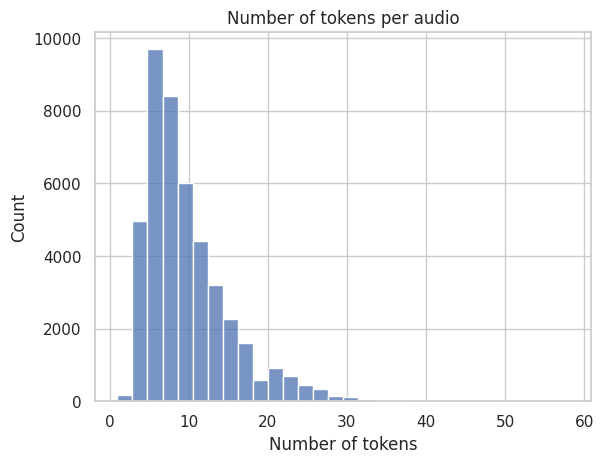

In [14]:

hist_plot(token_stats, 'nr_token', 'Number of tokens per audio', 'Number of tokens', os.path.join(PREPARED_PATH, 'hist_tokens.png'))

In [15]:
# print text with less than/equal to 2 tokens
short_texts = token_stats[token_stats['nr_token'] <= 2].text.to_list()
for t in short_texts:
    print(f'Text: {t}')

Text: Kiana:
Text: Zelia:
Text: Felsspält.
Text: Bide Ratte
Text: Ide Chuchi
Text: Prost!
Text: Familiefotene.
Text: srf.ch/1gegen100
Text: En Töggelichaschte
Text: 
Text: ?
Text: En Elektrocheminée
Text: Kristine:
Text: E Grauhorigi
Text: 
Text: «Die Vollzeitmütter»
Text: Schablonegraffitis.
Text: Spöter.
Text: 15 ...
Text: Punkte-Tabälle:
Text: Zum Jean-Pierre
Text: Undertitel:
Text: 
Text: Dusse.
Text: Dinne.
Text: Dinne:
Text: Dinne.
Text: Dinne.
Text: Kristine:
Text: E Blondi
Text: Verusse.
Text: Caroline:
Text: 
Text: 
Text: E Türe
Text: Schrift:
Text: Mitme Wiietickette
Text: Vorusse.
Text: Vorusse.
Text: Es Symbol
Text: Untertitel:
Text: Jackie:
Text: 30 ...
Text: 
Text: UTs??
Text: 10 ...
Text: Thusa:
Text: kommt weg
Text: Kristine:
Text: 15 ...
Text: 
Text: Dusse.
Text: Spöter.
Text: Untertitel:
Text: ame Flughafe
Text: Verusse.
Text: E Grafik
Text: Schrift:
Text: Dusse.
Text: E Langhaarigi
Text: Himbeere.
Text: De Churzhaarig
Text: 10 ...
Text: Es Video
Text: Pfanny:
Text: S

Many seemingly white spaces only subtitles. Checke a couple manually and really seem to be empty:
* 287_169: AuD_2021_F02

> 169
> 00:38:21,400 --> 00:38:22,880

* 126_52: 1G100_290
> 52
> 00:14:30,680 --> 00:14:32,720


* 035_81: 1G100_305
> 81
> 00:42:20,240 --> 00:42:22,360



In [13]:
# empty texts, print id
token_stats[token_stats['nr_token'] <= 1]

,id,text,nr_token,nr_sentences,avg_tokens_per_sentence
683,280_32,,1,1,1.0
1924,002_94,,1,1,1.0
2045,124_161,$Verusse,1,1,1.0
4919,062_238,,1,1,1.0
5918,175_144,grinst,1,1,1.0
6839,010_6,,1,1,1.0
7693,268_48,,1,1,1.0
8325,097_27,,1,1,1.0
9783,287_169,,1,1,1.0
14535,098_36,,1,1,1.0


Map (num_proc=4):   2%|██▉                                                                                                                     | 87/3610 [00:08<05:27, 10.77 examples/s]Faulty audio: /home/vera/Documents/Uni/Master/Master_Thesis/ma-code/data_prepared/srf_ad/241_108_1G100_361.wav
Map (num_proc=4):   3%|███▎                                                                                                                    | 98/3610 [00:09<04:31, 12.93 examples/s]Faulty audio: /home/vera/Documents/Uni/Master/Master_Thesis/ma-code/data_prepared/srf_ad/241_81_1G100_361.wav
Map (num_proc=4):   3%|███▎                                                                                                                   | 102/3610 [00:09<03:43, 15.66 examples/s]Faulty audio: /home/vera/Documents/Uni/Master/Master_Thesis/ma-code/data_prepared/srf_ad/241_104_1G100_361.wav
Map (num_proc=4):   9%|██████████▋                                                                                                            | 323/3610 [00:29<05:30,  9.94 examples/s]Faulty audio: /home/vera/Documents/Uni/Master/Master_Thesis/ma-code/data_prepared/srf_ad/241_105_1G100_361.wav
Map (num_proc=4):  10%|████████████▍                                                                                                          | 378/3610 [00:34<04:50, 11.12 examples/s]Faulty audio: /home/vera/Documents/Uni/Master/Master_Thesis/ma-code/data_prepared/srf_ad/033_92_1G100_403.wav
Map (num_proc=4):  22%|█████████████████████████▋                                                                                             | 779/3610 [01:07<04:12, 11.22 examples/s]Faulty audio: /home/vera/Documents/Uni/Master/Master_Thesis/ma-code/data_prepared/srf_ad/060_62_1G100_289.wav
Map (num_proc=4):  27%|████████████████████████████████▏                                                                                      | 976/3610 [01:24<03:42, 11.86 examples/s]Faulty audio: /home/vera/Documents/Uni/Master/Master_Thesis/ma-code/data_prepared/srf_ad/241_77_1G100_361.wav
Map (num_proc=4):  46%|██████████████████████████████████████████████████████▋                                                               | 1673/3610 [02:37<03:59,  8.09 examples/s]Faulty audio: /home/vera/Documents/Uni/Master/Master_Thesis/ma-code/data_prepared/srf_ad/241_87_1G100_361.wav
Map (num_proc=4):  47%|███████████████████████████████████████████████████████▎                                                              | 1692/3610 [02:39<04:23,  7.27 examples/s]Faulty audio: /home/vera/Documents/Uni/Master/Master_Thesis/ma-code/data_prepared/srf_ad/033_104_1G100_403.wav
Map (num_proc=4):  47%|███████████████████████████████████████████████████████▋                                                              | 1703/3610 [02:40<03:30,  9.05 examples/s]Faulty audio: /home/vera/Documents/Uni/Master/Master_Thesis/ma-code/data_prepared/srf_ad/241_93_1G100_361.wav
Map (num_proc=4):  51%|████████████████████████████████████████████████████████████▌                                                         | 1852/3610 [02:55<02:38, 11.11 examples/s]Faulty audio: /home/vera/Documents/Uni/Master/Master_Thesis/ma-code/data_prepared/srf_ad/033_101_1G100_403.wav
Map (num_proc=4):  60%|███████████████████████████████████████████████████████████████████████▏                                              | 2179/3610 [03:26<02:21, 10.11 examples/s]Faulty audio: /home/vera/Documents/Uni/Master/Master_Thesis/ma-code/data_prepared/srf_ad/033_125_1G100_403.wav
Map (num_proc=4):  63%|██████████████████████████████████████████████████████████████████████████▌                                           | 2280/3610 [03:34<01:49, 12.17 examples/s]Faulty audio: /home/vera/Documents/Uni/Master/Master_Thesis/ma-code/data_prepared/srf_ad/241_75_1G100_361.wav
Map (num_proc=4):  73%|█████████████████████████████████████████████████████████████████████████████████████▊                                | 2625/3610 [04:05<01:32, 10.66 examples/s]Faulty audio: /home/vera/Documents/Uni/Master/Master_Thesis/ma-code/data_prepared/srf_ad/033_111_1G100_403.wav
Map (num_proc=4):  84%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 3034/3610 [04:41<00:46, 12.35 examples/s]Faulty audio: /home/vera/Documents/Uni/Master/Master_Thesis/ma-code/data_prepared/srf_ad/132_163_Blaulichtgeschichten_01.wav
Map (num_proc=4):  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 3299/3610 [05:07<00:30, 10.24 examples/s]Faulty audio: /home/vera/Documents/Uni/Master/Master_Thesis/ma-code/data_prepared/srf_ad/033_109_1G100_403.wav
Map (num_proc=4):  97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 3499/3610 [05:28<00:13,  8.12 examples/s]Faulty audio: /home/vera/Documents/Uni/Master/Master_Thesis/ma-code/data_prepared/srf_ad/132_169_Blaulichtgeschichten_01.wav
Map (num_proc=4): 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3610/3610 [05:37<00:00, 10.69 examples/s]


En Globus rotiert und kunnt nöcher. D Karte vo Spanie. Im Oste vo Mallorca markiert en wiisse Punkt Cala Radschada. (Cala Rajada) --> En Globus rotiert und kunnt nöcher. D Karte vo Spanie. Im Oste vo Mallorca markiert en wiisse Punkt Cala Radschada. Cala Rajada


(ÜBER DIALOG UNDEUTL.) Die vier schüttled enand d Händ. --> ÜBER DIALOG UNDEUTL. Die vier schüttled enand d Händ.


D Caroline und de Rolli sitzed ... ("hanis Gfühl") ... unterme Pavillon. --> D Caroline und de Rolli sitzed ... "hanis Gfühl" ... unterme Pavillon.

$$ D Mona ... ("Ou, merci.") ... bringt em z Trinke. --> D Mona ... "Ou, merci." ... bringt em z Trinke.

